# 1. 크롤링 단계

## 1.1 경주성적표 크롤링

In [137]:
from selenium import webdriver
import pandas as pd
import time
from bs4 import BeautifulSoup
import numpy as np
from html_table_parser import parser_functions as parser

In [138]:
year = 2021 #크롤링 하려는 연도

#드라이버 실행 및 기간 선택
driver = webdriver.Chrome('./chromedriver')
driver.get('https://race.kra.co.kr/raceScore/scoretablePeriodSearch.do')

//*[@id="arg_Year1"]
driver.find_element_by_xpath('//*[@id="arg_Year1"]/option[text()="'+str(year)+'"]').click()
driver.find_element_by_xpath('//*[@id="contents"]/form/fieldset/table/tbody/tr[1]/td/select[2]/option[text()="01"]').click()
driver.find_element_by_xpath('//*[@id="contents"]/form/fieldset/table/tbody/tr[1]/td/select[3]/option[text()="01"]').click()
driver.find_element_by_xpath('//*[@id="arg_Year2"]/option[text()="'+str(year)+'"]').click()
driver.find_element_by_xpath('//*[@id="contents"]/form/fieldset/table/tbody/tr[2]/td/select[2]/option[text()="12"]').click()
driver.find_element_by_xpath('//*[@id="arg_Day2"]/option[text()="31"]').click()

driver.find_element_by_xpath('//*[@id="contents"]/p[2]/button').click()

#크롤링 데이터를 저장할 빈 데이터프레임 생성
total_df = pd.DataFrame()

#개별 링크로 이동하여 동적으로 크롤링 진행
while True:
    try:
        tds = driver.find_elements_by_xpath('//*[@id="contents"]/div[2]/table/tbody/tr/td[3]')
        for tdi in range(len(tds)):
            as_len = len(driver.find_elements_by_xpath('//*[@id="contents"]/div[2]/table/tbody/tr['+str(tdi+1)+']/td[3]/p/a'))
            for ai in range(as_len):
                driver.find_elements_by_xpath('//*[@id="contents"]/div[2]/table/tbody/tr['+str(tdi+1)+']/td[3]/p/a')[ai].click()

                date = driver.find_element_by_xpath('//*[@id="contents"]/div[3]/table/tbody/tr[1]/td[1]').text
                distance = driver.find_element_by_xpath('//*[@id="contents"]/div[3]/table/tbody/tr[2]/td[2]').text
                weather = driver.find_element_by_xpath('//*[@id="contents"]/div[3]/table/tbody/tr[1]/td[3]').text
                track = driver.find_element_by_xpath('//*[@id="contents"]/div[3]/table/tbody/tr[1]/td[5]').text
                
                page = driver.page_source
                soup = BeautifulSoup(page, 'html.parser')
                temp = soup.find_all('table')
                p = parser.make2d(temp[2])
                for i in range(len(p)):
                    if i == 0: 
                        p[i].append('date')
                        p[i].append('distance')
                        p[i].append('weather')
                        p[i].append('track')
                    else : 
                        p[i].append(date)
                        p[i].append(distance)
                        p[i].append(weather)
                        p[i].append(track)                        
                        
                df = pd.DataFrame(p[1:], columns=p[0])
                total_df = pd.concat([total_df,df])  

                driver.execute_script('window.history.go(-1)') # 뒤로가기
        driver.find_element_by_xpath('//*[@id="contents"]/p[2]/button[2]').click()
    except:
        print('end...')
        break
        
total_df        

end...


순위  마번      마명 산지 성별  연령  중량 레이팅  기수명 조교사명       마주명   도착차      마체중  \
0    1   8   라스트펀치  한  암  2세  53      박태종  곽영효      ♠강승연         442(4)   
1    2   3  케이엔올드퀸  한  암  2세  53       먼로  박대흥      ♠조경수     ½  506(-4)   
2    3   9    퀸의질주  한  암  2세  53      장추열  김동균      ♠김창희    1¼  474(-9)   
3    4   1   매직모카신  한  암  2세  53      김효정  구자흥       고창범     4  447(-2)   
4    5   4      돌배  한  암  2세  53      김용근  최상식      ♠임한용    1½  474(10)   
..  ..  ..     ... .. ..  ..  ..  ..  ...  ...       ...   ...      ...   
7    8   8    예상백승  한  암  7세  54  59  박상우  유재길      ♠이장운    1¾  497(-8)   
8    9  11  원더풀마리아  한  암  5세  53  56  정정희  임봉춘  ♠(주)녹원목장     4  468(-1)   
9   10  12  에이스솔롱고  한  암  5세  52  51  하정훈   토니      ♠김광두     9   452(0)   
10  11   2   럭셔리캡틴  한  수  4세  54  53  장추열  손영표      ♠박정재     7  526(-3)   
11       4    사이먼퀸  한  암  5세  54  59  박태종  우창구      ♠임영수  출전제외  450(-3)   

       단승    연승          장구현황                       date distance weather  \
0     9.1   2.1           망사눈  2021년 12월 26일 (일) 제1경주 서울    1000M      맑음   
1     6.3   2.2     계란형큰+,망사+  2021년 12월 26일 (일) 제1경주 서울    1000M      맑음   
2    14.2   2.9                2021년 12월 26일 (일) 제1경주 서울    1000M      맑음   
3    14.7   3.8                2021년 12월 26일 (일) 제1경주 서울    1000M      맑음   
4     7.6   1.9            망사  2021년 12월 26일 (일) 제1경주 서울    1000M      맑음   
..    ...   ...           ...                        ...      ...     ...   
7   120.5  11.9                2021년 12월 11일 (토) 제9경주 서울    1800M      흐림   
8   111.5   7.5            망사  2021년 12월 11일 (토) 제9경주 서울    1800M      흐림   
9    96.5  19.9      계란형큰,눈가면  2021년 12월 11일 (토) 제9경주 서울    1800M      흐림   
10   10.6   3.4           눈가면  2021년 12월 11일 (토) 제9경주 서울    1800M      흐림   
11   ----  ----  Triabit ,망사눈  2021년 12월 11일 (토) 제9경주 서울    1800M      흐림   

   track  
0     8%  
1     8%  
2     8%  
3     8%  
4     8%  
..   ...  
7    13%  
8    13%  
9    13%  
10   13%  
11   13%  

[738 rows x 20 columns]

In [134]:
#csv파일로 저장
title = 'race_record_'+str(year)+'.csv'
total_df.to_csv(title, mode='w', encoding='euc-kr')

## 1.2 경주마정보 크롤링

In [4]:
driver = webdriver.Chrome('./chromedriver')
driver.get('https://race.kra.co.kr/dbdata/textData.do?Act=12&Sub=1&meet=1')
driver.find_element("xpath", '//*[@id="contents"]/ul/li[3]/ul/li[1]/a').click()
driver.find_element("xpath", '//*[@id="fileSearchName"]').send_keys(str(year))
driver.find_element("xpath", '//*[@id="contents"]/div[2]/fieldset/button').click()


In [5]:
as_len = len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a'))
as_len

14

In [6]:
# 크롤링 값을 받을 리스트 초기화
records=[]
dates= []

driver = webdriver.Chrome('./chromedriver')
driver.get('https://race.kra.co.kr/dbdata/textData.do?Act=12&Sub=1&meet=1')
driver.find_element("xpath", '//*[@id="contents"]/ul/li[3]/ul/li[1]/a').click()
driver.find_element("xpath", '//*[@id="fileSearchName"]').send_keys(str(year))
driver.find_element("xpath", '//*[@id="contents"]/div[2]/fieldset/button').click()

#for문 돌리기 위해 a의 개수 반환
as_len = len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a'))

if as_len == 14 : 
    start_i = 2
    end_i = as_len-1
else: 
    start_i = 0
    end_i = as_len
    
# 페이지 목록 자동 넘김
for j in range(start_i, end_i):
    as_ = driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a')
    as_[j].click()
    # for문 돌리기 위해 tds의 길이 반환
    tds_len= len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td'))
    # 한 페이지 크롤링
    for i in range(tds_len):
        # td태그인 elements를 리스트 형식으로 tds에 저장
        tds = driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td')
        # td태그 중 2021로 시작하는 항목 클릭
        if tds[i].text[0:4]==str(year):
            dates.append(tds[i].text)
            tds[i].click()
            # frame 내의 element에 접근
            driver.switch_to.frame('showTextFile')
            elem = driver.find_element("xpath", '/html/body/pre').text
            driver.switch_to.default_content()
            records.append(elem)  # records배열에 추가
            driver.execute_script('window.history.go(-1)') # 뒤로가기
        else :
            continue # td가 2021로 시작하지 않으면 넘어감

# 데이터 확인
print(len(records))
records[0]

    


104


"-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n마명              산지   성별 생년월일   나이 등급 조 조교사   마주                 부마명               모마명                 총출전 1위  2위   3위  1년출전 1위   2위   3위  수득상금   레이팅  최근거래가 \n-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n가기만고당        한      수  2019/05/04  2   국미 48 이준철   이종욱               아치아치아치         사라토가스플래쉬         0     0     0     0     0     0     0     0           0                 0\n가나파크          한      암  2017/03/05  4   국4  26 안해양   김한수               디바인파크           능인장                   8     2     1     1     3     0     0     0    59300000    37           0\n가나패션          한      암  2019/04/19  2   국미 26 안해양   김한수            

In [7]:
#날짜 데이터 리스트 생성 후 yyyymmdd 형식으로 저장
for i in range(len(dates)):
    dates[i] = dates[i][:8]


#불필요한 라인 제거
sorted_records = []
for record in records:
    sorted_record = []
    for line in record.split('\n'):
        if line !='-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------' and '마명              산지' not in line :
            sorted_record.append(line)
    sorted_records.append(sorted_record)

len(sorted_records)
    

104

In [8]:
#date값 붙이기
for record_num in range(len(sorted_records)):
    for line_num in range(len(sorted_records[record_num])):
        sorted_records[record_num][line_num] = sorted_records[record_num][line_num] + ' ' + dates[record_num]    
    
    
#2차원에서 1차원으로 축소
sorted_records = np.concatenate(sorted_records).tolist()
    
#값 확인
sorted_records

['가기만고당        한      수  2019/05/04  2   국미 48 이준철   이종욱               아치아치아치         사라토가스플래쉬         0     0     0     0     0     0     0     0           0                 0 20211230',
 '가나파크          한      암  2017/03/05  4   국4  26 안해양   김한수               디바인파크           능인장                   8     2     1     1     3     0     0     0    59300000    37           0 20211230',
 '가나패션          한      암  2019/04/19  2   국미 26 안해양   김한수               올드패션드           찬란한여명               0     0     0     0     0     0     0     0           0                 0 20211230',
 '가로수길          한      수  2016/04/06  5   국3  34 리카디   홍종철               채플로열             협동                     8     4     2     0     2     1     1     0   127880000    62           0 20211230',
 '가온매직          미      수  2017/05/03  4   외4  09 강성오   김기종               NOBLE MISSION        MULLIGATAWNY             4     0     0     0     1     0     0     0           0    36           0 20211230',
 '갈색향기          한    

In [9]:
len(sorted_records)

175713

In [10]:
#csv파일에 넣기 적합한 형태로 만들기 위해 데이터를 스플릿한다 
total_records=[]
for line in sorted_records:
    new_line = line.split(' ')             #속성값 스플릿 
    new_line = [v for v in new_line if v]  #공백제거
    total_records.append(new_line)

total_records

[['가기만고당',
  '한',
  '수',
  '2019/05/04',
  '2',
  '국미',
  '48',
  '이준철',
  '이종욱',
  '아치아치아치',
  '사라토가스플래쉬',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '20211230'],
 ['가나파크',
  '한',
  '암',
  '2017/03/05',
  '4',
  '국4',
  '26',
  '안해양',
  '김한수',
  '디바인파크',
  '능인장',
  '8',
  '2',
  '1',
  '1',
  '3',
  '0',
  '0',
  '0',
  '59300000',
  '37',
  '0',
  '20211230'],
 ['가나패션',
  '한',
  '암',
  '2019/04/19',
  '2',
  '국미',
  '26',
  '안해양',
  '김한수',
  '올드패션드',
  '찬란한여명',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '20211230'],
 ['가로수길',
  '한',
  '수',
  '2016/04/06',
  '5',
  '국3',
  '34',
  '리카디',
  '홍종철',
  '채플로열',
  '협동',
  '8',
  '4',
  '2',
  '0',
  '2',
  '1',
  '1',
  '0',
  '127880000',
  '62',
  '0',
  '20211230'],
 ['가온매직',
  '미',
  '수',
  '2017/05/03',
  '4',
  '외4',
  '09',
  '강성오',
  '김기종',
  'NOBLE',
  'MISSION',
  'MULLIGATAWNY',
  '4',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '36',
  '0',
  '20211230'],
 [

In [12]:
len(total_records[1])

23

In [13]:
len(total_records[40])

24

In [14]:
#레이팅 값이 없는 경우는 리스트 길이가 달라지기 때문에 없는 경우 'none'으로 추가

sorted_total_records=[]
for i in total_records:
    if 0<int(i[-3])<150: #레이팅 값 존재하는 경우
        rating = i[-3]
        temp_list = i[:8]+ i[-12:-3] + [rating] + [i[-1]]

    else: #레이팅 값 없는 경우
        rating='none'
        temp_list = i[:8]+ i[-11:-2] + [rating] + [i[-1]]

    sorted_total_records.append(temp_list)
sorted_total_records

[['가기만고당',
  '한',
  '수',
  '2019/05/04',
  '2',
  '국미',
  '48',
  '이준철',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  'none',
  '20211230'],
 ['가나파크',
  '한',
  '암',
  '2017/03/05',
  '4',
  '국4',
  '26',
  '안해양',
  '8',
  '2',
  '1',
  '1',
  '3',
  '0',
  '0',
  '0',
  '59300000',
  '37',
  '20211230'],
 ['가나패션',
  '한',
  '암',
  '2019/04/19',
  '2',
  '국미',
  '26',
  '안해양',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  'none',
  '20211230'],
 ['가로수길',
  '한',
  '수',
  '2016/04/06',
  '5',
  '국3',
  '34',
  '리카디',
  '8',
  '4',
  '2',
  '0',
  '2',
  '1',
  '1',
  '0',
  '127880000',
  '62',
  '20211230'],
 ['가온매직',
  '미',
  '수',
  '2017/05/03',
  '4',
  '외4',
  '09',
  '강성오',
  '4',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '36',
  '20211230'],
 ['갈색향기',
  '한',
  '암',
  '2019/02/28',
  '2',
  '국6',
  '99',
  '휴양마',
  '4',
  '0',
  '0',
  '1',
  '4',
  '0',
  '0',
  '1',
  '11900000',
  'none',
  '20211230'],
 ['감곡선샤인',
  '한',
  '암'

In [15]:
len(sorted_total_records[1])

19

In [16]:
#csv파일로 저장
name = ['마명', '산지', '성별', '생년월일', '나이', '등급', '조', '조교사', '총출전_마', '총출전1위_마', '총출전2위_마', '총출전3위_마', '1년출전_마', '1년출전1위_마', '1년출전2위_마', '1년출전3위_마', '수득상금', '레이팅', 'date']
horses_profile = pd.DataFrame(columns=name,data=sorted_total_records)

title = 'horses_profile_' + str(year) + '.csv'
horses_profile.to_csv(title, mode='w', encoding='euc-kr')

## 1.3 기수정보 크롤링

#### 동적크롤링

In [17]:
#기수의 경우 정보가 서울경마와 부산경마로 나눠져 있어 두 페이지를 모두 크롤링함
meet = '1'  # 1 = 서울경마, 3 = 부산경마
# 크롤링 값을 받을 리스트 초기화
records=[]
dates= []

driver = webdriver.Chrome('./chromedriver')
driver.get('https://race.kra.co.kr/dbdata/textData.do?Act=12&Sub=1&meet='+meet)
driver.find_element("xpath", '//*[@id="contents"]/ul/li[3]/ul/li[2]/a').click()
driver.find_element("xpath", '//*[@id="fileSearchName"]').send_keys(str(year))
driver.find_element("xpath", '//*[@id="contents"]/div[2]/fieldset/button').click()


#for문 돌리기 위해 a의 개수 반환
as_len = len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a'))


if as_len == 14 : 
    start_i = 2
    end_i = as_len-1
else: 
    start_i = 0
    end_i = as_len
    
# 페이지 목록 자동 넘김
for j in range(start_i, end_i):
    as_ = driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a')
    as_[j].click()
    # for문 돌리기 위해 tds의 길이 반환
    tds_len= len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td'))
    # 한 페이지 크롤링
    for i in range(tds_len):
        # td태그인 elements를 리스트 형식으로 tds에 저장
        tds = driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td')
        # td태그 중 2021로 시작하는 항목 클릭
        if tds[i].text[0:4]==str(year):
            dates.append(tds[i].text)
            tds[i].click()
            # frame 내의 element에 접근
            driver.switch_to.frame('showTextFile')
            elem = driver.find_element("xpath", '/html/body/pre').text
            driver.switch_to.default_content()
            records.append(elem)  # records배열에 추가
            driver.execute_script('window.history.go(-1)') # 뒤로가기
        else :
            continue # td가 2021로 시작하지 않으면 넘어감
# 데이터 저장 후 길이(개수) 확인
records_2021 = records
print(len(records_2021))

104


#### 불필요한 부분을 삭제하고 date를 추가하여 리스트 생성

In [18]:
#date 리스트 생성
for i in range(len(dates)):
    dates[i] = dates[i][:8]

#불필요한 라인 삭제
records
sorted_records = []
for record in records:
    sorted_record = []
    for line in record.split('\n'):
        if line !='-------------------------------------------------------------------------------------------------' and '기수명   조' not in line:
            
            sorted_record.append(line)
    sorted_records.append(sorted_record)

#date 속성값 추가
sorted_total_records = []
for record_num in range(len(sorted_records)):
    for line_num in range(len(sorted_records[record_num])):
            sorted_total_records.append(sorted_records[record_num][line_num] + ' ' + dates[record_num])

#값 확인
sorted_total_records

['권석원   프  1991/10/30  30  2013/06/01  52   52        678   38   38   50   15     0    0    1 20211230',
 '김귀배   프  1962/12/18  59  1979/04/11  52   52       4496  323  324  382   88     1    4    7 20211230',
 '김덕현   99  1992/11/02  29  2017/06/02  52   52        400   52   41   33   24     2    2    2 20211230',
 '김동수   프  1986/12/23  35  2014/06/05  49   49       2889  260  283  298  297    18   24   19 20211230',
 '김아현   프  1998/03/13  23  2020/07/17  50   50        333   10   23   24  247     7   18   16 20211230',
 '김옥성   프  1967/04/05  54  1987/04/01  52   52       8353  541  644  744  188     4    9   13 20211230',
 '김용근   프  1982/02/12  39  2005/05/04  51   51       5052  793  662  572  336    41   39   38 20211230',
 '김정준   프  1989/07/04  32  2010/06/09  52   52       2724  165  211  215  319    25   27   28 20211230',
 '김태희   프  2000/11/21  21  2021/07/14  49   49         71    1    6    4   71     1    6    4 20211230',
 '김효정   프  1996/01/01  25  2017/06/02  50   50       1

#### 스플릿 후 csv파일 생성

In [19]:
#csv파일에 넣기 적합한 형태로 만들기 위해 데이터를 스플릿한다 
total_records=[]
for line in sorted_total_records:
    new_line = line.split(' ')             #속성값 스플릿 
    new_line = [v for v in new_line if v]  #공백제거
    total_records.append(new_line)

#csv파일로 저장
name = ['기수명', '조', '생년월일', '나이', '데뷔일자', '중량', '타조중량', '총출전_기', '총출전1위_기', '총출전2위_기', '총출전3위_기', '1년출전_기', '1년출전1위_기', '1년출전2위_기', '1년출전3위_기', 'date']
riders_profile = pd.DataFrame(columns=name,data=total_records)

if meet == '1' : 
    title = 'rider_profile_seoul_'+str(year)+'.csv'
elif meet == '3' : 
    title = 'rider_profile_busan_'+str(year)+'.csv'

riders_profile.to_csv(title, mode='w', encoding='euc-kr')



In [20]:
#기수의 경우 정보가 서울경마와 부산경마로 나눠져 있어 두 페이지를 모두 크롤링함
meet = '3'  # 1 = 서울경마, 3 = 부산경마
# 크롤링 값을 받을 리스트 초기화
records=[]
dates= []

driver = webdriver.Chrome('./chromedriver')
driver.get('https://race.kra.co.kr/dbdata/textData.do?Act=12&Sub=1&meet='+meet)
driver.find_element("xpath", '//*[@id="contents"]/ul/li[3]/ul/li[2]/a').click()
driver.find_element("xpath", '//*[@id="fileSearchName"]').send_keys(str(year))
driver.find_element("xpath", '//*[@id="contents"]/div[2]/fieldset/button').click()


#for문 돌리기 위해 a의 개수 반환
as_len = len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a'))

if as_len == 14 : 
    start_i = 2
    end_i = as_len-1
else: 
    start_i = 0
    end_i = as_len

# 페이지 목록 자동 넘김
for j in range(start_i, end_i):
    as_ = driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a')
    as_[j].click()
    # for문 돌리기 위해 tds의 길이 반환
    tds_len= len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td'))
    # 한 페이지 크롤링
    for i in range(tds_len):
        # td태그인 elements를 리스트 형식으로 tds에 저장
        tds = driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td')
        # td태그 중 2021로 시작하는 항목 클릭
        if tds[i].text[0:4]==str(year):
            dates.append(tds[i].text)
            tds[i].click()
            # frame 내의 element에 접근
            driver.switch_to.frame('showTextFile')
            elem = driver.find_element("xpath", '/html/body/pre').text
            driver.switch_to.default_content()
            records.append(elem)  # records배열에 추가
            driver.execute_script('window.history.go(-1)') # 뒤로가기
        else :
            continue # td가 2021로 시작하지 않으면 넘어감
# 데이터 저장 후 길이(개수) 확인
records_2021 = records
print(len(records_2021))
#date 리스트 생성
for i in range(len(dates)):
    dates[i] = dates[i][:8]

#불필요한 라인 삭제
records
sorted_records = []
for record in records:
    sorted_record = []
    for line in record.split('\n'):
        if line !='-------------------------------------------------------------------------------------------------' and '기수명   조' not in line:
            
            sorted_record.append(line)
    sorted_records.append(sorted_record)

#date 속성값 추가
sorted_total_records = []
for record_num in range(len(sorted_records)):
    for line_num in range(len(sorted_records[record_num])):
            sorted_total_records.append(sorted_records[record_num][line_num] + ' ' + dates[record_num])

#값 확인
sorted_total_records
#csv파일에 넣기 적합한 형태로 만들기 위해 데이터를 스플릿한다 
total_records=[]
for line in sorted_total_records:
    new_line = line.split(' ')             #속성값 스플릿 
    new_line = [v for v in new_line if v]  #공백제거
    total_records.append(new_line)

#csv파일로 저장
name = ['기수명', '조', '생년월일', '나이', '데뷔일자', '중량', '타조중량', '총출전_기', '총출전1위_기', '총출전2위_기', '총출전3위_기', '1년출전_기', '1년출전1위_기', '1년출전2위_기', '1년출전3위_기', 'date']
riders_profile = pd.DataFrame(columns=name,data=total_records)

if meet == '1' : 
    title = 'rider_profile_seoul_'+str(year)+'.csv'
elif meet == '3' : 
    title = 'rider_profile_busan_'+str(year)+'.csv'

riders_profile.to_csv(title, mode='w', encoding='euc-kr')

105


## 1.4 조교사정보 크롤링

#### 동적크롤링

In [21]:
# 크롤링 값을 받을 리스트 초기화
records=[]
dates= []

driver = webdriver.Chrome('./chromedriver')
driver.get('https://race.kra.co.kr/dbdata/textData.do?Act=12&Sub=1&meet=1')
driver.find_element("xpath", '//*[@id="contents"]/ul/li[3]/ul/li[3]/a').click()
driver.find_element("xpath", '//*[@id="fileSearchName"]').send_keys(str(year))
driver.find_element("xpath", '//*[@id="contents"]/div[2]/fieldset/button').click()

#for문 돌리기 위해 a의 개수 반환
as_len = len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a'))

if as_len == 14 : 
    start_i = 2
    end_i = as_len-1
else: 
    start_i = 0
    end_i = as_len
    
# 페이지 목록 자동 넘김
for j in range(start_i, end_i):
    as_ = driver.find_elements("xpath", '//*[@id="inputVo"]/div[2]/a')
    as_[j].click()
    # for문 돌리기 위해 tds의 길이 반환
    tds_len= len(driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td'))
    # 한 페이지 크롤링
    for i in range(tds_len):
        # td태그인 elements를 리스트 형식으로 tds에 저장
        tds = driver.find_elements("xpath", '//*[@id="inputVo"]/div[1]/table/tbody/tr/td')
        # td태그 중 2021로 시작하는 항목 클릭
        if tds[i].text[0:4]==str(year):
            dates.append(tds[i].text)
            tds[i].click()
            # frame 내의 element에 접근
            driver.switch_to.frame('showTextFile')
            elem = driver.find_element("xpath", '/html/body/pre').text
            driver.switch_to.default_content()
            records.append(elem)  # records배열에 추가
            driver.execute_script('window.history.go(-1)') # 뒤로가기
        else :
            continue # td가 2021로 시작하지 않으면 넘어감
# 데이터 저장 후 길이(개수) 확인
records_2021 = records
print(len(records_2021))

104


#### 불필요한 부분을 삭제하고 date 속성값을 추가하여 리스트 생성

In [22]:
#date 리스트 생성
for i in range(len(dates)):
    dates[i] = dates[i][:8]

#불필요한 라인 삭제
records
sorted_records = []
for record in records:
    sorted_record = []
    for line in record.split('\n'):
        if line !='-------------------------------------------------------------------------------------'and '조교사명 조' not in line :
            
            sorted_record.append(line)
    sorted_records.append(sorted_record)
    
#date 속성값 추가

sorted_total_records = []
for record_num in range(len(sorted_records)):
    for line_num in range(len(sorted_records[record_num])):
            sorted_total_records.append(sorted_records[record_num][line_num] + ' ' + dates[record_num])

#값 확인
sorted_total_records

['강성오   09  1966/08/20  55  2018/07/01    495    57   55   43   211   21   26   20 20211230',
 '강환민   31  1970/05/26  51  2017/07/01    810   108   98   86   211   23   26   19 20211230',
 '곽영효   19  1961/09/24  60  1997/05/28   4633   479  450  403   144    9   14   10 20211230',
 '구자흥   07  1963/08/07  58  2010/04/05   1945   151  199  195   138   11    6    4 20211230',
 '김동균   52  1975/08/24  46  2012/07/01   2605   267  223  240   310   42   29   35 20211230',
 '김동철   53  1974/11/28  47  2016/03/16   1355    79  117  116   237   17   14   14 20211230',
 '김윤섭   32  1968/09/20  53  1998/07/02   4958   319  406  422   139    5    7   10 20211230',
 '김점오   17  1959/05/20  62  1987/07/10   8662   790  796  751   108   10    5   11 20211230',
 '리카디   34  1968/03/02  53  2017/11/26    532    58   70   62   179   17   23   22 20211230',
 '박대흥   18  1958/08/07  63  1997/05/28   6979   998  798  667   304   38   28   18 20211230',
 '박병일   27  1964/04/26  57  2011/07/15   1830   160  178  16

In [23]:
#csv파일에 넣기 적합한 형태로 만들기 위해 데이터를 스플릿한다 
total_records=[]
for line in sorted_total_records:
    new_line = line.split(' ')             #속성값 스플릿 
    new_line = [v for v in new_line if v]  #공백제거
    total_records.append(new_line)


In [24]:
for i in range(len((total_records))):
    if len(total_records[i]) == 15:
        total_records[i][0] = total_records[i][0]+total_records[i][1]
        for j in range(1,len(total_records[i])-1):
               total_records[i][j] = total_records[i][j+1]
        del total_records[i][-1]
        print(total_records[i])

In [25]:


#csv파일로 저장

name = ['조교사명', '조', '생년월일', '나이', '데뷔일자', '총출전_조', '총출전1위_조', '총출전2위_조', '총출전3위_조', '1년출전_조', '1년출전1위_조', '1년출전2위_조', '1년출전3위_조', 'date']
trainers_profile = pd.DataFrame(columns=name,data=total_records)

title = 'trainers_profile_'+str(year)+'.csv'

trainers_profile.to_csv(title, mode='w', encoding='euc-kr')

# 2. 데이터 병합

### 2.1 경기 데이터 불러오기

In [26]:
import pandas as pd
import numpy as np
file_name = 'race_record_'+str(year)+'.csv'
race_record = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/'+file_name, encoding='CP949')

        
race_record

Unnamed: 0    순위  마번      마명 산지 성별  연령    중량   레이팅      기수명  ...   마주명  \
0               0   1.0   8   라스트펀치  한  암  2세    53   NaN      박태종  ...  ♠강승연   
1               1   2.0   3  케이엔올드퀸  한  암  2세    53   NaN       먼로  ...  ♠조경수   
2               2   3.0   9    퀸의질주  한  암  2세    53   NaN      장추열  ...  ♠김창희   
3               3   4.0   1   매직모카신  한  암  2세    53   NaN      김효정  ...   고창범   
4               4   5.0   4      돌배  한  암  2세    53   NaN      김용근  ...  ♠임한용   
...           ...   ...  ..     ... .. ..  ..   ...   ...      ...  ...   ...   
10477           7   8.0   2     빅이어  한  암  6세   *52  68.0      송재철  ...  ♠최몽주   
10478           8   9.0   3  레드블레이드  한  거  5세    54  78.0  (-3)임다빈  ...  ♠김형란   
10479           9  10.0   5   베스트에버  한  수  6세   *52  66.0      박태종  ...  ♠김정철   
10480          10  11.0   7    환상스타  미  수  5세  53.5  71.0      이철경  ...   최영훈   
10481          11  12.0   8    금석돌파  미  거  5세    51  51.0      지하주  ...  ♠유희태   

       도착차       마체중      단승      연승          장구현황  \
0      NaN    442(4)     9.1     2.1           망사눈   
1        ½   506(-4)     6.3     2.2     계란형큰+,망사+   
2       1¼   474(-9)    14.2     2.9           NaN   
3        4   447(-2)    14.7     3.8           NaN   
4       1½   474(10)     7.6     1.9            망사   
...    ...       ...     ...     ...           ...   
10477    1   536(-2)  9999.9  9999.9           NaN   
10478    1    507(1)  9999.9  9999.9  망사눈,Triabit+   
10479    목  479(-15)  9999.9  9999.9           망사눈   
10480    3   470(-4)  9999.9  9999.9           NaN   
10481   13    513(6)  9999.9  9999.9           NaN   

                             date distance weather track  
0       2021년 12월 26일 (일) 제1경주 서울    1000M      맑음    8%  
1       2021년 12월 26일 (일) 제1경주 서울    1000M      맑음    8%  
2       2021년 12월 26일 (일) 제1경주 서울    1000M      맑음    8%  
3       2021년 12월 26일 (일) 제1경주 서울    1000M      맑음    8%  
4       2021년 12월 26일 (일) 제1경주 서울    1000M      맑음    8%  
...                           ...      ...     ...   ...  
10477  2021년 01월 08일 (금) 제15경주 서울    1400M      맑음    9%  
10478  2021년 01월 08일 (금) 제15경주 서울    1400M      맑음    9%  
10479  2021년 01월 08일 (금) 제15경주 서울    1400M      맑음    9%  
10480  2021년 01월 08일 (금) 제15경주 서울    1400M      맑음    9%  
10481  2021년 01월 08일 (금) 제15경주 서울    1400M      맑음    9%  

[10482 rows x 21 columns]

In [27]:
# nan값을 확인
# 순위 : 부상마의 경우 순위값이 없음
# 레이팅 : 말의 경력에 따라 레이팅이 정해지지 않은 경주마가 있음

print(race_record.isin([np.nan]).sum())
race_record.fillna(0, inplace=True) #결측치를 0으로 바꿔준다.
print(race_record.isin([np.nan]).sum())

#순위값 누락된 데이터에 값 부여
for i in range(len(race_record.순위)):
    if race_record.순위[i] != 0:
        race_record.순위[i] = int(race_record.순위[i])
    else:
        race_record.순위[i] = int(race_record.순위[i-1]+1)


Unnamed: 0       0
순위             171
마번               0
마명               0
산지               0
성별               0
연령               0
중량               0
레이팅           3876
기수명              0
조교사명             0
마주명              0
도착차            865
마체중              0
단승               0
연승               0
장구현황          1758
date             0
distance         0
weather          0
track          472
dtype: int64
Unnamed: 0    0
순위            0
마번            0
마명            0
산지            0
성별            0
연령            0
중량            0
레이팅           0
기수명           0
조교사명          0
마주명           0
도착차           0
마체중           0
단승            0
연승            0
장구현황          0
date          0
distance      0
weather       0
track         0
dtype: int64


/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/4279035620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_record.순위[i] = int(race_record.순위[i])
/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/4279035620.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_record.순위[i] = int(race_record.순위[i-1]+1)


In [28]:
#날짜 yyyymmdd형태로 정리
for i in range(len(race_record.loc[:,'date'])):
    j = race_record.loc[:,'date'][i]
    date = j[0:4]+j[6:8]+j[10:12]
    race_record.loc[:,'date'][i] = date

    
#불필요한 속성 삭제
del race_record['Unnamed: 0']
del race_record['장구현황']
del race_record['도착차']
del race_record['마주명']
del race_record['단승']
del race_record['연승']
        
#마체중 분리 ex)440(+2) -> 마체중:440, 증감:+2
w = []
v = []
for i in range(len(race_record.마체중)):
    if race_record.loc[:,'마체중'][i] == '0(0)':
        w.append('0')
        v.append('0')
    elif race_record.loc[:,'마체중'][i] == 0 or race_record.loc[:,'마체중'][i] == '0':
        w.append('0')
        v.append('0')
    else:
        w.append(race_record.loc[:,'마체중'][i][:3])
        v.append(race_record.loc[:,'마체중'][i][4:-1])

for i in range(len(w)):
    if w[i] == '(0)':
        w[i] = '0'
        
for i in range(len(v)):
    if v[i] == '':
        v[i] = '0'
        
del race_record['마체중']    
race_record.insert(11,'마체중',w,True)    
race_record.insert(12,'증감',v,True)


#distance정리  ex)1000M -> 1000
for i in range(len(race_record.distance)):
    race_record.distance[i] = race_record.distance[i][:-1]

#track정리 ex)8% -> 8
for i in range(len(race_record.track)):
    if race_record.track[i] == '':
        race_record.track[i] = '0'
    else :
        race_record.track[i] = str(race_record.track[i])[:-1]

/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/4173013207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_record.loc[:,'date'][i] = date
/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/4173013207.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_record.distance[i] = race_record.distance[i][:-1]
/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/4173013207.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [29]:
race_record = race_record.astype({'순위':int, '마체중':int, '증감':int,'distance':int, 'date':int})
race_record

순위  마번      마명 산지 성별  연령    중량   레이팅      기수명 조교사명      date  마체중  증감  \
0       1   8   라스트펀치  한  암  2세    53   0.0      박태종  곽영효  20211226  442   4   
1       2   3  케이엔올드퀸  한  암  2세    53   0.0       먼로  박대흥  20211226  506  -4   
2       3   9    퀸의질주  한  암  2세    53   0.0      장추열  김동균  20211226  474  -9   
3       4   1   매직모카신  한  암  2세    53   0.0      김효정  구자흥  20211226  447  -2   
4       5   4      돌배  한  암  2세    53   0.0      김용근  최상식  20211226  474  10   
...    ..  ..     ... .. ..  ..   ...   ...      ...  ...       ...  ...  ..   
10477   8   2     빅이어  한  암  6세   *52  68.0      송재철  송문길  20210108  536  -2   
10478   9   3  레드블레이드  한  거  5세    54  78.0  (-3)임다빈  임채덕  20210108  507   1   
10479  10   5   베스트에버  한  수  6세   *52  66.0      박태종  박종곤  20210108  479 -15   
10480  11   7    환상스타  미  수  5세  53.5  71.0      이철경  서인석  20210108  470  -4   
10481  12   8    금석돌파  미  거  5세    51  51.0      지하주  김동철  20210108  513   6   

       distance weather track  
0          1000      맑음     8  
1          1000      맑음     8  
2          1000      맑음     8  
3          1000      맑음     8  
4          1000      맑음     8  
...         ...     ...   ...  
10477      1400      맑음     9  
10478      1400      맑음     9  
10479      1400      맑음     9  
10480      1400      맑음     9  
10481      1400      맑음     9  

[10482 rows x 16 columns]

In [30]:
#기수명 정리
for i in range(len(race_record['기수명'])):
    if race_record['기수명'][i][0]=='(':
        race_record['기수명'][i] = race_record['기수명'][i][-3:]
        
#부상마 결측치 제거
bu = []
for i in range(len(race_record['마명'])):
    if '[' in race_record['마명'][i]:
        print(i)
        bu.append(i)
        print(race_record['마명'][i])
        
race_record = race_record.drop(bu)
race_record = race_record.reset_index(drop=True)

93
[부]터치스타맨
99
[부]스타로드
101
[부]동방대로
102
[부]미스터어플릿
106
[부]크레이지콘티
107
[부]헌치
340
[부]원더풀라이언
344
[부]아델퓨펄
352
[부]해운대바다
596
[부]히트예감
599
[부]위너스맨
603
[부]갤럭시로드
1073
[부]판타스틱맨
1075
[부]록초이스
1080
[부]히든챔프
1081
[부]터치스타맨
1082
[부]스피드퓨리
1083
[부]라피도맨
1084
[부]석세스파티
1428
[부]대망의길
1768
[부]위너스맨
1769
[부]히트예감
1772
[부]미스터인디
1775
[부]온누리질주
1776
[부]스카이모어
1777
[부]월드체인지
1778
[부]킹골리앗
2203
[부]영웅루이스
2207
[부]대망의길
2209
[부]블루치퍼
2213
[부]미스터어플릿
2222
[부]헌치
2223
[부]브레이브킹덤
2225
[부]블루파워
2226
[부]스마트프린스


/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/2100194918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_record['기수명'][i] = race_record['기수명'][i][-3:]


In [31]:
race_record

순위  마번      마명 산지 성별  연령    중량   레이팅  기수명 조교사명      date  마체중  증감  \
0       1   8   라스트펀치  한  암  2세    53   0.0  박태종  곽영효  20211226  442   4   
1       2   3  케이엔올드퀸  한  암  2세    53   0.0   먼로  박대흥  20211226  506  -4   
2       3   9    퀸의질주  한  암  2세    53   0.0  장추열  김동균  20211226  474  -9   
3       4   1   매직모카신  한  암  2세    53   0.0  김효정  구자흥  20211226  447  -2   
4       5   4      돌배  한  암  2세    53   0.0  김용근  최상식  20211226  474  10   
...    ..  ..     ... .. ..  ..   ...   ...  ...  ...       ...  ...  ..   
10442   8   2     빅이어  한  암  6세   *52  68.0  송재철  송문길  20210108  536  -2   
10443   9   3  레드블레이드  한  거  5세    54  78.0  임다빈  임채덕  20210108  507   1   
10444  10   5   베스트에버  한  수  6세   *52  66.0  박태종  박종곤  20210108  479 -15   
10445  11   7    환상스타  미  수  5세  53.5  71.0  이철경  서인석  20210108  470  -4   
10446  12   8    금석돌파  미  거  5세    51  51.0  지하주  김동철  20210108  513   6   

       distance weather track  
0          1000      맑음     8  
1          1000      맑음     8  
2          1000      맑음     8  
3          1000      맑음     8  
4          1000      맑음     8  
...         ...     ...   ...  
10442      1400      맑음     9  
10443      1400      맑음     9  
10444      1400      맑음     9  
10445      1400      맑음     9  
10446      1400      맑음     9  

[10447 rows x 16 columns]

### 2.2 경주마데이터 불러오기

In [32]:
from datetime import datetime, timedelta
file_name = 'horses_profile_'+str(year)+'.csv'
horses_profile = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/'+file_name, encoding='CP949')

horses_profile

Unnamed: 0      마명 산지 성별        생년월일  나이  등급   조  조교사  총출전_마  총출전1위_마  \
0                0   가기만고당  한  수  2019/05/04   2  국미  48  이준철      0        0   
1                1    가나파크  한  암  2017/03/05   4  국4  26  안해양      8        2   
2                2    가나패션  한  암  2019/04/19   2  국미  26  안해양      0        0   
3                3    가로수길  한  수  2016/04/06   5  국3  34  리카디      8        4   
4                4    가온매직  미  수  2017/05/03   4  외4   9  강성오      4        0   
...            ...     ... .. ..         ...  ..  ..  ..  ...    ...      ...   
175708      175708  히어로스피드  한  암  2018/05/11   3  국6  51  최용건      2        0   
175709      175709     히트볼  한  수  2018/03/24   3  국미  28  최상식      0        0   
175710      175710   히트에이스  한  암  2018/03/20   3  국6  42  이관호      1        0   
175711      175711    히트하트  한  암  2017/05/05   4  국6  99  휴양마      2        0   
175712      175712    힐링공주  한  암  2017/05/28   4  국6   1  박종곤      4        0   

        총출전2위_마  총출전3위_마  1년출전_마  1년출전1위_마  1년출전2위_마  1년출전3위_마       수득상금  \
0             0        0       0         0         0         0          0   
1             1        1       3         0         0         0   59300000   
2             0        0       0         0         0         0          0   
3             2        0       2         1         1         0  127880000   
4             0        0       1         0         0         0          0   
...         ...      ...     ...       ...       ...       ...        ...   
175708        0        0       2         0         0         0    2640000   
175709        0        0       0         0         0         0          0   
175710        0        0       1         0         0         0          0   
175711        0        0       2         0         0         0          0   
175712        0        1       4         0         0         1    5600000   

         레이팅      date  
0       none  20211230  
1         37  20211230  
2       none  20211230  
3         62  20211230  
4         36  20211230  
...      ...       ...  
175708  none  20210103  
175709  none  20210103  
175710  none  20210103  
175711  none  20210103  
175712  none  20210103  

[175713 rows x 20 columns]

In [33]:
h_name = '라스트펀치'
temp_horse_df = horses_profile.loc[horses_profile['마명']==h_name]
temp_horse_df

Unnamed: 0     마명 산지 성별        생년월일  나이  등급   조  조교사  총출전_마  총출전1위_마  \
283           283  라스트펀치  한  암  2019/05/07   2  국5  19  곽영효      1        1   
1907         1907  라스트펀치  한  암  2019/05/07   2  국5  19  곽영효      1        1   
3539         3539  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
5170         5170  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
6804         6804  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
8430         8430  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
10065       10065  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
11708       11708  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
13359       13359  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
15013       15013  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
16675       16675  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
18336       18336  라스트펀치  한  암  2019/05/07   2  국6  19  곽영효      0        0   
20003       20003  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
21662       21662  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
23323       23323  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
24958       24958  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
26602       26602  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
28257       28257  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
29926       29926  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
31605       31605  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
33289       33289  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   
34981       34981  라스트펀치  한  암  2019/05/07   2  국미  19  곽영효      0        0   

       총출전2위_마  총출전3위_마  1년출전_마  1년출전1위_마  1년출전2위_마  1년출전3위_마      수득상금   레이팅  \
283          0        0       1         1         0         0  33000000    29   
1907         0        0       1         1         0         0  33000000    29   
3539         0        0       0         0         0         0         0  none   
5170         0        0       0         0         0         0         0  none   
6804         0        0       0         0         0         0         0  none   
8430         0        0       0         0         0         0         0  none   
10065        0        0       0         0         0         0         0  none   
11708        0        0       0         0         0         0         0  none   
13359        0        0       0         0         0         0         0  none   
15013        0        0       0         0         0         0         0  none   
16675        0        0       0         0         0         0         0  none   
18336        0        0       0         0         0         0         0  none   
20003        0        0       0         0         0         0         0  none   
21662        0        0       0         0         0         0         0  none   
23323        0        0       0         0         0         0         0  none   
24958        0        0       0         0         0         0         0  none   
26602        0        0       0         0         0         0         0  none   
28257        0        0       0         0         0         0         0  none   
29926        0        0       0         0         0         0         0  none   
31605        0        0       0         0         0         0         0  none   
33289        0        0       0         0         0         0         0  none   
34981        0        0       0         0         0         0         0  none   

           date  
283    20211230  
1907   20211226  
3539   20211223  
5170   20211219  
6804   20211216  
8430   20211212  
10065  20211209  
11708  20211205  
13359  20211202  
15013  20211128  
16675  20211125  
18336  20211121  
20003  20211118  
21662  20211114  
23323  20211111  
24958  20211107  
26602  20211104  
2

In [34]:
#속성명 재정의
h_lines = pd.DataFrame(columns=['마명','나이','등급','총출전_마','총출전1위_마','총출전2위_마','총출전3위_마','1년출전_마','1년출전1위_마','1년출전2위_마','1년출전3위_마','수득상금','date'])


for i in range(len(race_record)):
    h_name = race_record.loc[i]['마명']
    temp_horse_df = horses_profile.loc[horses_profile['마명']==h_name]
    race_date = datetime.strptime(str(race_record.loc[i]['date']), "%Y%m%d")
    print('h_name : %s \n race_date : %s' %(h_name,race_date))
#서로 다른 날짜 갱신주기를 맞춰주는 작업
    for j in temp_horse_df.date:
        if (race_date >= datetime.strptime(str(j), "%Y%m%d")) and (race_date-datetime.strptime(str(j), "%Y%m%d")<timedelta(days=4)):
            using_date = int(j)
            h_line = horses_profile.loc[(horses_profile['마명']==h_name)]
            h_line = h_line[h_line['date']==using_date]
            
            #불필요 및 중복되는 속성 제거
            del h_line['Unnamed: 0']
            del h_line['산지']
            del h_line['성별']
            del h_line['생년월일']
            del h_line['레이팅']
            del h_line['조']
            del h_line['조교사']
            h_line = h_line.set_index(pd.Index([i]))
            h_lines = pd.concat([h_lines,h_line])
            break    

cor_horses_profile = h_lines
cor_horses_profile


h_name : 라스트펀치 
 race_date : 2021-12-26 00:00:00
h_name : 케이엔올드퀸 
 race_date : 2021-12-26 00:00:00
h_name : 퀸의질주 
 race_date : 2021-12-26 00:00:00
h_name : 매직모카신 
 race_date : 2021-12-26 00:00:00
h_name : 돌배 
 race_date : 2021-12-26 00:00:00
h_name : 밀리언퀸 
 race_date : 2021-12-26 00:00:00
h_name : 시리우스알파 
 race_date : 2021-12-26 00:00:00
h_name : 작두콩 
 race_date : 2021-12-26 00:00:00
h_name : 블러드문 
 race_date : 2021-12-26 00:00:00
h_name : 행복여왕 
 race_date : 2021-12-26 00:00:00
h_name : 콩코드퀸 
 race_date : 2021-12-26 00:00:00
h_name : 은혜가문 
 race_date : 2021-12-26 00:00:00
h_name : 매직러시 
 race_date : 2021-12-26 00:00:00
h_name : 불의꽃 
 race_date : 2021-12-26 00:00:00
h_name : 태양마 
 race_date : 2021-12-26 00:00:00
h_name : 너를응원해 
 race_date : 2021-12-26 00:00:00
h_name : 원더풀키티 
 race_date : 2021-12-26 00:00:00
h_name : 그랜드파워 
 race_date : 2021-12-26 00:00:00
h_name : 런던스카이 
 race_date : 2021-12-26 00:00:00
h_name : 용암보스 
 race_date : 2021-12-26 00:00:00
h_name : 함평여왕 
 race_date : 2021-12

h_name : 빛나는질주 
 race_date : 2021-12-25 00:00:00
h_name : 푸른빛깔 
 race_date : 2021-12-25 00:00:00
h_name : 케이엔월드 
 race_date : 2021-12-25 00:00:00
h_name : 매직그레이스 
 race_date : 2021-12-25 00:00:00
h_name : 스피드팔콘 
 race_date : 2021-12-25 00:00:00
h_name : 쇼메이커 
 race_date : 2021-12-25 00:00:00
h_name : 리마커블 
 race_date : 2021-12-25 00:00:00
h_name : 미스캠프 
 race_date : 2021-12-25 00:00:00
h_name : 섀도우퀸 
 race_date : 2021-12-25 00:00:00
h_name : 정상제트 
 race_date : 2021-12-25 00:00:00
h_name : 천리총 
 race_date : 2021-12-25 00:00:00
h_name : 럭키크라운 
 race_date : 2021-12-25 00:00:00
h_name : 프리마니케 
 race_date : 2021-12-25 00:00:00
h_name : 빅리버 
 race_date : 2021-12-25 00:00:00
h_name : 플라잉풀문 
 race_date : 2021-12-25 00:00:00
h_name : 남산초콜릿 
 race_date : 2021-12-25 00:00:00
h_name : 이천아치 
 race_date : 2021-12-25 00:00:00
h_name : 스타워즈 
 race_date : 2021-12-25 00:00:00
h_name : 빅스고 
 race_date : 2021-12-25 00:00:00
h_name : 초인스파크 
 race_date : 2021-12-25 00:00:00
h_name : 부스터로켓 
 race_date : 2021

h_name : 문학드림 
 race_date : 2021-12-19 00:00:00
h_name : 올댓코리아 
 race_date : 2021-12-19 00:00:00
h_name : 스피드벨 
 race_date : 2021-12-19 00:00:00
h_name : 두손멍군 
 race_date : 2021-12-19 00:00:00
h_name : 명진데이 
 race_date : 2021-12-19 00:00:00
h_name : 럭키영 
 race_date : 2021-12-19 00:00:00
h_name : 야무진독도 
 race_date : 2021-12-19 00:00:00
h_name : 돌격앞으로 
 race_date : 2021-12-19 00:00:00
h_name : 마이티킥 
 race_date : 2021-12-19 00:00:00
h_name : 에이스캔트 
 race_date : 2021-12-19 00:00:00
h_name : 굿센스 
 race_date : 2021-12-19 00:00:00
h_name : 퀵실버키튼 
 race_date : 2021-12-19 00:00:00
h_name : 나는스타 
 race_date : 2021-12-19 00:00:00
h_name : 에이투제트 
 race_date : 2021-12-19 00:00:00
h_name : 카일룸제왕 
 race_date : 2021-12-19 00:00:00
h_name : 백두걸 
 race_date : 2021-12-18 00:00:00
h_name : 클레어포인트 
 race_date : 2021-12-18 00:00:00
h_name : 우주의봄 
 race_date : 2021-12-18 00:00:00
h_name : 리버태양 
 race_date : 2021-12-18 00:00:00
h_name : 아치리버 
 race_date : 2021-12-18 00:00:00
h_name : 마바위 
 race_date : 2021-12

h_name : 모던알파 
 race_date : 2021-12-12 00:00:00
h_name : 푸른요정 
 race_date : 2021-12-12 00:00:00
h_name : 라온샹젤리 
 race_date : 2021-12-12 00:00:00
h_name : 월영이 
 race_date : 2021-12-12 00:00:00
h_name : 퍼플케이 
 race_date : 2021-12-12 00:00:00
h_name : 블랙실버 
 race_date : 2021-12-12 00:00:00
h_name : 화씨벽 
 race_date : 2021-12-12 00:00:00
h_name : 컴플리트스타 
 race_date : 2021-12-12 00:00:00
h_name : 한강매직 
 race_date : 2021-12-12 00:00:00
h_name : 트리플런 
 race_date : 2021-12-12 00:00:00
h_name : 다울퀸 
 race_date : 2021-12-12 00:00:00
h_name : 고고스타 
 race_date : 2021-12-12 00:00:00
h_name : 퀸오브베스트 
 race_date : 2021-12-12 00:00:00
h_name : 히트에이스 
 race_date : 2021-12-12 00:00:00
h_name : 록라인 
 race_date : 2021-12-12 00:00:00
h_name : 레이스로열 
 race_date : 2021-12-12 00:00:00
h_name : 시크릿보스 
 race_date : 2021-12-12 00:00:00
h_name : 문학파이어 
 race_date : 2021-12-12 00:00:00
h_name : 제이에스군황 
 race_date : 2021-12-12 00:00:00
h_name : 로맨스참 
 race_date : 2021-12-12 00:00:00
h_name : 문학스트롱 
 race_date : 2021

h_name : 에이스함성 
 race_date : 2021-12-11 00:00:00
h_name : 리빙스턴 
 race_date : 2021-12-11 00:00:00
h_name : 가온포스 
 race_date : 2021-12-11 00:00:00
h_name : 황금주머니 
 race_date : 2021-12-11 00:00:00
h_name : 예상백승 
 race_date : 2021-12-11 00:00:00
h_name : 원더풀마리아 
 race_date : 2021-12-11 00:00:00
h_name : 에이스솔롱고 
 race_date : 2021-12-11 00:00:00
h_name : 럭셔리캡틴 
 race_date : 2021-12-11 00:00:00
h_name : 사이먼퀸 
 race_date : 2021-12-11 00:00:00
h_name : 블랙머스크 
 race_date : 2021-12-11 00:00:00
h_name : 프리맥스 
 race_date : 2021-12-11 00:00:00
h_name : 아이스펀치 
 race_date : 2021-12-11 00:00:00
h_name : 슈룹 
 race_date : 2021-12-11 00:00:00
h_name : 굿필승 
 race_date : 2021-12-11 00:00:00
h_name : 럭키법전 
 race_date : 2021-12-11 00:00:00
h_name : 큐피드미션 
 race_date : 2021-12-11 00:00:00
h_name : 에코빌 
 race_date : 2021-12-11 00:00:00
h_name : 러블리케이 
 race_date : 2021-12-11 00:00:00
h_name : 킹즈스텝 
 race_date : 2021-12-11 00:00:00
h_name : 엉클오 
 race_date : 2021-12-11 00:00:00
h_name : 파이널스타 
 race_date : 2021-

h_name : 라게르타 
 race_date : 2021-12-04 00:00:00
h_name : 천문 
 race_date : 2021-12-04 00:00:00
h_name : 엄청난걸 
 race_date : 2021-12-04 00:00:00
h_name : 페페런 
 race_date : 2021-12-04 00:00:00
h_name : 푸른빛깔 
 race_date : 2021-12-04 00:00:00
h_name : 신대로 
 race_date : 2021-12-04 00:00:00
h_name : 케이엔월드 
 race_date : 2021-12-04 00:00:00
h_name : 러피언파크 
 race_date : 2021-12-04 00:00:00
h_name : 어메이징위즈 
 race_date : 2021-12-04 00:00:00
h_name : 좋은관계 
 race_date : 2021-12-04 00:00:00
h_name : 해피먼스 
 race_date : 2021-12-04 00:00:00
h_name : 아마로네 
 race_date : 2021-12-04 00:00:00
h_name : 레인 
 race_date : 2021-12-04 00:00:00
h_name : 아라크투윈 
 race_date : 2021-12-04 00:00:00
h_name : 금세다 
 race_date : 2021-12-04 00:00:00
h_name : 이스트라이크 
 race_date : 2021-12-04 00:00:00
h_name : 천둥캣 
 race_date : 2021-12-04 00:00:00
h_name : 문학앙코르 
 race_date : 2021-12-04 00:00:00
h_name : 마이티웰 
 race_date : 2021-12-04 00:00:00
h_name : 스피드이즈칸 
 race_date : 2021-12-04 00:00:00
h_name : 마이티윙 
 race_date : 2021-12-04

h_name : 대산특급 
 race_date : 2021-11-28 00:00:00
h_name : 레드백 
 race_date : 2021-11-28 00:00:00
h_name : 럭키월드 
 race_date : 2021-11-28 00:00:00
h_name : 천지폭풍 
 race_date : 2021-11-28 00:00:00
h_name : 농본바다 
 race_date : 2021-11-28 00:00:00
h_name : 달리는빛깔 
 race_date : 2021-11-28 00:00:00
h_name : 제이에스파워 
 race_date : 2021-11-28 00:00:00
h_name : 원더케이 
 race_date : 2021-11-28 00:00:00
h_name : 장산클리어 
 race_date : 2021-11-28 00:00:00
h_name : 샤크짱 
 race_date : 2021-11-28 00:00:00
h_name : 에코빅터 
 race_date : 2021-11-28 00:00:00
h_name : 라온패션 
 race_date : 2021-11-28 00:00:00
h_name : 글로벌조이 
 race_date : 2021-11-28 00:00:00
h_name : 디스챌린지 
 race_date : 2021-11-28 00:00:00
h_name : 글로벌천하 
 race_date : 2021-11-28 00:00:00
h_name : 뉴문워리어 
 race_date : 2021-11-28 00:00:00
h_name : 어느멋진날 
 race_date : 2021-11-28 00:00:00
h_name : 에이스솔롱고 
 race_date : 2021-11-28 00:00:00
h_name : 매치캡틴 
 race_date : 2021-11-28 00:00:00
h_name : 섬싱익스펙트 
 race_date : 2021-11-28 00:00:00
h_name : 라온더제트 
 race_date : 

h_name : 서울크라운 
 race_date : 2021-11-21 00:00:00
h_name : 원더풀조이 
 race_date : 2021-11-21 00:00:00
h_name : 엠제이베스트 
 race_date : 2021-11-21 00:00:00
h_name : 논스톱캣 
 race_date : 2021-11-21 00:00:00
h_name : 매드블레이드 
 race_date : 2021-11-21 00:00:00
h_name : 마패봉 
 race_date : 2021-11-21 00:00:00
h_name : 삼상 
 race_date : 2021-11-21 00:00:00
h_name : 광양으뜸 
 race_date : 2021-11-21 00:00:00
h_name : 장산가드 
 race_date : 2021-11-21 00:00:00
h_name : 룰즈클래스 
 race_date : 2021-11-21 00:00:00
h_name : 퍼펙트파워 
 race_date : 2021-11-21 00:00:00
h_name : 런던퀸 
 race_date : 2021-11-21 00:00:00
h_name : 산뜻한스침 
 race_date : 2021-11-21 00:00:00
h_name : 원더풀오렌지 
 race_date : 2021-11-21 00:00:00
h_name : 이스트포인트 
 race_date : 2021-11-21 00:00:00
h_name : 거센파워 
 race_date : 2021-11-21 00:00:00
h_name : 피엔에스수 
 race_date : 2021-11-21 00:00:00
h_name : 트리플런 
 race_date : 2021-11-21 00:00:00
h_name : 진또배기 
 race_date : 2021-11-21 00:00:00
h_name : 이무기 
 race_date : 2021-11-21 00:00:00
h_name : 마이윈 
 race_date : 2021

h_name : 트리플킹덤 
 race_date : 2021-11-20 00:00:00
h_name : 발베니 
 race_date : 2021-11-20 00:00:00
h_name : 문학문 
 race_date : 2021-11-20 00:00:00
h_name : 럭키훈 
 race_date : 2021-11-20 00:00:00
h_name : 빅트리플 
 race_date : 2021-11-20 00:00:00
h_name : 더스파이커 
 race_date : 2021-11-20 00:00:00
h_name : 매지컬초이스 
 race_date : 2021-11-20 00:00:00
h_name : 스카이돌풍 
 race_date : 2021-11-20 00:00:00
h_name : 말리부진저 
 race_date : 2021-11-20 00:00:00
h_name : 시리우스에이 
 race_date : 2021-11-20 00:00:00
h_name : 참좋은친구 
 race_date : 2021-11-14 00:00:00
h_name : 천지지대 
 race_date : 2021-11-14 00:00:00
h_name : 질주에바다 
 race_date : 2021-11-14 00:00:00
h_name : 스피드갤럽 
 race_date : 2021-11-14 00:00:00
h_name : 타이탄삭스 
 race_date : 2021-11-14 00:00:00
h_name : 야무진왕초 
 race_date : 2021-11-14 00:00:00
h_name : 푸른빛깔 
 race_date : 2021-11-14 00:00:00
h_name : 피엔에스갬블 
 race_date : 2021-11-14 00:00:00
h_name : 사려니퍼스트 
 race_date : 2021-11-14 00:00:00
h_name : 스마트전사 
 race_date : 2021-11-14 00:00:00
h_name : 런던파워 
 race_date

h_name : 강한여전사 
 race_date : 2021-11-13 00:00:00
h_name : 킬라타스 
 race_date : 2021-11-13 00:00:00
h_name : 엄청난걸 
 race_date : 2021-11-13 00:00:00
h_name : 에이스댄싱 
 race_date : 2021-11-13 00:00:00
h_name : 원지 
 race_date : 2021-11-13 00:00:00
h_name : 월영이 
 race_date : 2021-11-13 00:00:00
h_name : 금아플로러스 
 race_date : 2021-11-13 00:00:00
h_name : 아델머스탱 
 race_date : 2021-11-13 00:00:00
h_name : 럭키마이더스 
 race_date : 2021-11-13 00:00:00
h_name : 라온샹젤리 
 race_date : 2021-11-13 00:00:00
h_name : 드림펠라 
 race_date : 2021-11-13 00:00:00
h_name : 미사일캔디 
 race_date : 2021-11-13 00:00:00
h_name : 지산군 
 race_date : 2021-11-13 00:00:00
h_name : 플라잉빅터 
 race_date : 2021-11-13 00:00:00
h_name : 질주대로 
 race_date : 2021-11-13 00:00:00
h_name : 어서와 
 race_date : 2021-11-13 00:00:00
h_name : 쏘아라바바 
 race_date : 2021-11-13 00:00:00
h_name : 조이오브킹 
 race_date : 2021-11-13 00:00:00
h_name : 어플리트마린 
 race_date : 2021-11-13 00:00:00
h_name : 록파이터 
 race_date : 2021-11-13 00:00:00
h_name : 대한챔프 
 race_date : 202

h_name : 매치퀸 
 race_date : 2021-11-07 00:00:00
h_name : 네모프린세스 
 race_date : 2021-11-06 00:00:00
h_name : 퍼지데이 
 race_date : 2021-11-06 00:00:00
h_name : 원모어러시 
 race_date : 2021-11-06 00:00:00
h_name : 한강보스 
 race_date : 2021-11-06 00:00:00
h_name : 천송이 
 race_date : 2021-11-06 00:00:00
h_name : 피엔에스꼬미 
 race_date : 2021-11-06 00:00:00
h_name : 하이파크 
 race_date : 2021-11-06 00:00:00
h_name : 스타플라워 
 race_date : 2021-11-06 00:00:00
h_name : 스카이송 
 race_date : 2021-11-06 00:00:00
h_name : 함평파이터 
 race_date : 2021-11-06 00:00:00
h_name : 베스트플랜 
 race_date : 2021-11-06 00:00:00
h_name : 메탈 
 race_date : 2021-11-06 00:00:00
h_name : 월드레이서 
 race_date : 2021-11-06 00:00:00
h_name : 테스고대보 
 race_date : 2021-11-06 00:00:00
h_name : 멋진기록 
 race_date : 2021-11-06 00:00:00
h_name : 아마존킹 
 race_date : 2021-11-06 00:00:00
h_name : 올가림 
 race_date : 2021-11-06 00:00:00
h_name : 스푸트니크 
 race_date : 2021-11-06 00:00:00
h_name : 킹마운틴 
 race_date : 2021-11-06 00:00:00
h_name : 희망챔프 
 race_date : 2021-1

h_name : 빅포켓 
 race_date : 2021-10-31 00:00:00
h_name : 탱크삭스 
 race_date : 2021-10-31 00:00:00
h_name : 바이킹하트 
 race_date : 2021-10-31 00:00:00
h_name : 풀부스터 
 race_date : 2021-10-31 00:00:00
h_name : 콜조이 
 race_date : 2021-10-31 00:00:00
h_name : 베링맨 
 race_date : 2021-10-31 00:00:00
h_name : 킹칸모르 
 race_date : 2021-10-31 00:00:00
h_name : 안양옥센 
 race_date : 2021-10-31 00:00:00
h_name : 청담탱크 
 race_date : 2021-10-31 00:00:00
h_name : 강남맨 
 race_date : 2021-10-31 00:00:00
h_name : 싱그러운타임 
 race_date : 2021-10-31 00:00:00
h_name : 어마무시 
 race_date : 2021-10-31 00:00:00
h_name : 디케이별찌 
 race_date : 2021-10-31 00:00:00
h_name : 블랙펀치 
 race_date : 2021-10-31 00:00:00
h_name : 달리는빛깔 
 race_date : 2021-10-31 00:00:00
h_name : 아이언삭스 
 race_date : 2021-10-31 00:00:00
h_name : 토스코노바캣 
 race_date : 2021-10-31 00:00:00
h_name : 클리어검 
 race_date : 2021-10-31 00:00:00
h_name : 다크플레이어 
 race_date : 2021-10-31 00:00:00
h_name : 청수여걸 
 race_date : 2021-10-31 00:00:00
h_name : 강토마 
 race_date : 2021-10

h_name : 원더풀금성 
 race_date : 2021-10-24 00:00:00
h_name : 에이원퀸 
 race_date : 2021-10-24 00:00:00
h_name : 광양으뜸 
 race_date : 2021-10-24 00:00:00
h_name : 블레싱로드 
 race_date : 2021-10-24 00:00:00
h_name : 파워박스 
 race_date : 2021-10-24 00:00:00
h_name : 장수나봄 
 race_date : 2021-10-24 00:00:00
h_name : 송암바비 
 race_date : 2021-10-24 00:00:00
h_name : 라피어반 
 race_date : 2021-10-24 00:00:00
h_name : 배다리캔디 
 race_date : 2021-10-24 00:00:00
h_name : 원더풀데블 
 race_date : 2021-10-24 00:00:00
h_name : 메니피뮤직 
 race_date : 2021-10-24 00:00:00
h_name : 성실머니 
 race_date : 2021-10-24 00:00:00
h_name : 매직타이드 
 race_date : 2021-10-24 00:00:00
h_name : 주말의시작 
 race_date : 2021-10-24 00:00:00
h_name : 히트에이스 
 race_date : 2021-10-24 00:00:00
h_name : 폴카 
 race_date : 2021-10-24 00:00:00
h_name : 스마트핑크 
 race_date : 2021-10-24 00:00:00
h_name : 디에코 
 race_date : 2021-10-24 00:00:00
h_name : 무적장산 
 race_date : 2021-10-24 00:00:00
h_name : 몬스터케이 
 race_date : 2021-10-24 00:00:00
h_name : 디스챌린지 
 race_date : 2021

h_name : 드림포레 
 race_date : 2021-10-23 00:00:00
h_name : 미르스톰 
 race_date : 2021-10-23 00:00:00
h_name : 새내스퍼트 
 race_date : 2021-10-23 00:00:00
h_name : 원더풀딕시 
 race_date : 2021-10-23 00:00:00
h_name : 베스트럭키 
 race_date : 2021-10-23 00:00:00
h_name : 검포 
 race_date : 2021-10-23 00:00:00
h_name : 송암캔디 
 race_date : 2021-10-23 00:00:00
h_name : 터프가이 
 race_date : 2021-10-17 00:00:00
h_name : 아마존킹 
 race_date : 2021-10-17 00:00:00
h_name : 참좋은친구 
 race_date : 2021-10-17 00:00:00
h_name : 퍼스트슈 
 race_date : 2021-10-17 00:00:00
h_name : 서니블레이드 
 race_date : 2021-10-17 00:00:00
h_name : 은혜 
 race_date : 2021-10-17 00:00:00
h_name : 트로트퀸 
 race_date : 2021-10-17 00:00:00
h_name : 질주에바다 
 race_date : 2021-10-17 00:00:00
h_name : 플라잉센걸 
 race_date : 2021-10-17 00:00:00
h_name : 플라잉풀문 
 race_date : 2021-10-17 00:00:00
h_name : 금국화 
 race_date : 2021-10-17 00:00:00
h_name : 세명햇살 
 race_date : 2021-10-17 00:00:00
h_name : 루비캣 
 race_date : 2021-10-17 00:00:00
h_name : 브이퀸 
 race_date : 2021-10-17

h_name : 스피드이즈칸 
 race_date : 2021-10-16 00:00:00
h_name : 멋진금성 
 race_date : 2021-10-16 00:00:00
h_name : 엘리트라인 
 race_date : 2021-10-16 00:00:00
h_name : 올댓코리아 
 race_date : 2021-10-16 00:00:00
h_name : 마이티후 
 race_date : 2021-10-16 00:00:00
h_name : 정문에이스 
 race_date : 2021-10-16 00:00:00
h_name : 선포레 
 race_date : 2021-10-16 00:00:00
h_name : 정상킹덤 
 race_date : 2021-10-16 00:00:00
h_name : 문학파로아 
 race_date : 2021-10-16 00:00:00
h_name : 에이스샤인 
 race_date : 2021-10-16 00:00:00
h_name : 내생애최고 
 race_date : 2021-10-16 00:00:00
h_name : 문학의전사 
 race_date : 2021-10-16 00:00:00
h_name : 금석돌파 
 race_date : 2021-10-16 00:00:00
h_name : 선우럭키 
 race_date : 2021-10-16 00:00:00
h_name : 러블리케이 
 race_date : 2021-10-16 00:00:00
h_name : 샤크짱 
 race_date : 2021-10-16 00:00:00
h_name : 문학문 
 race_date : 2021-10-16 00:00:00
h_name : 멋진왕자 
 race_date : 2021-10-16 00:00:00
h_name : 파이널칸지노 
 race_date : 2021-10-16 00:00:00
h_name : 천지여걸 
 race_date : 2021-10-16 00:00:00
h_name : 문학보스 
 race_date : 202

h_name : 구억마알 
 race_date : 2021-10-09 00:00:00
h_name : 파란왕자 
 race_date : 2021-10-09 00:00:00
h_name : 캡틴브라보 
 race_date : 2021-10-09 00:00:00
h_name : 엘리트파워 
 race_date : 2021-10-09 00:00:00
h_name : 커리어하이 
 race_date : 2021-10-09 00:00:00
h_name : 가가나 
 race_date : 2021-10-09 00:00:00
h_name : 파워돌풍 
 race_date : 2021-10-09 00:00:00
h_name : 로즈데이마린 
 race_date : 2021-10-09 00:00:00
h_name : 러브아치 
 race_date : 2021-10-09 00:00:00
h_name : 코브라볼 
 race_date : 2021-10-09 00:00:00
h_name : 라온다이아 
 race_date : 2021-10-09 00:00:00
h_name : 강서프린세스 
 race_date : 2021-10-09 00:00:00
h_name : 머니실크 
 race_date : 2021-10-09 00:00:00
h_name : 최고캠프 
 race_date : 2021-10-09 00:00:00
h_name : 머니챔프 
 race_date : 2021-10-09 00:00:00
h_name : 천둥여울 
 race_date : 2021-10-09 00:00:00
h_name : 교룡득수 
 race_date : 2021-10-09 00:00:00
h_name : 록라인 
 race_date : 2021-10-09 00:00:00
h_name : 심플스타일 
 race_date : 2021-10-09 00:00:00
h_name : 킹오브선데이 
 race_date : 2021-10-09 00:00:00
h_name : 글로벌골드 
 race_date : 20

h_name : 올가림 
 race_date : 2021-10-02 00:00:00
h_name : 라온더펄 
 race_date : 2021-10-02 00:00:00
h_name : 트리플런 
 race_date : 2021-10-02 00:00:00
h_name : 매직주드 
 race_date : 2021-10-02 00:00:00
h_name : 농본파이터 
 race_date : 2021-10-02 00:00:00
h_name : 미르베스트 
 race_date : 2021-10-02 00:00:00
h_name : 야무진왕초 
 race_date : 2021-10-02 00:00:00
h_name : 대천뷰티 
 race_date : 2021-10-02 00:00:00
h_name : 희망챔프 
 race_date : 2021-10-02 00:00:00
h_name : 새내파워풀 
 race_date : 2021-10-02 00:00:00
h_name : 퍼플케이 
 race_date : 2021-10-02 00:00:00
h_name : 화수분 
 race_date : 2021-10-02 00:00:00
h_name : 와일드러너 
 race_date : 2021-10-02 00:00:00
h_name : 라온더아리아 
 race_date : 2021-10-02 00:00:00
h_name : 푸른요정 
 race_date : 2021-10-02 00:00:00
h_name : 랠리퀸 
 race_date : 2021-10-02 00:00:00
h_name : 큐피드세이프 
 race_date : 2021-10-02 00:00:00
h_name : 스타로즈 
 race_date : 2021-10-02 00:00:00
h_name : 골든클래스 
 race_date : 2021-10-02 00:00:00
h_name : 브라이트해피 
 race_date : 2021-10-02 00:00:00
h_name : 쿨프린세스 
 race_date : 20

h_name : 하루온 
 race_date : 2021-09-19 00:00:00
h_name : 대천얼짱 
 race_date : 2021-09-19 00:00:00
h_name : 영광의미소 
 race_date : 2021-09-19 00:00:00
h_name : 사려니퀸 
 race_date : 2021-09-19 00:00:00
h_name : 강서프린세스 
 race_date : 2021-09-19 00:00:00
h_name : 파워타워 
 race_date : 2021-09-19 00:00:00
h_name : 글로벌영웅 
 race_date : 2021-09-19 00:00:00
h_name : 머니시장 
 race_date : 2021-09-19 00:00:00
h_name : 안양호랑이 
 race_date : 2021-09-19 00:00:00
h_name : 동쪽글로리 
 race_date : 2021-09-19 00:00:00
h_name : 핵삭스 
 race_date : 2021-09-19 00:00:00
h_name : 가나파크 
 race_date : 2021-09-19 00:00:00
h_name : 그레이트칸 
 race_date : 2021-09-19 00:00:00
h_name : 금로열 
 race_date : 2021-09-19 00:00:00
h_name : 금자유 
 race_date : 2021-09-19 00:00:00
h_name : 옥스퍼드킹 
 race_date : 2021-09-19 00:00:00
h_name : 스프링킹 
 race_date : 2021-09-19 00:00:00
h_name : 블루마카롱 
 race_date : 2021-09-19 00:00:00
h_name : 발베니 
 race_date : 2021-09-19 00:00:00
h_name : 샤크짱 
 race_date : 2021-09-19 00:00:00
h_name : 문학선 
 race_date : 2021-09-19

h_name : 투에이스 
 race_date : 2021-09-12 00:00:00
h_name : 멋진가이 
 race_date : 2021-09-12 00:00:00
h_name : 부스터로켓 
 race_date : 2021-09-12 00:00:00
h_name : 따뜻한빛 
 race_date : 2021-09-12 00:00:00
h_name : 송암플레이어 
 race_date : 2021-09-12 00:00:00
h_name : 비봉마루 
 race_date : 2021-09-12 00:00:00
h_name : 토루크막토 
 race_date : 2021-09-12 00:00:00
h_name : 럭셔리킹 
 race_date : 2021-09-12 00:00:00
h_name : 정성대로 
 race_date : 2021-09-12 00:00:00
h_name : 조이풀피스 
 race_date : 2021-09-12 00:00:00
h_name : 금세다 
 race_date : 2021-09-12 00:00:00
h_name : 패밀리캡틴 
 race_date : 2021-09-12 00:00:00
h_name : 찬기참 
 race_date : 2021-09-12 00:00:00
h_name : 폴카 
 race_date : 2021-09-12 00:00:00
h_name : 히트에이스 
 race_date : 2021-09-12 00:00:00
h_name : 강한여전사 
 race_date : 2021-09-12 00:00:00
h_name : 상승행진 
 race_date : 2021-09-12 00:00:00
h_name : 내길의축복 
 race_date : 2021-09-12 00:00:00
h_name : 워리어선더 
 race_date : 2021-09-12 00:00:00
h_name : 특급여왕 
 race_date : 2021-09-12 00:00:00
h_name : 소중한기억 
 race_date : 2021-

h_name : 정문에이스 
 race_date : 2021-09-11 00:00:00
h_name : 큐피드베이브 
 race_date : 2021-09-11 00:00:00
h_name : 장산탱크 
 race_date : 2021-09-11 00:00:00
h_name : 스포트라이트 
 race_date : 2021-09-11 00:00:00
h_name : 정상킹덤 
 race_date : 2021-09-11 00:00:00
h_name : 파노라마선 
 race_date : 2021-09-11 00:00:00
h_name : 남산러브 
 race_date : 2021-09-11 00:00:00
h_name : 문학엠파이어 
 race_date : 2021-09-11 00:00:00
h_name : 아이언삭스 
 race_date : 2021-09-11 00:00:00
h_name : 대군제패 
 race_date : 2021-09-11 00:00:00
h_name : 장산포에버 
 race_date : 2021-09-11 00:00:00
h_name : 서울탱크 
 race_date : 2021-09-11 00:00:00
h_name : 서울의별 
 race_date : 2021-09-11 00:00:00
h_name : 반야동행 
 race_date : 2021-09-11 00:00:00
h_name : 명진플라이 
 race_date : 2021-09-11 00:00:00
h_name : 금아홀섬 
 race_date : 2021-09-11 00:00:00
h_name : 빅포켓 
 race_date : 2021-09-05 00:00:00
h_name : 원더풀금성 
 race_date : 2021-09-05 00:00:00
h_name : 빛나는질주 
 race_date : 2021-09-05 00:00:00
h_name : 비바챔피언 
 race_date : 2021-09-05 00:00:00
h_name : 루비캣 
 race_date : 

h_name : 산뜻한스침 
 race_date : 2021-09-04 00:00:00
h_name : 삼상 
 race_date : 2021-09-04 00:00:00
h_name : 대한질주 
 race_date : 2021-09-04 00:00:00
h_name : 루이사 
 race_date : 2021-09-04 00:00:00
h_name : 어디가나 
 race_date : 2021-09-04 00:00:00
h_name : 스피드이즈칸 
 race_date : 2021-09-04 00:00:00
h_name : 열린문 
 race_date : 2021-09-04 00:00:00
h_name : 그린다르크 
 race_date : 2021-09-04 00:00:00
h_name : 에이피파텍 
 race_date : 2021-09-04 00:00:00
h_name : 바잉블레이드 
 race_date : 2021-09-04 00:00:00
h_name : 위너콰드릴 
 race_date : 2021-09-04 00:00:00
h_name : 파이어하트 
 race_date : 2021-09-04 00:00:00
h_name : 초토마 
 race_date : 2021-09-04 00:00:00
h_name : 여걸비전 
 race_date : 2021-09-04 00:00:00
h_name : 파이널칸지노 
 race_date : 2021-09-04 00:00:00
h_name : 에코빅터 
 race_date : 2021-09-04 00:00:00
h_name : 아메리칸포스원 
 race_date : 2021-09-04 00:00:00
h_name : 록라인 
 race_date : 2021-09-04 00:00:00
h_name : 제이에스군주 
 race_date : 2021-09-04 00:00:00
h_name : 정상으뜸 
 race_date : 2021-09-04 00:00:00
h_name : 마이티킥 
 race_date : 20

h_name : 팬시팬츠 
 race_date : 2021-08-28 00:00:00
h_name : 허리케인삭스 
 race_date : 2021-08-28 00:00:00
h_name : 데스크탑 
 race_date : 2021-08-28 00:00:00
h_name : 그린필스타 
 race_date : 2021-08-28 00:00:00
h_name : 스마트파워 
 race_date : 2021-08-28 00:00:00
h_name : 샤인뮤직 
 race_date : 2021-08-28 00:00:00
h_name : 라게르타 
 race_date : 2021-08-28 00:00:00
h_name : 보고또보고 
 race_date : 2021-08-28 00:00:00
h_name : 은혜충만 
 race_date : 2021-08-28 00:00:00
h_name : 비트퀸 
 race_date : 2021-08-28 00:00:00
h_name : 킹코트 
 race_date : 2021-08-28 00:00:00
h_name : 아침기상 
 race_date : 2021-08-28 00:00:00
h_name : 드림노크 
 race_date : 2021-08-28 00:00:00
h_name : 댄싱위드유 
 race_date : 2021-08-28 00:00:00
h_name : 드림걸스 
 race_date : 2021-08-28 00:00:00
h_name : 농본바다 
 race_date : 2021-08-28 00:00:00
h_name : 피케이로드 
 race_date : 2021-08-28 00:00:00
h_name : 논스톱캣 
 race_date : 2021-08-28 00:00:00
h_name : 퍼텐셜에너지 
 race_date : 2021-08-28 00:00:00
h_name : 어플리트마린 
 race_date : 2021-08-28 00:00:00
h_name : 새로운보배 
 race_date : 20

h_name : 클리어검 
 race_date : 2021-08-22 00:00:00
h_name : 샴로커 
 race_date : 2021-08-22 00:00:00
h_name : 허쉬대보 
 race_date : 2021-08-22 00:00:00
h_name : 짱콩 
 race_date : 2021-08-22 00:00:00
h_name : 청담제왕 
 race_date : 2021-08-22 00:00:00
h_name : 반야동행 
 race_date : 2021-08-22 00:00:00
h_name : 선더라이트 
 race_date : 2021-08-22 00:00:00
h_name : 아스펜태양 
 race_date : 2021-08-21 00:00:00
h_name : 사려니퍼스트 
 race_date : 2021-08-21 00:00:00
h_name : 태양마 
 race_date : 2021-08-21 00:00:00
h_name : 정상제트 
 race_date : 2021-08-21 00:00:00
h_name : 라온더대쉬 
 race_date : 2021-08-21 00:00:00
h_name : 매직주드 
 race_date : 2021-08-21 00:00:00
h_name : 금성스피드 
 race_date : 2021-08-21 00:00:00
h_name : 천리총 
 race_date : 2021-08-21 00:00:00
h_name : 스마트블루 
 race_date : 2021-08-21 00:00:00
h_name : 신주류 
 race_date : 2021-08-21 00:00:00
h_name : 천지의빛 
 race_date : 2021-08-21 00:00:00
h_name : 골드스파이크 
 race_date : 2021-08-21 00:00:00
h_name : 라피어반 
 race_date : 2021-08-21 00:00:00
h_name : 초원의기적 
 race_date : 2021-08-

h_name : 레인 
 race_date : 2021-08-15 00:00:00
h_name : 글로벌영웅 
 race_date : 2021-08-15 00:00:00
h_name : 러닝킹 
 race_date : 2021-08-15 00:00:00
h_name : 캡틴브라보 
 race_date : 2021-08-15 00:00:00
h_name : 탑퀄리티 
 race_date : 2021-08-15 00:00:00
h_name : 룰즈클래스 
 race_date : 2021-08-15 00:00:00
h_name : 플라잉빅터 
 race_date : 2021-08-15 00:00:00
h_name : 미스캠프 
 race_date : 2021-08-15 00:00:00
h_name : 러브아치 
 race_date : 2021-08-15 00:00:00
h_name : 선샤인특급 
 race_date : 2021-08-15 00:00:00
h_name : 울트라킹 
 race_date : 2021-08-15 00:00:00
h_name : 아치여걸 
 race_date : 2021-08-15 00:00:00
h_name : 파란왕자 
 race_date : 2021-08-15 00:00:00
h_name : 피케이힐 
 race_date : 2021-08-15 00:00:00
h_name : 화씨벽 
 race_date : 2021-08-15 00:00:00
h_name : 프린세스삭스 
 race_date : 2021-08-15 00:00:00
h_name : 장수나봄 
 race_date : 2021-08-15 00:00:00
h_name : 대용왕 
 race_date : 2021-08-15 00:00:00
h_name : 큐피드비상 
 race_date : 2021-08-15 00:00:00
h_name : 송암공주 
 race_date : 2021-08-15 00:00:00
h_name : 배다리캔디 
 race_date : 2021-08-

h_name : 강남맨 
 race_date : 2021-08-14 00:00:00
h_name : 나는스타 
 race_date : 2021-08-14 00:00:00
h_name : 이스트포인트 
 race_date : 2021-08-14 00:00:00
h_name : 킹덤스톰 
 race_date : 2021-08-14 00:00:00
h_name : 로열태리 
 race_date : 2021-08-14 00:00:00
h_name : 연희일출 
 race_date : 2021-08-14 00:00:00
h_name : 클린업해피 
 race_date : 2021-08-14 00:00:00
h_name : 대디글로리 
 race_date : 2021-08-14 00:00:00
h_name : 스트라이드업 
 race_date : 2021-08-14 00:00:00
h_name : 메니챔프 
 race_date : 2021-08-14 00:00:00
h_name : 미르스톰 
 race_date : 2021-08-14 00:00:00
h_name : 원더풀딕시 
 race_date : 2021-08-14 00:00:00
h_name : 글로벌천하 
 race_date : 2021-08-14 00:00:00
h_name : 탁트인 
 race_date : 2021-08-14 00:00:00
h_name : 올백 
 race_date : 2021-08-14 00:00:00
h_name : 최강팀 
 race_date : 2021-08-14 00:00:00
h_name : 컴플리트캡틴 
 race_date : 2021-08-14 00:00:00
h_name : 모닝뉴스 
 race_date : 2021-08-08 00:00:00
h_name : 데스크탑 
 race_date : 2021-08-08 00:00:00
h_name : 온리위너 
 race_date : 2021-08-08 00:00:00
h_name : 퍼펙트라이트 
 race_date : 2021-

h_name : 호크행진곡 
 race_date : 2021-08-08 00:00:00
h_name : 고고비 
 race_date : 2021-08-08 00:00:00
h_name : 정안킹덤 
 race_date : 2021-08-08 00:00:00
h_name : 더검푸 
 race_date : 2021-08-08 00:00:00
h_name : 슈퍼삭스 
 race_date : 2021-08-08 00:00:00
h_name : 톱브레인 
 race_date : 2021-08-08 00:00:00
h_name : 위너골드 
 race_date : 2021-08-08 00:00:00
h_name : 장산카우보이 
 race_date : 2021-08-08 00:00:00
h_name : 마스크 
 race_date : 2021-08-08 00:00:00
h_name : 메갈리오스 
 race_date : 2021-08-08 00:00:00
h_name : 문학타이거 
 race_date : 2021-08-08 00:00:00
h_name : 로드위너 
 race_date : 2021-08-08 00:00:00
h_name : 강토마 
 race_date : 2021-08-08 00:00:00
h_name : 레이디퍼스트 
 race_date : 2021-08-07 00:00:00
h_name : 빛의대륙 
 race_date : 2021-08-07 00:00:00
h_name : 푸른요정 
 race_date : 2021-08-07 00:00:00
h_name : 파워박스 
 race_date : 2021-08-07 00:00:00
h_name : 트로트퀸 
 race_date : 2021-08-07 00:00:00
h_name : 럭키크라운 
 race_date : 2021-08-07 00:00:00
h_name : 패스트트랙 
 race_date : 2021-08-07 00:00:00
h_name : 갈색향기 
 race_date : 2021-08

h_name : 특권 
 race_date : 2021-07-25 00:00:00
h_name : 노르웨이서드 
 race_date : 2021-07-25 00:00:00
h_name : 큐피드불릿 
 race_date : 2021-07-25 00:00:00
h_name : 그랜드캐슬 
 race_date : 2021-07-25 00:00:00
h_name : 광양으뜸 
 race_date : 2021-07-25 00:00:00
h_name : 라온스페셜 
 race_date : 2021-07-25 00:00:00
h_name : 큐피드포인트 
 race_date : 2021-07-25 00:00:00
h_name : 라이오넷 
 race_date : 2021-07-25 00:00:00
h_name : 엠제이포인트 
 race_date : 2021-07-25 00:00:00
h_name : 루이사 
 race_date : 2021-07-25 00:00:00
h_name : 팰리스퀸 
 race_date : 2021-07-25 00:00:00
h_name : 그린와트 
 race_date : 2021-07-25 00:00:00
h_name : 제다이 
 race_date : 2021-07-25 00:00:00
h_name : 글로벌럭키 
 race_date : 2021-07-25 00:00:00
h_name : 천마투데이 
 race_date : 2021-07-25 00:00:00
h_name : 마이멤버 
 race_date : 2021-07-25 00:00:00
h_name : 스트롱퀸 
 race_date : 2021-07-25 00:00:00
h_name : 드림패션 
 race_date : 2021-07-25 00:00:00
h_name : 청산강호 
 race_date : 2021-07-25 00:00:00
h_name : 페더럴킹 
 race_date : 2021-07-25 00:00:00
h_name : 티케파이어 
 race_date : 2021

h_name : 나의신화 
 race_date : 2021-07-18 00:00:00
h_name : 폴카 
 race_date : 2021-07-18 00:00:00
h_name : 페더럴윈 
 race_date : 2021-07-18 00:00:00
h_name : 스타러시 
 race_date : 2021-07-18 00:00:00
h_name : 선봉골드 
 race_date : 2021-07-18 00:00:00
h_name : 승승파워 
 race_date : 2021-07-18 00:00:00
h_name : 멋진가이 
 race_date : 2021-07-18 00:00:00
h_name : 플라잉바비 
 race_date : 2021-07-18 00:00:00
h_name : 빛나는질주 
 race_date : 2021-07-18 00:00:00
h_name : 역전의킹 
 race_date : 2021-07-18 00:00:00
h_name : 천존 
 race_date : 2021-07-18 00:00:00
h_name : 실버드래곤 
 race_date : 2021-07-18 00:00:00
h_name : 베스트스톰 
 race_date : 2021-07-18 00:00:00
h_name : 럭셔리킹 
 race_date : 2021-07-18 00:00:00
h_name : 구름타고 
 race_date : 2021-07-18 00:00:00
h_name : 젊은영웅 
 race_date : 2021-07-18 00:00:00
h_name : 퍼지퀸 
 race_date : 2021-07-18 00:00:00
h_name : 원더풀파워 
 race_date : 2021-07-18 00:00:00
h_name : 킬라타스 
 race_date : 2021-07-18 00:00:00
h_name : 소중한골든 
 race_date : 2021-07-18 00:00:00
h_name : 에이원킹 
 race_date : 2021-07-18 

h_name : 아이스스타 
 race_date : 2021-07-11 00:00:00
h_name : 장산가드 
 race_date : 2021-07-11 00:00:00
h_name : 정문지존 
 race_date : 2021-07-11 00:00:00
h_name : 쇠와꽃 
 race_date : 2021-07-11 00:00:00
h_name : 거센파워 
 race_date : 2021-07-11 00:00:00
h_name : 부스터로켓 
 race_date : 2021-07-11 00:00:00
h_name : 봄꽃 
 race_date : 2021-07-11 00:00:00
h_name : 보고또보고 
 race_date : 2021-07-11 00:00:00
h_name : 러닝넘버원 
 race_date : 2021-07-11 00:00:00
h_name : 신데렐라 
 race_date : 2021-07-11 00:00:00
h_name : 미사일퀸 
 race_date : 2021-07-11 00:00:00
h_name : 질주본 
 race_date : 2021-07-11 00:00:00
h_name : 불방울 
 race_date : 2021-07-11 00:00:00
h_name : 런투골 
 race_date : 2021-07-11 00:00:00
h_name : 리멤버웬 
 race_date : 2021-07-11 00:00:00
h_name : 걸작우먼 
 race_date : 2021-07-11 00:00:00
h_name : 워리어선더 
 race_date : 2021-07-11 00:00:00
h_name : 새내초이스 
 race_date : 2021-07-11 00:00:00
h_name : 원더풀리버 
 race_date : 2021-07-11 00:00:00
h_name : 에피파니 
 race_date : 2021-07-11 00:00:00
h_name : 퍼펙트라이트 
 race_date : 2021-07-1

h_name : 옥스퍼드킹 
 race_date : 2021-07-10 00:00:00
h_name : 버킷풀골드 
 race_date : 2021-07-10 00:00:00
h_name : 솔개바람 
 race_date : 2021-07-10 00:00:00
h_name : 에이스캔트 
 race_date : 2021-07-10 00:00:00
h_name : 그레이트칸 
 race_date : 2021-07-10 00:00:00
h_name : 원더풀스톰 
 race_date : 2021-07-10 00:00:00
h_name : 미사일캔디 
 race_date : 2021-07-10 00:00:00
h_name : 파워타워 
 race_date : 2021-07-10 00:00:00
h_name : 라온다이아 
 race_date : 2021-07-10 00:00:00
h_name : 이스트챔프 
 race_date : 2021-07-10 00:00:00
h_name : 신부 
 race_date : 2021-07-10 00:00:00
h_name : 봄날의기억 
 race_date : 2021-07-10 00:00:00
h_name : 야호골든캣 
 race_date : 2021-07-10 00:00:00
h_name : 정상으뜸 
 race_date : 2021-07-10 00:00:00
h_name : 전정사금 
 race_date : 2021-07-10 00:00:00
h_name : 스피드벨 
 race_date : 2021-07-10 00:00:00
h_name : 슈퍼엑톤 
 race_date : 2021-07-10 00:00:00
h_name : 동쪽글로리 
 race_date : 2021-07-10 00:00:00
h_name : 제주의요정 
 race_date : 2021-07-10 00:00:00
h_name : 페더럴캣 
 race_date : 2021-07-10 00:00:00
h_name : 최고레이스 
 race_date : 2

h_name : 그랜드스타 
 race_date : 2021-07-03 00:00:00
h_name : 세명엠파이어 
 race_date : 2021-07-03 00:00:00
h_name : 대완구 
 race_date : 2021-07-03 00:00:00
h_name : 퀸즈투어 
 race_date : 2021-07-03 00:00:00
h_name : 마칼루파워 
 race_date : 2021-07-03 00:00:00
h_name : 백랑 
 race_date : 2021-07-03 00:00:00
h_name : 탑퀄리티 
 race_date : 2021-07-03 00:00:00
h_name : 글로벌영웅 
 race_date : 2021-07-03 00:00:00
h_name : 안양호랑이 
 race_date : 2021-07-03 00:00:00
h_name : 조이오브킹 
 race_date : 2021-07-03 00:00:00
h_name : 샌드파워 
 race_date : 2021-07-03 00:00:00
h_name : 원앤온리 
 race_date : 2021-07-03 00:00:00
h_name : 파티파워 
 race_date : 2021-07-03 00:00:00
h_name : 노던타임 
 race_date : 2021-07-03 00:00:00
h_name : 문학젠야타 
 race_date : 2021-07-03 00:00:00
h_name : 장산골드 
 race_date : 2021-07-03 00:00:00
h_name : 신의열매 
 race_date : 2021-07-03 00:00:00
h_name : 안양옥센 
 race_date : 2021-07-03 00:00:00
h_name : 당찬세력 
 race_date : 2021-07-03 00:00:00
h_name : 스피디루키 
 race_date : 2021-07-03 00:00:00
h_name : 아메리칸포스원 
 race_date : 202

h_name : 도끼블레이드 
 race_date : 2021-06-27 00:00:00
h_name : 문학쓰나미 
 race_date : 2021-06-27 00:00:00
h_name : 청담지니 
 race_date : 2021-06-27 00:00:00
h_name : 플래티넘유로 
 race_date : 2021-06-27 00:00:00
h_name : 하바나찰리 
 race_date : 2021-06-27 00:00:00
h_name : 엠제이파워 
 race_date : 2021-06-27 00:00:00
h_name : 야호스마트캣 
 race_date : 2021-06-27 00:00:00
h_name : 다크플레이어 
 race_date : 2021-06-27 00:00:00
h_name : 큐피드가이 
 race_date : 2021-06-27 00:00:00
h_name : 플레이시스투고 
 race_date : 2021-06-27 00:00:00
h_name : 런닝스톰 
 race_date : 2021-06-27 00:00:00
h_name : 해후 
 race_date : 2021-06-27 00:00:00
h_name : 그린필스타 
 race_date : 2021-06-26 00:00:00
h_name : 일향달마 
 race_date : 2021-06-26 00:00:00
h_name : 다시두손 
 race_date : 2021-06-26 00:00:00
h_name : 세명햇살 
 race_date : 2021-06-26 00:00:00
h_name : 원더풀하와이 
 race_date : 2021-06-26 00:00:00
h_name : 방탄여걸 
 race_date : 2021-06-26 00:00:00
h_name : 인빅터스 
 race_date : 2021-06-26 00:00:00
h_name : 명진캔디 
 race_date : 2021-06-26 00:00:00
h_name : 정겨운 
 race_date

h_name : 스페셜스토리 
 race_date : 2021-06-20 00:00:00
h_name : 골드필드 
 race_date : 2021-06-20 00:00:00
h_name : 프리마니케 
 race_date : 2021-06-20 00:00:00
h_name : 패트리어츠테일 
 race_date : 2021-06-20 00:00:00
h_name : 좋은걸 
 race_date : 2021-06-20 00:00:00
h_name : 마이멤버 
 race_date : 2021-06-20 00:00:00
h_name : 눈부신한센 
 race_date : 2021-06-20 00:00:00
h_name : 글로벌선 
 race_date : 2021-06-20 00:00:00
h_name : 최고캠프 
 race_date : 2021-06-20 00:00:00
h_name : 포에버원 
 race_date : 2021-06-20 00:00:00
h_name : 카히나 
 race_date : 2021-06-20 00:00:00
h_name : 방탄마 
 race_date : 2021-06-20 00:00:00
h_name : 무도 
 race_date : 2021-06-20 00:00:00
h_name : 글로벌선더 
 race_date : 2021-06-20 00:00:00
h_name : 해들뫼 
 race_date : 2021-06-20 00:00:00
h_name : 파이팅히어로 
 race_date : 2021-06-20 00:00:00
h_name : 스피드황룡 
 race_date : 2021-06-20 00:00:00
h_name : 클린업해피 
 race_date : 2021-06-20 00:00:00
h_name : 대디글로리 
 race_date : 2021-06-20 00:00:00
h_name : 스트라이드업 
 race_date : 2021-06-20 00:00:00
h_name : 트라이선더 
 race_date : 20

h_name : 플라잉인디 
 race_date : 2021-06-13 00:00:00
h_name : 럭키어필 
 race_date : 2021-06-13 00:00:00
h_name : 금세다 
 race_date : 2021-06-13 00:00:00
h_name : 블랙킹 
 race_date : 2021-06-13 00:00:00
h_name : 베스트스톰 
 race_date : 2021-06-13 00:00:00
h_name : 오로라로드 
 race_date : 2021-06-13 00:00:00
h_name : 큐피드포인트 
 race_date : 2021-06-13 00:00:00
h_name : 포트스원 
 race_date : 2021-06-13 00:00:00
h_name : 퀸오브베스트 
 race_date : 2021-06-13 00:00:00
h_name : 케이엔메니퀸 
 race_date : 2021-06-13 00:00:00
h_name : 마루캐슬 
 race_date : 2021-06-13 00:00:00
h_name : 산뜻한스침 
 race_date : 2021-06-13 00:00:00
h_name : 화이트윙 
 race_date : 2021-06-13 00:00:00
h_name : 파티파워 
 race_date : 2021-06-13 00:00:00
h_name : 새로운보배 
 race_date : 2021-06-13 00:00:00
h_name : 고고스타 
 race_date : 2021-06-13 00:00:00
h_name : 와니케이 
 race_date : 2021-06-13 00:00:00
h_name : 원더플레이스 
 race_date : 2021-06-13 00:00:00
h_name : 르루아블랑 
 race_date : 2021-06-13 00:00:00
h_name : 대군옥 
 race_date : 2021-06-13 00:00:00
h_name : 스타블레이드 
 race_date :

h_name : 소울리마제스틱 
 race_date : 2021-06-12 00:00:00
h_name : 엑톤질주 
 race_date : 2021-06-06 00:00:00
h_name : 런투골 
 race_date : 2021-06-06 00:00:00
h_name : 엠제이퀸 
 race_date : 2021-06-06 00:00:00
h_name : 티파니블루 
 race_date : 2021-06-06 00:00:00
h_name : 지산군 
 race_date : 2021-06-06 00:00:00
h_name : 새내황제 
 race_date : 2021-06-06 00:00:00
h_name : 태양타고 
 race_date : 2021-06-06 00:00:00
h_name : 금성패션 
 race_date : 2021-06-06 00:00:00
h_name : 럭키바우 
 race_date : 2021-06-06 00:00:00
h_name : 페페런 
 race_date : 2021-06-06 00:00:00
h_name : 블로마인드 
 race_date : 2021-06-06 00:00:00
h_name : 축복예찬 
 race_date : 2021-06-06 00:00:00
h_name : 베스트천상 
 race_date : 2021-06-06 00:00:00
h_name : 걸작우먼 
 race_date : 2021-06-06 00:00:00
h_name : 질주본 
 race_date : 2021-06-06 00:00:00
h_name : 매직주니어 
 race_date : 2021-06-06 00:00:00
h_name : 정문지존 
 race_date : 2021-06-06 00:00:00
h_name : 송암레이서 
 race_date : 2021-06-06 00:00:00
h_name : 명진브레이싱 
 race_date : 2021-06-06 00:00:00
h_name : 글로벌스톰 
 race_date : 2021-

h_name : 금석돌파 
 race_date : 2021-06-05 00:00:00
h_name : 로열함성 
 race_date : 2021-06-05 00:00:00
h_name : 에이스찬 
 race_date : 2021-06-05 00:00:00
h_name : 강태풍 
 race_date : 2021-06-05 00:00:00
h_name : 파노라마퀸 
 race_date : 2021-06-05 00:00:00
h_name : 패트리어츠테일 
 race_date : 2021-06-05 00:00:00
h_name : 에이스함성 
 race_date : 2021-06-05 00:00:00
h_name : 봄날의기억 
 race_date : 2021-06-05 00:00:00
h_name : 스피드벨 
 race_date : 2021-06-05 00:00:00
h_name : 알파독 
 race_date : 2021-06-05 00:00:00
h_name : 고스트빌리지 
 race_date : 2021-06-05 00:00:00
h_name : 페더럴아이 
 race_date : 2021-06-05 00:00:00
h_name : 이스트라이크 
 race_date : 2021-06-05 00:00:00
h_name : 영주스톤 
 race_date : 2021-06-05 00:00:00
h_name : 레인 
 race_date : 2021-06-05 00:00:00
h_name : 아마로네 
 race_date : 2021-06-05 00:00:00
h_name : 송암바비 
 race_date : 2021-06-05 00:00:00
h_name : 송암공주 
 race_date : 2021-06-05 00:00:00
h_name : 최강파티 
 race_date : 2021-06-05 00:00:00
h_name : 금아슈프림 
 race_date : 2021-06-05 00:00:00
h_name : 만석지기 
 race_date : 2021

h_name : 슈퍼파크 
 race_date : 2021-05-29 00:00:00
h_name : 엄청난걸 
 race_date : 2021-05-29 00:00:00
h_name : 비바레이디 
 race_date : 2021-05-29 00:00:00
h_name : 인디라이트 
 race_date : 2021-05-29 00:00:00
h_name : 로스트워 
 race_date : 2021-05-29 00:00:00
h_name : 원더풀하와이 
 race_date : 2021-05-29 00:00:00
h_name : 대완구 
 race_date : 2021-05-29 00:00:00
h_name : 스틸더패션 
 race_date : 2021-05-29 00:00:00
h_name : 새내윈 
 race_date : 2021-05-29 00:00:00
h_name : 블루해머 
 race_date : 2021-05-29 00:00:00
h_name : 옥추마 
 race_date : 2021-05-29 00:00:00
h_name : 거센질풍 
 race_date : 2021-05-29 00:00:00
h_name : 세명강자 
 race_date : 2021-05-29 00:00:00
h_name : 소우주 
 race_date : 2021-05-29 00:00:00
h_name : 헤리티지 
 race_date : 2021-05-29 00:00:00
h_name : 원더풀니키야 
 race_date : 2021-05-29 00:00:00
h_name : 원모어카드 
 race_date : 2021-05-29 00:00:00
h_name : 레드파인 
 race_date : 2021-05-29 00:00:00
h_name : 누비고 
 race_date : 2021-05-29 00:00:00
h_name : 호크의영광 
 race_date : 2021-05-29 00:00:00
h_name : 원퍼트 
 race_date : 2021-05-2

h_name : 백랑 
 race_date : 2021-05-23 00:00:00
h_name : 블랙실버 
 race_date : 2021-05-23 00:00:00
h_name : 해피하와이 
 race_date : 2021-05-23 00:00:00
h_name : 클린업샤인 
 race_date : 2021-05-23 00:00:00
h_name : 싱싱메리 
 race_date : 2021-05-23 00:00:00
h_name : 글로벌조이 
 race_date : 2021-05-23 00:00:00
h_name : 말리부진저 
 race_date : 2021-05-23 00:00:00
h_name : 원더풀딕시 
 race_date : 2021-05-23 00:00:00
h_name : 스프링킹 
 race_date : 2021-05-23 00:00:00
h_name : 메니챔프 
 race_date : 2021-05-23 00:00:00
h_name : 패션피플 
 race_date : 2021-05-23 00:00:00
h_name : 콜윈 
 race_date : 2021-05-23 00:00:00
h_name : 대군의창 
 race_date : 2021-05-23 00:00:00
h_name : 울트라챔피언 
 race_date : 2021-05-23 00:00:00
h_name : 나의전설 
 race_date : 2021-05-23 00:00:00
h_name : 스토미 
 race_date : 2021-05-23 00:00:00
h_name : 멋진금성 
 race_date : 2021-05-23 00:00:00
h_name : 밀키셰리 
 race_date : 2021-05-23 00:00:00
h_name : 티케이데이 
 race_date : 2021-05-23 00:00:00
h_name : 자이언트걸 
 race_date : 2021-05-23 00:00:00
h_name : 천지여걸 
 race_date : 2021-05-

h_name : 빅포스원 
 race_date : 2021-05-16 00:00:00
h_name : 천문 
 race_date : 2021-05-16 00:00:00
h_name : 댄스머신 
 race_date : 2021-05-16 00:00:00
h_name : 금아매저스티 
 race_date : 2021-05-16 00:00:00
h_name : 천둥기세 
 race_date : 2021-05-16 00:00:00
h_name : 마성천하 
 race_date : 2021-05-16 00:00:00
h_name : 엘리트파워 
 race_date : 2021-05-16 00:00:00
h_name : 청담탱크 
 race_date : 2021-05-16 00:00:00
h_name : 텔로스 
 race_date : 2021-05-16 00:00:00
h_name : 골든배지 
 race_date : 2021-05-16 00:00:00
h_name : 스피드댄서 
 race_date : 2021-05-16 00:00:00
h_name : 특급여왕 
 race_date : 2021-05-16 00:00:00
h_name : 라게르타 
 race_date : 2021-05-16 00:00:00
h_name : 대승가온 
 race_date : 2021-05-16 00:00:00
h_name : 호크퀸 
 race_date : 2021-05-16 00:00:00
h_name : 어메이징퀸 
 race_date : 2021-05-16 00:00:00
h_name : 미스엘리트 
 race_date : 2021-05-16 00:00:00
h_name : 원더풀오렌지 
 race_date : 2021-05-16 00:00:00
h_name : 헬로금성 
 race_date : 2021-05-16 00:00:00
h_name : 질풍백광 
 race_date : 2021-05-16 00:00:00
h_name : 어바웃섬싱 
 race_date : 2021-05

h_name : 와일드우즈 
 race_date : 2021-05-15 00:00:00
h_name : 장수나봄 
 race_date : 2021-05-15 00:00:00
h_name : 왕인행차 
 race_date : 2021-05-15 00:00:00
h_name : 아로마 
 race_date : 2021-05-15 00:00:00
h_name : 선샤인특급 
 race_date : 2021-05-15 00:00:00
h_name : 가자플랜 
 race_date : 2021-05-15 00:00:00
h_name : 엄지여왕 
 race_date : 2021-05-15 00:00:00
h_name : 골든제이 
 race_date : 2021-05-15 00:00:00
h_name : 라온블러드 
 race_date : 2021-05-15 00:00:00
h_name : 에이투제트 
 race_date : 2021-05-15 00:00:00
h_name : 천년의고도 
 race_date : 2021-05-15 00:00:00
h_name : 록뉴스 
 race_date : 2021-05-15 00:00:00
h_name : 시선집중 
 race_date : 2021-05-15 00:00:00
h_name : 싱그러운타임 
 race_date : 2021-05-15 00:00:00
h_name : 동작 
 race_date : 2021-05-15 00:00:00
h_name : 빅토리킹 
 race_date : 2021-05-15 00:00:00
h_name : 비사연 
 race_date : 2021-05-15 00:00:00
h_name : 초인강자 
 race_date : 2021-05-15 00:00:00
h_name : 윈드스카이 
 race_date : 2021-05-15 00:00:00
h_name : 불의퀸 
 race_date : 2021-05-15 00:00:00
h_name : 에이스캔트 
 race_date : 2021-05-1

h_name : 오피서커맨딩 
 race_date : 2021-05-08 00:00:00
h_name : 상승행진 
 race_date : 2021-05-08 00:00:00
h_name : 모던골드 
 race_date : 2021-05-08 00:00:00
h_name : 럭키어필 
 race_date : 2021-05-08 00:00:00
h_name : 블루카이저 
 race_date : 2021-05-08 00:00:00
h_name : 크레이지탱크 
 race_date : 2021-05-08 00:00:00
h_name : 대한질주 
 race_date : 2021-05-08 00:00:00
h_name : 나인아이 
 race_date : 2021-05-08 00:00:00
h_name : 서에번쩍 
 race_date : 2021-05-08 00:00:00
h_name : 에이피파텍 
 race_date : 2021-05-08 00:00:00
h_name : 울트라킹 
 race_date : 2021-05-08 00:00:00
h_name : 럭키마이더스 
 race_date : 2021-05-08 00:00:00
h_name : 스타워즈 
 race_date : 2021-05-08 00:00:00
h_name : 샌드파워 
 race_date : 2021-05-08 00:00:00
h_name : 페더럴킹 
 race_date : 2021-05-08 00:00:00
h_name : 캡틴브라보 
 race_date : 2021-05-08 00:00:00
h_name : 피케이힐 
 race_date : 2021-05-08 00:00:00
h_name : 글로리번 
 race_date : 2021-05-08 00:00:00
h_name : 최고캠프 
 race_date : 2021-05-08 00:00:00
h_name : 기븐러너 
 race_date : 2021-05-08 00:00:00
h_name : 스페셜스토리 
 race_date : 2

h_name : 방주 
 race_date : 2021-05-02 00:00:00
h_name : 럭키플랜 
 race_date : 2021-05-02 00:00:00
h_name : 스포트라이트 
 race_date : 2021-05-02 00:00:00
h_name : 만석지기 
 race_date : 2021-05-02 00:00:00
h_name : 밀키셰리 
 race_date : 2021-05-02 00:00:00
h_name : 정문서미트 
 race_date : 2021-05-02 00:00:00
h_name : 질주의꿈 
 race_date : 2021-05-02 00:00:00
h_name : 스마티아델 
 race_date : 2021-05-02 00:00:00
h_name : 정상으뜸 
 race_date : 2021-05-02 00:00:00
h_name : 강화총각 
 race_date : 2021-05-02 00:00:00
h_name : 낭만스타 
 race_date : 2021-05-02 00:00:00
h_name : 스피드벨 
 race_date : 2021-05-02 00:00:00
h_name : 함양산삼 
 race_date : 2021-05-02 00:00:00
h_name : 사람이라는별 
 race_date : 2021-05-02 00:00:00
h_name : 브리가디어제너럴 
 race_date : 2021-05-02 00:00:00
h_name : 티즈플랜 
 race_date : 2021-05-02 00:00:00
h_name : 더검푸 
 race_date : 2021-05-02 00:00:00
h_name : 장산카우보이 
 race_date : 2021-05-02 00:00:00
h_name : 짱콩 
 race_date : 2021-05-02 00:00:00
h_name : 울트라로켓 
 race_date : 2021-05-02 00:00:00
h_name : 샴로커 
 race_date : 2021-

h_name : 고스트빌리지 
 race_date : 2021-04-25 00:00:00
h_name : 좋은관계 
 race_date : 2021-04-25 00:00:00
h_name : 스타러시 
 race_date : 2021-04-25 00:00:00
h_name : 사랑다모아 
 race_date : 2021-04-25 00:00:00
h_name : 선더호스 
 race_date : 2021-04-25 00:00:00
h_name : 사이먼스톰 
 race_date : 2021-04-25 00:00:00
h_name : 금아플로러스 
 race_date : 2021-04-25 00:00:00
h_name : 킬라타스 
 race_date : 2021-04-25 00:00:00
h_name : 야스 
 race_date : 2021-04-25 00:00:00
h_name : 플라잉풀문 
 race_date : 2021-04-25 00:00:00
h_name : 천탑 
 race_date : 2021-04-25 00:00:00
h_name : 아킬리온 
 race_date : 2021-04-25 00:00:00
h_name : 문학포리스트 
 race_date : 2021-04-25 00:00:00
h_name : 본투글로리 
 race_date : 2021-04-25 00:00:00
h_name : 패션드패션 
 race_date : 2021-04-25 00:00:00
h_name : 파이팅대디 
 race_date : 2021-04-25 00:00:00
h_name : 온포인트 
 race_date : 2021-04-25 00:00:00
h_name : 콜조이 
 race_date : 2021-04-25 00:00:00
h_name : 피케이돌풍 
 race_date : 2021-04-25 00:00:00
h_name : 마칼루파워 
 race_date : 2021-04-25 00:00:00
h_name : 천비성 
 race_date : 2021

h_name : 매지컬초이스 
 race_date : 2021-04-24 00:00:00
h_name : 센스쟁이 
 race_date : 2021-04-24 00:00:00
h_name : 캣츠미라클 
 race_date : 2021-04-24 00:00:00
h_name : 콜윈 
 race_date : 2021-04-24 00:00:00
h_name : 마이티윙 
 race_date : 2021-04-24 00:00:00
h_name : 금석돌파 
 race_date : 2021-04-24 00:00:00
h_name : 문학미스치프 
 race_date : 2021-04-24 00:00:00
h_name : 에이스함성 
 race_date : 2021-04-24 00:00:00
h_name : 봄날의기억 
 race_date : 2021-04-24 00:00:00
h_name : 라온비트 
 race_date : 2021-04-24 00:00:00
h_name : 코리안펄 
 race_date : 2021-04-24 00:00:00
h_name : 청담컬링 
 race_date : 2021-04-24 00:00:00
h_name : 이스트라이크 
 race_date : 2021-04-24 00:00:00
h_name : 천해강자 
 race_date : 2021-04-24 00:00:00
h_name : 케이프렌지 
 race_date : 2021-04-24 00:00:00
h_name : 아델머스탱 
 race_date : 2021-04-24 00:00:00
h_name : 화이트윙 
 race_date : 2021-04-24 00:00:00
h_name : 투엠오케이 
 race_date : 2021-04-24 00:00:00
h_name : 라피도볼트 
 race_date : 2021-04-24 00:00:00
h_name : 허쉬대보 
 race_date : 2021-04-24 00:00:00
h_name : 서울의별 
 race_date : 2

h_name : 최강퀸 
 race_date : 2021-04-17 00:00:00
h_name : 그린짱 
 race_date : 2021-04-17 00:00:00
h_name : 팬시팬츠 
 race_date : 2021-04-17 00:00:00
h_name : 세명나래 
 race_date : 2021-04-17 00:00:00
h_name : 천마여제 
 race_date : 2021-04-17 00:00:00
h_name : 로스트워 
 race_date : 2021-04-17 00:00:00
h_name : 미스스피드 
 race_date : 2021-04-17 00:00:00
h_name : 삼애락 
 race_date : 2021-04-17 00:00:00
h_name : 호크퀸 
 race_date : 2021-04-17 00:00:00
h_name : 서울달빛 
 race_date : 2021-04-17 00:00:00
h_name : 런던파워 
 race_date : 2021-04-17 00:00:00
h_name : 마하지존 
 race_date : 2021-04-17 00:00:00
h_name : 스마트오피서 
 race_date : 2021-04-17 00:00:00
h_name : 비봉마루 
 race_date : 2021-04-17 00:00:00
h_name : 럭키전사 
 race_date : 2021-04-17 00:00:00
h_name : 참일호 
 race_date : 2021-04-17 00:00:00
h_name : 베스퍼 
 race_date : 2021-04-17 00:00:00
h_name : 티나 
 race_date : 2021-04-17 00:00:00
h_name : 더블테이크 
 race_date : 2021-04-17 00:00:00
h_name : 오로라로드 
 race_date : 2021-04-17 00:00:00
h_name : 글로벌스톰 
 race_date : 2021-04-17 00:

h_name : 스트리트강자 
 race_date : 2021-04-11 00:00:00
h_name : 청산가세 
 race_date : 2021-04-11 00:00:00
h_name : 조이브라더 
 race_date : 2021-04-11 00:00:00
h_name : 클린업트리오 
 race_date : 2021-04-11 00:00:00
h_name : 더킹클래스 
 race_date : 2021-04-11 00:00:00
h_name : 샌드파워 
 race_date : 2021-04-11 00:00:00
h_name : 당대로얄 
 race_date : 2021-04-11 00:00:00
h_name : 백상 
 race_date : 2021-04-11 00:00:00
h_name : 스피드고 
 race_date : 2021-04-11 00:00:00
h_name : 멋진금성 
 race_date : 2021-04-11 00:00:00
h_name : 에이투제트 
 race_date : 2021-04-11 00:00:00
h_name : 흥드림 
 race_date : 2021-04-11 00:00:00
h_name : 백스핀 
 race_date : 2021-04-11 00:00:00
h_name : 레인케이 
 race_date : 2021-04-11 00:00:00
h_name : 비사연 
 race_date : 2021-04-11 00:00:00
h_name : 원더풀스톰 
 race_date : 2021-04-11 00:00:00
h_name : 그린다르크 
 race_date : 2021-04-11 00:00:00
h_name : 싱그러운타임 
 race_date : 2021-04-11 00:00:00
h_name : 원더풀헤네시 
 race_date : 2021-04-11 00:00:00
h_name : 카히나 
 race_date : 2021-04-11 00:00:00
h_name : 루미네스 
 race_date : 2021-

h_name : 라스트콜 
 race_date : 2021-04-04 00:00:00
h_name : 블루카이저 
 race_date : 2021-04-04 00:00:00
h_name : 신의아들 
 race_date : 2021-04-04 00:00:00
h_name : 로즈데이마린 
 race_date : 2021-04-04 00:00:00
h_name : 베오울프 
 race_date : 2021-04-04 00:00:00
h_name : 라온울프 
 race_date : 2021-04-04 00:00:00
h_name : 선더케이 
 race_date : 2021-04-04 00:00:00
h_name : 특권 
 race_date : 2021-04-04 00:00:00
h_name : 레드마운틴 
 race_date : 2021-04-04 00:00:00
h_name : 메인오브킹 
 race_date : 2021-04-04 00:00:00
h_name : 모닝동자 
 race_date : 2021-04-04 00:00:00
h_name : 찐이야 
 race_date : 2021-04-04 00:00:00
h_name : 조이풀케이 
 race_date : 2021-04-04 00:00:00
h_name : 유롱스타 
 race_date : 2021-04-04 00:00:00
h_name : 미스엘리트 
 race_date : 2021-04-04 00:00:00
h_name : 대승가온 
 race_date : 2021-04-04 00:00:00
h_name : 농본락 
 race_date : 2021-04-04 00:00:00
h_name : 사려니퀸 
 race_date : 2021-04-04 00:00:00
h_name : 마하조던 
 race_date : 2021-04-04 00:00:00
h_name : 쏘아라가즈 
 race_date : 2021-04-04 00:00:00
h_name : 텐스타 
 race_date : 2021-04-0

h_name : 스페셜스토리 
 race_date : 2021-04-03 00:00:00
h_name : 그레이스퀸 
 race_date : 2021-04-03 00:00:00
h_name : 라오진 
 race_date : 2021-04-03 00:00:00
h_name : 라온블러드 
 race_date : 2021-04-03 00:00:00
h_name : 정성스타 
 race_date : 2021-04-03 00:00:00
h_name : 글로리번 
 race_date : 2021-04-03 00:00:00
h_name : 트루 
 race_date : 2021-04-03 00:00:00
h_name : 라온라이트맨 
 race_date : 2021-04-03 00:00:00
h_name : 티즈시티 
 race_date : 2021-04-03 00:00:00
h_name : 눈부신한센 
 race_date : 2021-04-03 00:00:00
h_name : 브라운로즈 
 race_date : 2021-04-03 00:00:00
h_name : 역대최고 
 race_date : 2021-04-03 00:00:00
h_name : 머니시장 
 race_date : 2021-04-03 00:00:00
h_name : 원더풀루비 
 race_date : 2021-04-03 00:00:00
h_name : 솔개바람 
 race_date : 2021-04-03 00:00:00
h_name : 버킷풀골드 
 race_date : 2021-04-03 00:00:00
h_name : 화이트코멧 
 race_date : 2021-04-03 00:00:00
h_name : 명왕 
 race_date : 2021-04-03 00:00:00
h_name : 송암티즈 
 race_date : 2021-04-03 00:00:00
h_name : 블레이드스톰 
 race_date : 2021-04-03 00:00:00
h_name : 샤이니파이어 
 race_date : 20

h_name : 옥스퍼드킹 
 race_date : 2021-03-28 00:00:00
h_name : 하이하이 
 race_date : 2021-03-28 00:00:00
h_name : 달리는빛깔 
 race_date : 2021-03-28 00:00:00
h_name : 파이팅나우 
 race_date : 2021-03-28 00:00:00
h_name : 용마루구 
 race_date : 2021-03-28 00:00:00
h_name : 영주스톤 
 race_date : 2021-03-28 00:00:00
h_name : 클레이위너 
 race_date : 2021-03-28 00:00:00
h_name : 바디스타 
 race_date : 2021-03-28 00:00:00
h_name : 와일드우즈 
 race_date : 2021-03-28 00:00:00
h_name : 왕인행차 
 race_date : 2021-03-28 00:00:00
h_name : 럭키마이더스 
 race_date : 2021-03-28 00:00:00
h_name : 금아키튼 
 race_date : 2021-03-28 00:00:00
h_name : 퓨처파이어 
 race_date : 2021-03-28 00:00:00
h_name : 원더케이 
 race_date : 2021-03-28 00:00:00
h_name : 영광의미소 
 race_date : 2021-03-28 00:00:00
h_name : 산뜻한스침 
 race_date : 2021-03-28 00:00:00
h_name : 포에버원 
 race_date : 2021-03-28 00:00:00
h_name : 최고캠프 
 race_date : 2021-03-28 00:00:00
h_name : 원앤온리 
 race_date : 2021-03-28 00:00:00
h_name : 포트스원 
 race_date : 2021-03-28 00:00:00
h_name : 아마로네 
 race_date : 20

h_name : 질주의꿈 
 race_date : 2021-03-21 00:00:00
h_name : 함양산삼 
 race_date : 2021-03-21 00:00:00
h_name : 라온윌리엄스 
 race_date : 2021-03-21 00:00:00
h_name : 원더풀플레저 
 race_date : 2021-03-21 00:00:00
h_name : 백산선더 
 race_date : 2021-03-21 00:00:00
h_name : 티케이데이 
 race_date : 2021-03-21 00:00:00
h_name : 방탄마 
 race_date : 2021-03-21 00:00:00
h_name : 캐논슈터 
 race_date : 2021-03-21 00:00:00
h_name : 딕시어게인 
 race_date : 2021-03-21 00:00:00
h_name : 킹즈스텝 
 race_date : 2021-03-21 00:00:00
h_name : 대군천하 
 race_date : 2021-03-21 00:00:00
h_name : 레이먼드 
 race_date : 2021-03-21 00:00:00
h_name : 블루키톤 
 race_date : 2021-03-21 00:00:00
h_name : 원더풀플라이 
 race_date : 2021-03-21 00:00:00
h_name : 돌아온날리 
 race_date : 2021-03-21 00:00:00
h_name : 킬리의제왕 
 race_date : 2021-03-21 00:00:00
h_name : 파크삭스 
 race_date : 2021-03-21 00:00:00
h_name : 역전의우승 
 race_date : 2021-03-21 00:00:00
h_name : 체인지메이커 
 race_date : 2021-03-21 00:00:00
h_name : 대완마 
 race_date : 2021-03-21 00:00:00
h_name : 원더풀트루스 
 race_date :

h_name : 킬라타스 
 race_date : 2021-03-14 00:00:00
h_name : 금세다 
 race_date : 2021-03-14 00:00:00
h_name : 프로폰도로쏘 
 race_date : 2021-03-14 00:00:00
h_name : 파워프라이드 
 race_date : 2021-03-14 00:00:00
h_name : 정문라이언 
 race_date : 2021-03-14 00:00:00
h_name : 에이스함성 
 race_date : 2021-03-14 00:00:00
h_name : 야호골든캣 
 race_date : 2021-03-14 00:00:00
h_name : 슈퍼챔피언 
 race_date : 2021-03-14 00:00:00
h_name : 봄날의기억 
 race_date : 2021-03-14 00:00:00
h_name : 땡큐대천 
 race_date : 2021-03-14 00:00:00
h_name : 대군옥 
 race_date : 2021-03-14 00:00:00
h_name : 알찬누리 
 race_date : 2021-03-14 00:00:00
h_name : 킹칸모르 
 race_date : 2021-03-14 00:00:00
h_name : 아델머스탱 
 race_date : 2021-03-14 00:00:00
h_name : 골디락스 
 race_date : 2021-03-14 00:00:00
h_name : 안양호랑이 
 race_date : 2021-03-14 00:00:00
h_name : 라온스페셜 
 race_date : 2021-03-14 00:00:00
h_name : 파이팅대디 
 race_date : 2021-03-14 00:00:00
h_name : 원더풀댄서 
 race_date : 2021-03-14 00:00:00
h_name : 마이티칩 
 race_date : 2021-03-14 00:00:00
h_name : 대디코잔 
 race_date : 

h_name : 원더풀맘보 
 race_date : 2021-03-07 00:00:00
h_name : 화이트마운틴 
 race_date : 2021-03-07 00:00:00
h_name : 아스트로 
 race_date : 2021-03-07 00:00:00
h_name : 최강게임 
 race_date : 2021-03-07 00:00:00
h_name : 바잉블레이드 
 race_date : 2021-03-07 00:00:00
h_name : 글로벌영웅 
 race_date : 2021-03-07 00:00:00
h_name : 소중한기억 
 race_date : 2021-03-07 00:00:00
h_name : 그린짱 
 race_date : 2021-03-07 00:00:00
h_name : 해피먼스 
 race_date : 2021-03-07 00:00:00
h_name : 블랙킹 
 race_date : 2021-03-07 00:00:00
h_name : 다이아별빛 
 race_date : 2021-03-07 00:00:00
h_name : 통천대로 
 race_date : 2021-03-07 00:00:00
h_name : 로드로즈 
 race_date : 2021-03-07 00:00:00
h_name : 참일호 
 race_date : 2021-03-07 00:00:00
h_name : 적광 
 race_date : 2021-03-07 00:00:00
h_name : 최강토마 
 race_date : 2021-03-07 00:00:00
h_name : 이천특급 
 race_date : 2021-03-07 00:00:00
h_name : 정문폭주 
 race_date : 2021-03-07 00:00:00
h_name : 금성차밍 
 race_date : 2021-03-07 00:00:00
h_name : 큐피드코리아 
 race_date : 2021-03-07 00:00:00
h_name : 원지 
 race_date : 2021-03-0

h_name : 글로리칸 
 race_date : 2021-02-28 00:00:00
h_name : 컴플리트챔프 
 race_date : 2021-02-28 00:00:00
h_name : 로즈데이마린 
 race_date : 2021-02-28 00:00:00
h_name : 주말의시작 
 race_date : 2021-02-28 00:00:00
h_name : 이스트매직 
 race_date : 2021-02-28 00:00:00
h_name : 티나 
 race_date : 2021-02-28 00:00:00
h_name : 플라잉풀문 
 race_date : 2021-02-28 00:00:00
h_name : 월드메니피 
 race_date : 2021-02-28 00:00:00
h_name : 히트하트 
 race_date : 2021-02-28 00:00:00
h_name : 인디라이트 
 race_date : 2021-02-28 00:00:00
h_name : 큐피드원더 
 race_date : 2021-02-28 00:00:00
h_name : 터프맨 
 race_date : 2021-02-28 00:00:00
h_name : 라온샹젤리 
 race_date : 2021-02-28 00:00:00
h_name : 뉴호프 
 race_date : 2021-02-28 00:00:00
h_name : 러닝킹 
 race_date : 2021-02-28 00:00:00
h_name : 아킬리온 
 race_date : 2021-02-28 00:00:00
h_name : 일격필살 
 race_date : 2021-02-28 00:00:00
h_name : 골드케이 
 race_date : 2021-02-28 00:00:00
h_name : 레드마운틴 
 race_date : 2021-02-28 00:00:00
h_name : 페페런 
 race_date : 2021-02-28 00:00:00
h_name : 댓츠마이보이 
 race_date : 2021

h_name : 서울의별 
 race_date : 2021-02-28 00:00:00
h_name : 트라이선더 
 race_date : 2021-02-28 00:00:00
h_name : 비카브레이싱 
 race_date : 2021-02-28 00:00:00
h_name : 명진플라이 
 race_date : 2021-02-28 00:00:00
h_name : 청담대로 
 race_date : 2021-02-28 00:00:00
h_name : 빅이어 
 race_date : 2021-02-28 00:00:00
h_name : 레드블레이드 
 race_date : 2021-02-28 00:00:00
h_name : 환상스타 
 race_date : 2021-02-28 00:00:00
h_name : 러브아치 
 race_date : 2021-02-21 00:00:00
h_name : 국향 
 race_date : 2021-02-21 00:00:00
h_name : 아라크투윈 
 race_date : 2021-02-21 00:00:00
h_name : 미스캠프 
 race_date : 2021-02-21 00:00:00
h_name : 피렌체캐슬 
 race_date : 2021-02-21 00:00:00
h_name : 스마트대보 
 race_date : 2021-02-21 00:00:00
h_name : 스위트카카오 
 race_date : 2021-02-21 00:00:00
h_name : 남산초콜릿 
 race_date : 2021-02-21 00:00:00
h_name : 그린스카이 
 race_date : 2021-02-21 00:00:00
h_name : 마하조던 
 race_date : 2021-02-21 00:00:00
h_name : 젤로스 
 race_date : 2021-02-21 00:00:00
h_name : 미소가득 
 race_date : 2021-02-21 00:00:00
h_name : 더킹블레이드 
 race_date : 2

h_name : 열린문 
 race_date : 2021-02-21 00:00:00
h_name : 윈드스카이 
 race_date : 2021-02-21 00:00:00
h_name : 명왕 
 race_date : 2021-02-21 00:00:00
h_name : 행복스타 
 race_date : 2021-02-21 00:00:00
h_name : 로드반 
 race_date : 2021-02-21 00:00:00
h_name : 왕벚꽃 
 race_date : 2021-02-21 00:00:00
h_name : 크레이지위키 
 race_date : 2021-02-21 00:00:00
h_name : 세명기상 
 race_date : 2021-02-21 00:00:00
h_name : 최강스타 
 race_date : 2021-02-21 00:00:00
h_name : 갤럽컬린 
 race_date : 2021-02-21 00:00:00
h_name : 맘보칸 
 race_date : 2021-02-21 00:00:00
h_name : 정상스타 
 race_date : 2021-02-21 00:00:00
h_name : 반야동행 
 race_date : 2021-02-21 00:00:00
h_name : 선더마크 
 race_date : 2021-02-21 00:00:00
h_name : 문학아리아리 
 race_date : 2021-02-21 00:00:00
h_name : 플라잉포드 
 race_date : 2021-02-21 00:00:00
h_name : 황금비상 
 race_date : 2021-02-21 00:00:00
h_name : 제주의하늘 
 race_date : 2021-02-21 00:00:00
h_name : 장산미사일 
 race_date : 2021-02-21 00:00:00
h_name : 골든서비스 
 race_date : 2021-02-21 00:00:00
h_name : 올댓코리아 
 race_date : 2021-02-

h_name : 록의제왕 
 race_date : 2021-02-05 00:00:00
h_name : 뉴문워리어 
 race_date : 2021-02-05 00:00:00
h_name : 파이트투데이 
 race_date : 2021-02-05 00:00:00
h_name : 러닝복스 
 race_date : 2021-02-05 00:00:00
h_name : 아이언삭스 
 race_date : 2021-02-05 00:00:00
h_name : 스프링킹 
 race_date : 2021-02-05 00:00:00
h_name : 에모리삭스 
 race_date : 2021-02-05 00:00:00
h_name : 풀부스터 
 race_date : 2021-02-05 00:00:00
h_name : 루킹퍼스트 
 race_date : 2021-02-05 00:00:00
h_name : 클린업벨라 
 race_date : 2021-02-05 00:00:00
h_name : 소울리마제스틱 
 race_date : 2021-02-05 00:00:00
h_name : 올백 
 race_date : 2021-02-05 00:00:00
h_name : 어마어마 
 race_date : 2021-02-05 00:00:00
h_name : 도끼블레이드 
 race_date : 2021-02-05 00:00:00
h_name : 짱콩 
 race_date : 2021-02-05 00:00:00
h_name : 모르피스 
 race_date : 2021-02-05 00:00:00
h_name : 엠제이파워 
 race_date : 2021-02-05 00:00:00
h_name : 마이티고 
 race_date : 2021-02-05 00:00:00
h_name : 스카이베이 
 race_date : 2021-02-05 00:00:00
h_name : 크레이지팩터 
 race_date : 2021-02-05 00:00:00
h_name : 장산파워 
 race_date : 

h_name : 킹에이스 
 race_date : 2021-01-29 00:00:00
h_name : 챌린지삭스 
 race_date : 2021-01-29 00:00:00
h_name : 매직플랜 
 race_date : 2021-01-29 00:00:00
h_name : 대지여걸 
 race_date : 2021-01-29 00:00:00
h_name : 만세 
 race_date : 2021-01-29 00:00:00
h_name : 코리안펄 
 race_date : 2021-01-29 00:00:00
h_name : 페더럴킹 
 race_date : 2021-01-29 00:00:00
h_name : 천지울림 
 race_date : 2021-01-29 00:00:00
h_name : 원더풀라이트 
 race_date : 2021-01-29 00:00:00
h_name : 마칼루파워 
 race_date : 2021-01-29 00:00:00
h_name : 런던퀸 
 race_date : 2021-01-29 00:00:00
h_name : 대지의여인 
 race_date : 2021-01-29 00:00:00
h_name : 라온윌리엄스 
 race_date : 2021-01-29 00:00:00
h_name : 드림포레 
 race_date : 2021-01-29 00:00:00
h_name : 루이사 
 race_date : 2021-01-29 00:00:00
h_name : 드림머니 
 race_date : 2021-01-29 00:00:00
h_name : 핵삭스 
 race_date : 2021-01-29 00:00:00
h_name : 심플스타일 
 race_date : 2021-01-29 00:00:00
h_name : 송암티즈 
 race_date : 2021-01-29 00:00:00
h_name : 슈퍼럭키보이 
 race_date : 2021-01-29 00:00:00
h_name : 피케이전사 
 race_date : 2021-0

h_name : 에이스함성 
 race_date : 2021-01-22 00:00:00
h_name : 청담컬링 
 race_date : 2021-01-22 00:00:00
h_name : 오케이탑 
 race_date : 2021-01-22 00:00:00
h_name : 최강매직 
 race_date : 2021-01-22 00:00:00
h_name : 달려라광산 
 race_date : 2021-01-22 00:00:00
h_name : 스루더스카이 
 race_date : 2021-01-22 00:00:00
h_name : 베스트투어 
 race_date : 2021-01-22 00:00:00
h_name : 블랙머스크 
 race_date : 2021-01-22 00:00:00
h_name : 대디코잔 
 race_date : 2021-01-22 00:00:00
h_name : 굿필승 
 race_date : 2021-01-22 00:00:00
h_name : 문학젠야타 
 race_date : 2021-01-22 00:00:00
h_name : 제이에스군주 
 race_date : 2021-01-22 00:00:00
h_name : 창성수호 
 race_date : 2021-01-22 00:00:00
h_name : 코인피버 
 race_date : 2021-01-22 00:00:00
h_name : 문학퀸 
 race_date : 2021-01-22 00:00:00
h_name : 카일룸제왕 
 race_date : 2021-01-22 00:00:00
h_name : 톱플레이 
 race_date : 2021-01-22 00:00:00
h_name : 사려니위너 
 race_date : 2021-01-22 00:00:00
h_name : 점프블레이드 
 race_date : 2021-01-22 00:00:00
h_name : 섬싱노바디노 
 race_date : 2021-01-22 00:00:00
h_name : 글로벌천하 
 race_date 

h_name : 이스트포인트 
 race_date : 2021-01-15 00:00:00
h_name : 컴플리트찬스 
 race_date : 2021-01-15 00:00:00
h_name : 문학슬루 
 race_date : 2021-01-15 00:00:00
h_name : 배다리질주 
 race_date : 2021-01-15 00:00:00
h_name : 흥바라기 
 race_date : 2021-01-15 00:00:00
h_name : 에이투제트 
 race_date : 2021-01-15 00:00:00
h_name : 금아슈프림 
 race_date : 2021-01-15 00:00:00
h_name : 타우러스 
 race_date : 2021-01-15 00:00:00
h_name : 그린다르크 
 race_date : 2021-01-15 00:00:00
h_name : 비평 
 race_date : 2021-01-15 00:00:00
h_name : 호프킹덤 
 race_date : 2021-01-15 00:00:00
h_name : 시선집중 
 race_date : 2021-01-15 00:00:00
h_name : 싱그러운타임 
 race_date : 2021-01-15 00:00:00
h_name : 초토마 
 race_date : 2021-01-15 00:00:00
h_name : 사람이라는별 
 race_date : 2021-01-15 00:00:00
h_name : 멋진금성 
 race_date : 2021-01-15 00:00:00
h_name : 찰리스타일 
 race_date : 2021-01-15 00:00:00
h_name : 금자유 
 race_date : 2021-01-15 00:00:00
h_name : 금아애자일 
 race_date : 2021-01-15 00:00:00
h_name : 캣츠미라클 
 race_date : 2021-01-15 00:00:00
h_name : 파노라마뷰 
 race_date : 

h_name : 선녀예찬 
 race_date : 2021-01-08 00:00:00
h_name : 천구클래스 
 race_date : 2021-01-08 00:00:00
h_name : 그린질주 
 race_date : 2021-01-08 00:00:00
h_name : 록뉴스 
 race_date : 2021-01-08 00:00:00
h_name : 선더윈드 
 race_date : 2021-01-08 00:00:00
h_name : 서울크라운 
 race_date : 2021-01-08 00:00:00
h_name : 블랙참 
 race_date : 2021-01-08 00:00:00
h_name : 에이피파텍 
 race_date : 2021-01-08 00:00:00
h_name : 초동로켓 
 race_date : 2021-01-08 00:00:00
h_name : 탱크삭스 
 race_date : 2021-01-08 00:00:00
h_name : 어메이징위즈 
 race_date : 2021-01-08 00:00:00
h_name : 럭키클럽 
 race_date : 2021-01-08 00:00:00
h_name : 엠제이베스트 
 race_date : 2021-01-08 00:00:00
h_name : 일보등천 
 race_date : 2021-01-08 00:00:00
h_name : 금성에이스 
 race_date : 2021-01-08 00:00:00
h_name : 위즈모멘트 
 race_date : 2021-01-08 00:00:00
h_name : 제주의흑선 
 race_date : 2021-01-08 00:00:00
h_name : 천지여걸 
 race_date : 2021-01-08 00:00:00
h_name : 러브레이스 
 race_date : 2021-01-08 00:00:00
h_name : 맘마로마 
 race_date : 2021-01-08 00:00:00
h_name : 갑오풀퀸 
 race_date : 202

마명 나이  등급 총출전_마 총출전1위_마 총출전2위_마 총출전3위_마 1년출전_마 1년출전1위_마 1년출전2위_마  \
0       라스트펀치  2  국5     1       1       0       0      1        1        0   
1      케이엔올드퀸  2  국6     1       0       1       0      1        0        1   
2        퀸의질주  2  국6     1       0       0       1      1        0        0   
3       매직모카신  2  국6     1       0       0       0      1        0        0   
4          돌배  2  국6     1       0       0       0      1        0        0   
...       ... ..  ..   ...     ...     ...     ...    ...      ...      ...   
10442     빅이어  6  국2    22       3       5       3      2        0        1   
10443  레드블레이드  5  국2    17       4       3       3      5        0        1   
10444   베스트에버  6  국2    15       4       3       1      4        1        1   
10445    환상스타  5  외2    18       1       6       5      4        0        0   
10446    금석돌파  5  외3    13       2       0       1      4        0        0   

      1년출전3위_마       수득상금      date  
0            0   33000000  20211226  
1            0   13200000  20211226  
2            1    8400000  20211226  
3            0    3000000  20211226  
4            0    2400000  20211226  
...        ...        ...       ...  
10442        0  228550000  20210107  
10443        1  222940000  20210107  
10444        0  168780000  20210107  
10445        2  183300000  20210107  
10446        0   80550000  20210107  

[10447 rows x 13 columns]

In [35]:
merged_df = pd.concat([race_record,cor_horses_profile],axis=1)
merged_df

순위  마번      마명 산지 성별  연령    중량   레이팅  기수명 조교사명  ...  총출전_마  총출전1위_마  \
0       1   8   라스트펀치  한  암  2세    53   0.0  박태종  곽영효  ...      1        1   
1       2   3  케이엔올드퀸  한  암  2세    53   0.0   먼로  박대흥  ...      1        0   
2       3   9    퀸의질주  한  암  2세    53   0.0  장추열  김동균  ...      1        0   
3       4   1   매직모카신  한  암  2세    53   0.0  김효정  구자흥  ...      1        0   
4       5   4      돌배  한  암  2세    53   0.0  김용근  최상식  ...      1        0   
...    ..  ..     ... .. ..  ..   ...   ...  ...  ...  ...    ...      ...   
10442   8   2     빅이어  한  암  6세   *52  68.0  송재철  송문길  ...     22        3   
10443   9   3  레드블레이드  한  거  5세    54  78.0  임다빈  임채덕  ...     17        4   
10444  10   5   베스트에버  한  수  6세   *52  66.0  박태종  박종곤  ...     15        4   
10445  11   7    환상스타  미  수  5세  53.5  71.0  이철경  서인석  ...     18        1   
10446  12   8    금석돌파  미  거  5세    51  51.0  지하주  김동철  ...     13        2   

       총출전2위_마  총출전3위_마 1년출전_마 1년출전1위_마 1년출전2위_마 1년출전3위_마       수득상금      date  
0            0        0      1        1        0        0   33000000  20211226  
1            1        0      1        0        1        0   13200000  20211226  
2            0        1      1        0        0        1    8400000  20211226  
3            0        0      1        0        0        0    3000000  20211226  
4            0        0      1        0        0        0    2400000  20211226  
...        ...      ...    ...      ...      ...      ...        ...       ...  
10442        5        3      2        0        1        0  228550000  20210107  
10443        3        3      5        0        1        1  222940000  20210107  
10444        3        1      4        1        1        0  168780000  20210107  
10445        6        5      4        0        0        2  183300000  20210107  
10446        0        1      4        0        0        0   80550000  20210107  

[10447 rows x 29 columns]

### 2.3 기수정보 불러오기

In [91]:
#서울경마와 부산경마의 기수정보를 불러와 합치기
file_name1 = 'rider_profile_seoul_'+str(year)+'.csv'
file_name2 = 'rider_profile_busan_'+str(year)+'.csv'
rdf1 = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/'+file_name1, encoding='CP949')
rdf2 = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/'+file_name2, encoding='CP949')

rdf1 = rdf1.dropna()
rdf1.reset_index(inplace=True)
del rdf1['index']
rdf1

rdf2 = rdf2.dropna()
rdf2.reset_index(inplace=True)
del rdf2['index']
rdf2

riders_profile = pd.concat([rdf1,rdf2],ignore_index=True)
riders_profile = riders_profile.dropna()
riders_profile

Unnamed: 0   기수명   조        생년월일    나이        데뷔일자    중량  타조중량  총출전_기  \
0              0   권석원   프  1991/10/30  30.0  2013/06/01  52.0  52.0    678   
1              1   김귀배   프  1962/12/18  59.0  1979/04/11  52.0  52.0   4496   
2              2   김덕현  99  1992/11/02  29.0  2017/06/02  52.0  52.0    400   
3              3   김동수   프  1986/12/23  35.0  2014/06/05  49.0  49.0   2889   
4              4   김아현   프  1998/03/13  23.0  2020/07/17  50.0  50.0    333   
...          ...   ...  ..         ...   ...         ...   ...   ...    ...   
9513        3776    진겸  01  1994/07/04  26.0  2015/06/17  52.0  52.0  1,671   
9514        3777   채상현  13  1993/11/21  27.0  2014/06/05  52.0  52.0  1,283   
9515        3778   최시대  09  1980/09/12  40.0  2007/05/18  51.0  51.0  4,920   
9516        3779   최은경  99  1997/02/24  23.0  2016/06/18  51.0  51.0  1,110   
9517        3780  페로비치   프  1981/07/17  39.0  2020/04/01  53.0  53.0  1,483   

      총출전1위_기  총출전2위_기  총출전3위_기  1년출전_기  1년출전1위_기  1년출전2위_기  1년출전3위_기  \
0        38.0     38.0     50.0    15.0       0.0       0.0       1.0   
1       323.0    324.0    382.0    88.0       1.0       4.0       7.0   
2        52.0     41.0     33.0    24.0       2.0       2.0       2.0   
3       260.0    283.0    298.0   297.0      18.0      24.0      19.0   
4        10.0     23.0     24.0   247.0       7.0      18.0      16.0   
...       ...      ...      ...     ...       ...       ...       ...   
9513    136.0    163.0    171.0   182.0      19.0      16.0      23.0   
9514    101.0    111.0    121.0   138.0       8.0       6.0       7.0   
9515    651.0    579.0    527.0   267.0      41.0      25.0      21.0   
9516     67.0     96.0     97.0   123.0       1.0      11.0      12.0   
9517    269.0    203.0    184.0   131.0      31.0      18.0      12.0   

            date  
0     20211230.0  
1     20211230.0  
2     20211230.0  
3     20211230.0  
4     20211230.0  
...          ...  
9513  20210103.0  
9514  20210103.0  
9515  20210103.0  
9516  20210103.0  
9517  20210103.0  

[9518 rows x 17 columns]

In [92]:
for i in range(len(riders_profile['총출전_기'])):

    if ',' in str(riders_profile['총출전_기'][i]):
        riders_profile['총출전_기'][i] = riders_profile['총출전_기'][i].replace(',','')
        
riders_profile = riders_profile.astype({'총출전_기':int, '총출전1위_기':int, '총출전2위_기':int,'총출전3위_기':int, 
                                        '1년출전_기':int,'1년출전1위_기':int,'1년출전2위_기':int,'1년출전3위_기':int,
                                       'date':int})
riders_profile

/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/3520558102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riders_profile['총출전_기'][i] = riders_profile['총출전_기'][i].replace(',','')


Unnamed: 0   기수명   조        생년월일    나이        데뷔일자    중량  타조중량  총출전_기  \
0              0   권석원   프  1991/10/30  30.0  2013/06/01  52.0  52.0    678   
1              1   김귀배   프  1962/12/18  59.0  1979/04/11  52.0  52.0   4496   
2              2   김덕현  99  1992/11/02  29.0  2017/06/02  52.0  52.0    400   
3              3   김동수   프  1986/12/23  35.0  2014/06/05  49.0  49.0   2889   
4              4   김아현   프  1998/03/13  23.0  2020/07/17  50.0  50.0    333   
...          ...   ...  ..         ...   ...         ...   ...   ...    ...   
9513        3776    진겸  01  1994/07/04  26.0  2015/06/17  52.0  52.0   1671   
9514        3777   채상현  13  1993/11/21  27.0  2014/06/05  52.0  52.0   1283   
9515        3778   최시대  09  1980/09/12  40.0  2007/05/18  51.0  51.0   4920   
9516        3779   최은경  99  1997/02/24  23.0  2016/06/18  51.0  51.0   1110   
9517        3780  페로비치   프  1981/07/17  39.0  2020/04/01  53.0  53.0   1483   

      총출전1위_기  총출전2위_기  총출전3위_기  1년출전_기  1년출전1위_기  1년출전2위_기  1년출전3위_기  \
0          38       38       50      15         0         0         1   
1         323      324      382      88         1         4         7   
2          52       41       33      24         2         2         2   
3         260      283      298     297        18        24        19   
4          10       23       24     247         7        18        16   
...       ...      ...      ...     ...       ...       ...       ...   
9513      136      163      171     182        19        16        23   
9514      101      111      121     138         8         6         7   
9515      651      579      527     267        41        25        21   
9516       67       96       97     123         1        11        12   
9517      269      203      184     131        31        18        12   

          date  
0     20211230  
1     20211230  
2     20211230  
3     20211230  
4     20211230  
...        ...  
9513  20210103  
9514  20210103  
9515  20210103  
9516  20210103  
9517  20210103  

[9518 rows x 17 columns]

In [93]:
#속성명 정의
#riders_profile.columns = ['기수명','조','생년월일','나이','데뷔일자','중량','타조중량','총출전_기','총출전1위_기','총출전2위_기','총출전3위_기','1년출전_기','1년출전1위_기','1년출전2위_기','1년출전3위_기','date']


r_lines = pd.DataFrame(columns=['기수명','나이','중량','타조중량','총출전_기','총출전1위_기','총출전2위_기','총출전3위_기','1년출전_기','1년출전1위_기','1년출전2위_기','1년출전3위_기','date'])

for i in range(len(race_record)):
    r_name = race_record.loc[i]['기수명']
    ttemp_rider_df = riders_profile.loc[riders_profile['기수명']==r_name]
    race_date = datetime.strptime(str(race_record.loc[i]['date']), "%Y%m%d")
    print('r_name : %s \n race_date : %s' %(r_name,race_date))
    for j in ttemp_rider_df.date:
        if (race_date >= datetime.strptime(str(j), "%Y%m%d")) and (race_date-datetime.strptime(str(j), "%Y%m%d")<timedelta(days=4)):
            using_date = int(j)
            
            r_line = riders_profile.loc[(riders_profile['기수명']==r_name)]
            r_line = r_line[r_line['date']==using_date]
            
            #불필요한 속성 제거
            del r_line['Unnamed: 0']
            del r_line['조']
            del r_line['생년월일']
            del r_line['데뷔일자']

            r_line = r_line.set_index(pd.Index([i]))
            r_lines = pd.concat([r_lines,r_line])
            break    

cor_riders_profile = r_lines
cor_riders_profile



r_name : 박태종 
 race_date : 2021-12-26 00:00:00
r_name : 먼로 
 race_date : 2021-12-26 00:00:00
r_name : 장추열 
 race_date : 2021-12-26 00:00:00
r_name : 김효정 
 race_date : 2021-12-26 00:00:00
r_name : 김용근 
 race_date : 2021-12-26 00:00:00
r_name : 이기회 
 race_date : 2021-12-26 00:00:00
r_name : 유승완 
 race_date : 2021-12-26 00:00:00
r_name : 임다빈 
 race_date : 2021-12-26 00:00:00
r_name : 최원준 
 race_date : 2021-12-26 00:00:00
r_name : 김태희 
 race_date : 2021-12-26 00:00:00
r_name : 송재철 
 race_date : 2021-12-26 00:00:00
r_name : 조한별 
 race_date : 2021-12-26 00:00:00
r_name : 이현종 
 race_date : 2021-12-26 00:00:00
r_name : 김태희 
 race_date : 2021-12-26 00:00:00
r_name : 문세영 
 race_date : 2021-12-26 00:00:00
r_name : 최범현 
 race_date : 2021-12-26 00:00:00
r_name : 문성혁 
 race_date : 2021-12-26 00:00:00
r_name : 장추열 
 race_date : 2021-12-26 00:00:00
r_name : 김효정 
 race_date : 2021-12-26 00:00:00
r_name : 박재이 
 race_date : 2021-12-26 00:00:00
r_name : 김용근 
 race_date : 2021-12-26 00:00:00
r_name : 박병윤 


 race_date : 2021-12-25 00:00:00
r_name : 최원준 
 race_date : 2021-12-25 00:00:00
r_name : 임다빈 
 race_date : 2021-12-25 00:00:00
r_name : 김태희 
 race_date : 2021-12-25 00:00:00
r_name : 김정준 
 race_date : 2021-12-25 00:00:00
r_name : 김동수 
 race_date : 2021-12-25 00:00:00
r_name : 부민호 
 race_date : 2021-12-25 00:00:00
r_name : 이용호 
 race_date : 2021-12-25 00:00:00
r_name : 이혁 
 race_date : 2021-12-25 00:00:00
r_name : 박병윤 
 race_date : 2021-12-25 00:00:00
r_name : 정정희 
 race_date : 2021-12-25 00:00:00
r_name : 조한별 
 race_date : 2021-12-25 00:00:00
r_name : 김아현 
 race_date : 2021-12-25 00:00:00
r_name : 박을운 
 race_date : 2021-12-25 00:00:00
r_name : 김정준 
 race_date : 2021-12-25 00:00:00
r_name : 장추열 
 race_date : 2021-12-25 00:00:00
r_name : 김용근 
 race_date : 2021-12-25 00:00:00
r_name : 박태종 
 race_date : 2021-12-25 00:00:00
r_name : 부민호 
 race_date : 2021-12-25 00:00:00
r_name : 임다빈 
 race_date : 2021-12-25 00:00:00
r_name : 먼로 
 race_date : 2021-12-25 00:00:00
r_name : 김태희 
 race_date : 20

 race_date : 2021-12-18 00:00:00
r_name : 이용호 
 race_date : 2021-12-18 00:00:00
r_name : 송재철 
 race_date : 2021-12-18 00:00:00
r_name : 문정균 
 race_date : 2021-12-18 00:00:00
r_name : 정정희 
 race_date : 2021-12-18 00:00:00
r_name : 안토니오 
 race_date : 2021-12-18 00:00:00
r_name : 안토니오 
 race_date : 2021-12-18 00:00:00
r_name : 이용호 
 race_date : 2021-12-18 00:00:00
r_name : 조인권 
 race_date : 2021-12-18 00:00:00
r_name : 유승완 
 race_date : 2021-12-18 00:00:00
r_name : 최범현 
 race_date : 2021-12-18 00:00:00
r_name : 임다빈 
 race_date : 2021-12-18 00:00:00
r_name : 문정균 
 race_date : 2021-12-18 00:00:00
r_name : 장추열 
 race_date : 2021-12-18 00:00:00
r_name : 문세영 
 race_date : 2021-12-18 00:00:00
r_name : 김정준 
 race_date : 2021-12-18 00:00:00
r_name : 김아현 
 race_date : 2021-12-18 00:00:00
r_name : 다비드 
 race_date : 2021-12-18 00:00:00
r_name : 이현종 
 race_date : 2021-12-18 00:00:00
r_name : 조상범 
 race_date : 2021-12-18 00:00:00
r_name : 최범현 
 race_date : 2021-12-18 00:00:00
r_name : 김옥성 
 race_date 

r_name : 조상범 
 race_date : 2021-12-11 00:00:00
r_name : 김동수 
 race_date : 2021-12-11 00:00:00
r_name : 장추열 
 race_date : 2021-12-11 00:00:00
r_name : 이현종 
 race_date : 2021-12-11 00:00:00
r_name : 문정균 
 race_date : 2021-12-11 00:00:00
r_name : 박병윤 
 race_date : 2021-12-11 00:00:00
r_name : 김태희 
 race_date : 2021-12-11 00:00:00
r_name : 김귀배 
 race_date : 2021-12-11 00:00:00
r_name : 임다빈 
 race_date : 2021-12-11 00:00:00
r_name : 송재철 
 race_date : 2021-12-11 00:00:00
r_name : 박을운 
 race_date : 2021-12-11 00:00:00
r_name : 박현우 
 race_date : 2021-12-11 00:00:00
r_name : 김동수 
 race_date : 2021-12-11 00:00:00
r_name : 장추열 
 race_date : 2021-12-11 00:00:00
r_name : 박병윤 
 race_date : 2021-12-11 00:00:00
r_name : 함완식 
 race_date : 2021-12-11 00:00:00
r_name : 김정준 
 race_date : 2021-12-11 00:00:00
r_name : 김효정 
 race_date : 2021-12-11 00:00:00
r_name : 이철경 
 race_date : 2021-12-11 00:00:00
r_name : 이현종 
 race_date : 2021-12-11 00:00:00
r_name : 문세영 
 race_date : 2021-12-11 00:00:00
r_name : 안토니오

 race_date : 2021-12-04 00:00:00
r_name : 송재철 
 race_date : 2021-12-04 00:00:00
r_name : 이철경 
 race_date : 2021-12-04 00:00:00
r_name : 조상범 
 race_date : 2021-12-04 00:00:00
r_name : 박상우 
 race_date : 2021-12-04 00:00:00
r_name : 김동수 
 race_date : 2021-12-04 00:00:00
r_name : 하정훈 
 race_date : 2021-12-04 00:00:00
r_name : 임다빈 
 race_date : 2021-12-04 00:00:00
r_name : 안토니오 
 race_date : 2021-12-04 00:00:00
r_name : 김아현 
 race_date : 2021-12-04 00:00:00
r_name : 김효정 
 race_date : 2021-12-04 00:00:00
r_name : 조상범 
 race_date : 2021-12-04 00:00:00
r_name : 김동수 
 race_date : 2021-12-04 00:00:00
r_name : 송재철 
 race_date : 2021-12-04 00:00:00
r_name : 빅투아르 
 race_date : 2021-12-04 00:00:00
r_name : 먼로 
 race_date : 2021-12-04 00:00:00
r_name : 이현종 
 race_date : 2021-12-04 00:00:00
r_name : 박상우 
 race_date : 2021-12-04 00:00:00
r_name : 하정훈 
 race_date : 2021-12-04 00:00:00
r_name : 송재철 
 race_date : 2021-12-04 00:00:00
r_name : 조상범 
 race_date : 2021-12-04 00:00:00
r_name : 김태희 
 race_date :

 race_date : 2021-11-27 00:00:00
r_name : 김효정 
 race_date : 2021-11-27 00:00:00
r_name : 박현우 
 race_date : 2021-11-27 00:00:00
r_name : 장추열 
 race_date : 2021-11-27 00:00:00
r_name : 박상우 
 race_date : 2021-11-27 00:00:00
r_name : 하정훈 
 race_date : 2021-11-27 00:00:00
r_name : 이용호 
 race_date : 2021-11-27 00:00:00
r_name : 조한별 
 race_date : 2021-11-27 00:00:00
r_name : 김옥성 
 race_date : 2021-11-27 00:00:00
r_name : 이기회 
 race_date : 2021-11-27 00:00:00
r_name : 김귀배 
 race_date : 2021-11-27 00:00:00
r_name : 부민호 
 race_date : 2021-11-27 00:00:00
r_name : 다실바 
 race_date : 2021-11-27 00:00:00
r_name : 안토니오 
 race_date : 2021-11-27 00:00:00
r_name : 장추열 
 race_date : 2021-11-27 00:00:00
r_name : 박현우 
 race_date : 2021-11-27 00:00:00
r_name : 송재철 
 race_date : 2021-11-27 00:00:00
r_name : 다비드 
 race_date : 2021-11-27 00:00:00
r_name : 김용근 
 race_date : 2021-11-27 00:00:00
r_name : 함완식 
 race_date : 2021-11-27 00:00:00
r_name : 김효정 
 race_date : 2021-11-27 00:00:00
r_name : 문성혁 
 race_date :

 race_date : 2021-11-20 00:00:00
r_name : 조한별 
 race_date : 2021-11-20 00:00:00
r_name : 방춘식 
 race_date : 2021-11-20 00:00:00
r_name : 박상우 
 race_date : 2021-11-20 00:00:00
r_name : 부민호 
 race_date : 2021-11-20 00:00:00
r_name : 안토니오 
 race_date : 2021-11-20 00:00:00
r_name : 장추열 
 race_date : 2021-11-20 00:00:00
r_name : 빅투아르 
 race_date : 2021-11-20 00:00:00
r_name : 김태희 
 race_date : 2021-11-20 00:00:00
r_name : 조한별 
 race_date : 2021-11-20 00:00:00
r_name : 김정준 
 race_date : 2021-11-20 00:00:00
r_name : 유승완 
 race_date : 2021-11-20 00:00:00
r_name : 임다빈 
 race_date : 2021-11-20 00:00:00
r_name : 이철경 
 race_date : 2021-11-20 00:00:00
r_name : 먼로 
 race_date : 2021-11-20 00:00:00
r_name : 문세영 
 race_date : 2021-11-20 00:00:00
r_name : 박태종 
 race_date : 2021-11-20 00:00:00
r_name : 김용근 
 race_date : 2021-11-20 00:00:00
r_name : 유승완 
 race_date : 2021-11-20 00:00:00
r_name : 문성혁 
 race_date : 2021-11-20 00:00:00
r_name : 하정훈 
 race_date : 2021-11-20 00:00:00
r_name : 장추열 
 race_date :

 race_date : 2021-11-13 00:00:00
r_name : 방춘식 
 race_date : 2021-11-13 00:00:00
r_name : 박현우 
 race_date : 2021-11-13 00:00:00
r_name : 지하주 
 race_date : 2021-11-13 00:00:00
r_name : 김귀배 
 race_date : 2021-11-13 00:00:00
r_name : 하정훈 
 race_date : 2021-11-13 00:00:00
r_name : 문정균 
 race_date : 2021-11-13 00:00:00
r_name : 조한별 
 race_date : 2021-11-13 00:00:00
r_name : 김태희 
 race_date : 2021-11-13 00:00:00
r_name : 이용호 
 race_date : 2021-11-13 00:00:00
r_name : 박현우 
 race_date : 2021-11-13 00:00:00
r_name : 박병윤 
 race_date : 2021-11-13 00:00:00
r_name : 함완식 
 race_date : 2021-11-13 00:00:00
r_name : 김동수 
 race_date : 2021-11-13 00:00:00
r_name : 장추열 
 race_date : 2021-11-13 00:00:00
r_name : 이철경 
 race_date : 2021-11-13 00:00:00
r_name : 황순도 
 race_date : 2021-11-13 00:00:00
r_name : 다비드 
 race_date : 2021-11-13 00:00:00
r_name : 황순도 
 race_date : 2021-11-13 00:00:00
r_name : 하정훈 
 race_date : 2021-11-13 00:00:00
r_name : 박을운 
 race_date : 2021-11-13 00:00:00
r_name : 방춘식 
 race_date : 

 race_date : 2021-11-06 00:00:00
r_name : 박상우 
 race_date : 2021-11-06 00:00:00
r_name : 이성재 
 race_date : 2021-11-06 00:00:00
r_name : 박태종 
 race_date : 2021-11-06 00:00:00
r_name : 임다빈 
 race_date : 2021-11-06 00:00:00
r_name : 조상범 
 race_date : 2021-11-06 00:00:00
r_name : 유승완 
 race_date : 2021-11-06 00:00:00
r_name : 최범현 
 race_date : 2021-11-06 00:00:00
r_name : 장추열 
 race_date : 2021-11-06 00:00:00
r_name : 김옥성 
 race_date : 2021-11-06 00:00:00
r_name : 임다빈 
 race_date : 2021-11-06 00:00:00
r_name : 김용근 
 race_date : 2021-11-06 00:00:00
r_name : 송재철 
 race_date : 2021-11-06 00:00:00
r_name : 안토니오 
 race_date : 2021-11-06 00:00:00
r_name : 빅투아르 
 race_date : 2021-11-06 00:00:00
r_name : 장추열 
 race_date : 2021-11-06 00:00:00
r_name : 조상범 
 race_date : 2021-11-06 00:00:00
r_name : 조한별 
 race_date : 2021-11-06 00:00:00
r_name : 김옥성 
 race_date : 2021-11-06 00:00:00
r_name : 이동국 
 race_date : 2021-11-06 00:00:00
r_name : 유승완 
 race_date : 2021-11-06 00:00:00
r_name : 윤태혁 
 race_date 

 race_date : 2021-10-30 00:00:00
r_name : 함완식 
 race_date : 2021-10-30 00:00:00
r_name : 김동수 
 race_date : 2021-10-30 00:00:00
r_name : 장추열 
 race_date : 2021-10-30 00:00:00
r_name : 지하주 
 race_date : 2021-10-30 00:00:00
r_name : 조한별 
 race_date : 2021-10-30 00:00:00
r_name : 최범현 
 race_date : 2021-10-30 00:00:00
r_name : 빅투아르 
 race_date : 2021-10-30 00:00:00
r_name : 송재철 
 race_date : 2021-10-30 00:00:00
r_name : 박태종 
 race_date : 2021-10-30 00:00:00
r_name : 유승완 
 race_date : 2021-10-30 00:00:00
r_name : 임다빈 
 race_date : 2021-10-30 00:00:00
r_name : 김용근 
 race_date : 2021-10-30 00:00:00
r_name : 박을운 
 race_date : 2021-10-30 00:00:00
r_name : 김정준 
 race_date : 2021-10-30 00:00:00
r_name : 박태종 
 race_date : 2021-10-30 00:00:00
r_name : 정정희 
 race_date : 2021-10-30 00:00:00
r_name : 빅투아르 
 race_date : 2021-10-30 00:00:00
r_name : 조한별 
 race_date : 2021-10-30 00:00:00
r_name : 먼로 
 race_date : 2021-10-30 00:00:00
r_name : 김용근 
 race_date : 2021-10-30 00:00:00
r_name : 다비드 
 race_date :

 race_date : 2021-10-23 00:00:00
r_name : 조상범 
 race_date : 2021-10-23 00:00:00
r_name : 김동수 
 race_date : 2021-10-23 00:00:00
r_name : 박태종 
 race_date : 2021-10-23 00:00:00
r_name : 최범현 
 race_date : 2021-10-23 00:00:00
r_name : 다비드 
 race_date : 2021-10-23 00:00:00
r_name : 조상범 
 race_date : 2021-10-23 00:00:00
r_name : 문세영 
 race_date : 2021-10-23 00:00:00
r_name : 김동수 
 race_date : 2021-10-23 00:00:00
r_name : 장추열 
 race_date : 2021-10-23 00:00:00
r_name : 함완식 
 race_date : 2021-10-23 00:00:00
r_name : 먼로 
 race_date : 2021-10-23 00:00:00
r_name : 문정균 
 race_date : 2021-10-23 00:00:00
r_name : 김용근 
 race_date : 2021-10-23 00:00:00
r_name : 빅투아르 
 race_date : 2021-10-23 00:00:00
r_name : 장추열 
 race_date : 2021-10-17 00:00:00
r_name : 안토니오 
 race_date : 2021-10-17 00:00:00
r_name : 김정준 
 race_date : 2021-10-17 00:00:00
r_name : 박을운 
 race_date : 2021-10-17 00:00:00
r_name : 빅투아르 
 race_date : 2021-10-17 00:00:00
r_name : 송재철 
 race_date : 2021-10-17 00:00:00
r_name : 함완식 
 race_date 

 race_date : 2021-10-10 00:00:00
r_name : 유승완 
 race_date : 2021-10-10 00:00:00
r_name : 이해동 
 race_date : 2021-10-10 00:00:00
r_name : 조상범 
 race_date : 2021-10-10 00:00:00
r_name : 이철경 
 race_date : 2021-10-10 00:00:00
r_name : 김아현 
 race_date : 2021-10-10 00:00:00
r_name : 김정준 
 race_date : 2021-10-10 00:00:00
r_name : 먼로 
 race_date : 2021-10-10 00:00:00
r_name : 조상범 
 race_date : 2021-10-10 00:00:00
r_name : 다비드 
 race_date : 2021-10-10 00:00:00
r_name : 김동수 
 race_date : 2021-10-10 00:00:00
r_name : 이동국 
 race_date : 2021-10-10 00:00:00
r_name : 유승완 
 race_date : 2021-10-10 00:00:00
r_name : 임다빈 
 race_date : 2021-10-10 00:00:00
r_name : 송재철 
 race_date : 2021-10-10 00:00:00
r_name : 김귀배 
 race_date : 2021-10-10 00:00:00
r_name : 다비드 
 race_date : 2021-10-10 00:00:00
r_name : 유승완 
 race_date : 2021-10-10 00:00:00
r_name : 박을운 
 race_date : 2021-10-10 00:00:00
r_name : 김정준 
 race_date : 2021-10-10 00:00:00
r_name : 김아현 
 race_date : 2021-10-10 00:00:00
r_name : 조상범 
 race_date : 2

 race_date : 2021-10-03 00:00:00
r_name : 최원준 
 race_date : 2021-10-03 00:00:00
r_name : 박상우 
 race_date : 2021-10-03 00:00:00
r_name : 김아현 
 race_date : 2021-10-03 00:00:00
r_name : 하정훈 
 race_date : 2021-10-03 00:00:00
r_name : 장추열 
 race_date : 2021-10-03 00:00:00
r_name : 안토니오 
 race_date : 2021-10-03 00:00:00
r_name : 김용근 
 race_date : 2021-10-03 00:00:00
r_name : 김동수 
 race_date : 2021-10-03 00:00:00
r_name : 조상범 
 race_date : 2021-10-03 00:00:00
r_name : 조한별 
 race_date : 2021-10-03 00:00:00
r_name : 송재철 
 race_date : 2021-10-03 00:00:00
r_name : 정정희 
 race_date : 2021-10-03 00:00:00
r_name : 함완식 
 race_date : 2021-10-03 00:00:00
r_name : 이철경 
 race_date : 2021-10-03 00:00:00
r_name : 유승완 
 race_date : 2021-10-03 00:00:00
r_name : 박태종 
 race_date : 2021-10-03 00:00:00
r_name : 이혁 
 race_date : 2021-10-03 00:00:00
r_name : 장추열 
 race_date : 2021-10-03 00:00:00
r_name : 김정준 
 race_date : 2021-10-03 00:00:00
r_name : 먼로 
 race_date : 2021-10-03 00:00:00
r_name : 정평수 
 race_date : 2

r_name : 김효정 
 race_date : 2021-09-19 00:00:00
r_name : 김효정 
 race_date : 2021-09-19 00:00:00
r_name : 함완식 
 race_date : 2021-09-19 00:00:00
r_name : 장추열 
 race_date : 2021-09-19 00:00:00
r_name : 부민호 
 race_date : 2021-09-19 00:00:00
r_name : 임기원 
 race_date : 2021-09-19 00:00:00
r_name : 김아현 
 race_date : 2021-09-19 00:00:00
r_name : 최원준 
 race_date : 2021-09-19 00:00:00
r_name : 황순도 
 race_date : 2021-09-19 00:00:00
r_name : 김정준 
 race_date : 2021-09-19 00:00:00
r_name : 정평수 
 race_date : 2021-09-19 00:00:00
r_name : 김옥성 
 race_date : 2021-09-19 00:00:00
r_name : 조상범 
 race_date : 2021-09-19 00:00:00
r_name : 유승완 
 race_date : 2021-09-19 00:00:00
r_name : 김용근 
 race_date : 2021-09-19 00:00:00
r_name : 조한별 
 race_date : 2021-09-19 00:00:00
r_name : 박태종 
 race_date : 2021-09-19 00:00:00
r_name : 김아현 
 race_date : 2021-09-19 00:00:00
r_name : 임다빈 
 race_date : 2021-09-19 00:00:00
r_name : 박을운 
 race_date : 2021-09-19 00:00:00
r_name : 다비드 
 race_date : 2021-09-19 00:00:00
r_name : 김정준 

 race_date : 2021-09-12 00:00:00
r_name : 황순도 
 race_date : 2021-09-12 00:00:00
r_name : 빅투아르 
 race_date : 2021-09-12 00:00:00
r_name : 김용근 
 race_date : 2021-09-12 00:00:00
r_name : 이철경 
 race_date : 2021-09-12 00:00:00
r_name : 지하주 
 race_date : 2021-09-12 00:00:00
r_name : 김아현 
 race_date : 2021-09-12 00:00:00
r_name : 김옥성 
 race_date : 2021-09-12 00:00:00
r_name : 유승완 
 race_date : 2021-09-12 00:00:00
r_name : 임다빈 
 race_date : 2021-09-12 00:00:00
r_name : 정정희 
 race_date : 2021-09-12 00:00:00
r_name : 문성혁 
 race_date : 2021-09-12 00:00:00
r_name : 박현우 
 race_date : 2021-09-12 00:00:00
r_name : 문정균 
 race_date : 2021-09-12 00:00:00
r_name : 임기원 
 race_date : 2021-09-12 00:00:00
r_name : 문성혁 
 race_date : 2021-09-12 00:00:00
r_name : 김아현 
 race_date : 2021-09-12 00:00:00
r_name : 김정준 
 race_date : 2021-09-12 00:00:00
r_name : 함완식 
 race_date : 2021-09-12 00:00:00
r_name : 유승완 
 race_date : 2021-09-12 00:00:00
r_name : 문정균 
 race_date : 2021-09-12 00:00:00
r_name : 김태희 
 race_date :

r_name : 임기원 
 race_date : 2021-09-05 00:00:00
r_name : 빅투아르 
 race_date : 2021-09-05 00:00:00
r_name : 조상범 
 race_date : 2021-09-05 00:00:00
r_name : 김동수 
 race_date : 2021-09-05 00:00:00
r_name : 정정희 
 race_date : 2021-09-05 00:00:00
r_name : 안토니오 
 race_date : 2021-09-05 00:00:00
r_name : 임다빈 
 race_date : 2021-09-05 00:00:00
r_name : 송재철 
 race_date : 2021-09-05 00:00:00
r_name : 문정균 
 race_date : 2021-09-05 00:00:00
r_name : 이기회 
 race_date : 2021-09-05 00:00:00
r_name : 먼로 
 race_date : 2021-09-05 00:00:00
r_name : 장추열 
 race_date : 2021-09-05 00:00:00
r_name : 박을운 
 race_date : 2021-09-05 00:00:00
r_name : 안토니오 
 race_date : 2021-09-05 00:00:00
r_name : 빅투아르 
 race_date : 2021-09-05 00:00:00
r_name : 다비드 
 race_date : 2021-09-05 00:00:00
r_name : 황순도 
 race_date : 2021-09-05 00:00:00
r_name : 김용근 
 race_date : 2021-09-05 00:00:00
r_name : 김태희 
 race_date : 2021-09-05 00:00:00
r_name : 하정훈 
 race_date : 2021-09-05 00:00:00
r_name : 박태종 
 race_date : 2021-09-05 00:00:00
r_name : 임

 race_date : 2021-08-29 00:00:00
r_name : 하정훈 
 race_date : 2021-08-29 00:00:00
r_name : 조상범 
 race_date : 2021-08-29 00:00:00
r_name : 김동수 
 race_date : 2021-08-29 00:00:00
r_name : 김귀배 
 race_date : 2021-08-29 00:00:00
r_name : 박상우 
 race_date : 2021-08-29 00:00:00
r_name : 임기원 
 race_date : 2021-08-29 00:00:00
r_name : 방춘식 
 race_date : 2021-08-29 00:00:00
r_name : 최범현 
 race_date : 2021-08-29 00:00:00
r_name : 김효정 
 race_date : 2021-08-29 00:00:00
r_name : 조상범 
 race_date : 2021-08-29 00:00:00
r_name : 지하주 
 race_date : 2021-08-29 00:00:00
r_name : 김아현 
 race_date : 2021-08-29 00:00:00
r_name : 김동수 
 race_date : 2021-08-29 00:00:00
r_name : 문성혁 
 race_date : 2021-08-29 00:00:00
r_name : 다비드 
 race_date : 2021-08-29 00:00:00
r_name : 이철경 
 race_date : 2021-08-29 00:00:00
r_name : 임다빈 
 race_date : 2021-08-29 00:00:00
r_name : 김동수 
 race_date : 2021-08-29 00:00:00
r_name : 최범현 
 race_date : 2021-08-29 00:00:00
r_name : 먼로 
 race_date : 2021-08-29 00:00:00
r_name : 문성혁 
 race_date : 2

 race_date : 2021-08-22 00:00:00
r_name : 이철경 
 race_date : 2021-08-22 00:00:00
r_name : 먼로 
 race_date : 2021-08-22 00:00:00
r_name : 문정균 
 race_date : 2021-08-22 00:00:00
r_name : 임다빈 
 race_date : 2021-08-22 00:00:00
r_name : 박태종 
 race_date : 2021-08-22 00:00:00
r_name : 김용근 
 race_date : 2021-08-22 00:00:00
r_name : 안토니오 
 race_date : 2021-08-22 00:00:00
r_name : 먼로 
 race_date : 2021-08-22 00:00:00
r_name : 문성혁 
 race_date : 2021-08-22 00:00:00
r_name : 정정희 
 race_date : 2021-08-22 00:00:00
r_name : 김아현 
 race_date : 2021-08-22 00:00:00
r_name : 박현우 
 race_date : 2021-08-22 00:00:00
r_name : 빅투아르 
 race_date : 2021-08-22 00:00:00
r_name : 임다빈 
 race_date : 2021-08-22 00:00:00
r_name : 이철경 
 race_date : 2021-08-22 00:00:00
r_name : 이철경 
 race_date : 2021-08-22 00:00:00
r_name : 안토니오 
 race_date : 2021-08-22 00:00:00
r_name : 송재철 
 race_date : 2021-08-22 00:00:00
r_name : 빅투아르 
 race_date : 2021-08-22 00:00:00
r_name : 임다빈 
 race_date : 2021-08-22 00:00:00
r_name : 유승완 
 race_date 

 race_date : 2021-08-15 00:00:00
r_name : 송재철 
 race_date : 2021-08-15 00:00:00
r_name : 김동수 
 race_date : 2021-08-15 00:00:00
r_name : 이혁 
 race_date : 2021-08-15 00:00:00
r_name : 임다빈 
 race_date : 2021-08-15 00:00:00
r_name : 박병윤 
 race_date : 2021-08-15 00:00:00
r_name : 함완식 
 race_date : 2021-08-15 00:00:00
r_name : 김용근 
 race_date : 2021-08-15 00:00:00
r_name : 문정균 
 race_date : 2021-08-15 00:00:00
r_name : 박태종 
 race_date : 2021-08-15 00:00:00
r_name : 김정준 
 race_date : 2021-08-15 00:00:00
r_name : 송재철 
 race_date : 2021-08-15 00:00:00
r_name : 김아현 
 race_date : 2021-08-15 00:00:00
r_name : 이동국 
 race_date : 2021-08-15 00:00:00
r_name : 임다빈 
 race_date : 2021-08-15 00:00:00
r_name : 임기원 
 race_date : 2021-08-15 00:00:00
r_name : 먼로 
 race_date : 2021-08-15 00:00:00
r_name : 김동수 
 race_date : 2021-08-15 00:00:00
r_name : 문정균 
 race_date : 2021-08-15 00:00:00
r_name : 임다빈 
 race_date : 2021-08-15 00:00:00
r_name : 안토니오 
 race_date : 2021-08-15 00:00:00
r_name : 다비드 
 race_date : 2

 race_date : 2021-08-08 00:00:00
r_name : 유승완 
 race_date : 2021-08-08 00:00:00
r_name : 임다빈 
 race_date : 2021-08-08 00:00:00
r_name : 하정훈 
 race_date : 2021-08-08 00:00:00
r_name : 최원준 
 race_date : 2021-08-08 00:00:00
r_name : 김귀배 
 race_date : 2021-08-08 00:00:00
r_name : 지하주 
 race_date : 2021-08-08 00:00:00
r_name : 윤태혁 
 race_date : 2021-08-08 00:00:00
r_name : 정정희 
 race_date : 2021-08-08 00:00:00
r_name : 김옥성 
 race_date : 2021-08-08 00:00:00
r_name : 송재철 
 race_date : 2021-08-08 00:00:00
r_name : 김용근 
 race_date : 2021-08-08 00:00:00
r_name : 정정희 
 race_date : 2021-08-08 00:00:00
r_name : 조상범 
 race_date : 2021-08-08 00:00:00
r_name : 장추열 
 race_date : 2021-08-08 00:00:00
r_name : 다비드 
 race_date : 2021-08-08 00:00:00
r_name : 문정균 
 race_date : 2021-08-08 00:00:00
r_name : 하정훈 
 race_date : 2021-08-08 00:00:00
r_name : 빅투아르 
 race_date : 2021-08-08 00:00:00
r_name : 이기회 
 race_date : 2021-08-08 00:00:00
r_name : 이혁 
 race_date : 2021-08-08 00:00:00
r_name : 김태희 
 race_date : 

 race_date : 2021-08-07 00:00:00
r_name : 이동국 
 race_date : 2021-08-07 00:00:00
r_name : 유승완 
 race_date : 2021-08-07 00:00:00
r_name : 박병윤 
 race_date : 2021-08-07 00:00:00
r_name : 김동수 
 race_date : 2021-08-07 00:00:00
r_name : 다비드 
 race_date : 2021-08-07 00:00:00
r_name : 이혁 
 race_date : 2021-08-07 00:00:00
r_name : 빅투아르 
 race_date : 2021-08-07 00:00:00
r_name : 유승완 
 race_date : 2021-08-07 00:00:00
r_name : 빅투아르 
 race_date : 2021-08-07 00:00:00
r_name : 함완식 
 race_date : 2021-08-07 00:00:00
r_name : 조한별 
 race_date : 2021-08-07 00:00:00
r_name : 김옥성 
 race_date : 2021-08-07 00:00:00
r_name : 조상범 
 race_date : 2021-08-07 00:00:00
r_name : 김정준 
 race_date : 2021-08-07 00:00:00
r_name : 이기회 
 race_date : 2021-08-07 00:00:00
r_name : 김용근 
 race_date : 2021-08-07 00:00:00
r_name : 박병윤 
 race_date : 2021-08-07 00:00:00
r_name : 문성혁 
 race_date : 2021-08-07 00:00:00
r_name : 송재철 
 race_date : 2021-08-07 00:00:00
r_name : 이용호 
 race_date : 2021-08-07 00:00:00
r_name : 빅투아르 
 race_date 

 race_date : 2021-07-24 00:00:00
r_name : 임기원 
 race_date : 2021-07-24 00:00:00
r_name : 빅투아르 
 race_date : 2021-07-24 00:00:00
r_name : 문세영 
 race_date : 2021-07-24 00:00:00
r_name : 임다빈 
 race_date : 2021-07-24 00:00:00
r_name : 송재철 
 race_date : 2021-07-24 00:00:00
r_name : 조상범 
 race_date : 2021-07-24 00:00:00
r_name : 문세영 
 race_date : 2021-07-24 00:00:00
r_name : 최범현 
 race_date : 2021-07-24 00:00:00
r_name : 함완식 
 race_date : 2021-07-24 00:00:00
r_name : 김용근 
 race_date : 2021-07-24 00:00:00
r_name : 김아현 
 race_date : 2021-07-24 00:00:00
r_name : 박병윤 
 race_date : 2021-07-24 00:00:00
r_name : 문정균 
 race_date : 2021-07-24 00:00:00
r_name : 박을운 
 race_date : 2021-07-24 00:00:00
r_name : 박현우 
 race_date : 2021-07-24 00:00:00
r_name : 조상범 
 race_date : 2021-07-24 00:00:00
r_name : 김동수 
 race_date : 2021-07-24 00:00:00
r_name : 문세영 
 race_date : 2021-07-24 00:00:00
r_name : 다비드 
 race_date : 2021-07-24 00:00:00
r_name : 최범현 
 race_date : 2021-07-24 00:00:00
r_name : 유승완 
 race_date :

r_name : 장추열 
 race_date : 2021-07-17 00:00:00
r_name : 김동수 
 race_date : 2021-07-17 00:00:00
r_name : 김효정 
 race_date : 2021-07-17 00:00:00
r_name : 먼로 
 race_date : 2021-07-17 00:00:00
r_name : 김용근 
 race_date : 2021-07-17 00:00:00
r_name : 조한별 
 race_date : 2021-07-17 00:00:00
r_name : 우에다 
 race_date : 2021-07-17 00:00:00
r_name : 송재철 
 race_date : 2021-07-17 00:00:00
r_name : 문세영 
 race_date : 2021-07-17 00:00:00
r_name : 최범현 
 race_date : 2021-07-17 00:00:00
r_name : 김아현 
 race_date : 2021-07-17 00:00:00
r_name : 장추열 
 race_date : 2021-07-17 00:00:00
r_name : 이혁 
 race_date : 2021-07-17 00:00:00
r_name : 방춘식 
 race_date : 2021-07-17 00:00:00
r_name : 다비드 
 race_date : 2021-07-17 00:00:00
r_name : 윤태혁 
 race_date : 2021-07-17 00:00:00
r_name : 먼로 
 race_date : 2021-07-17 00:00:00
r_name : 조한별 
 race_date : 2021-07-17 00:00:00
r_name : 김효정 
 race_date : 2021-07-17 00:00:00
r_name : 박을운 
 race_date : 2021-07-17 00:00:00
r_name : 임기원 
 race_date : 2021-07-17 00:00:00
r_name : 김정준 
 r

 race_date : 2021-07-10 00:00:00
r_name : 정정희 
 race_date : 2021-07-10 00:00:00
r_name : 먼로 
 race_date : 2021-07-10 00:00:00
r_name : 하정훈 
 race_date : 2021-07-10 00:00:00
r_name : 문정균 
 race_date : 2021-07-10 00:00:00
r_name : 우에다 
 race_date : 2021-07-10 00:00:00
r_name : 황순도 
 race_date : 2021-07-10 00:00:00
r_name : 우에다 
 race_date : 2021-07-10 00:00:00
r_name : 다비드 
 race_date : 2021-07-10 00:00:00
r_name : 김정준 
 race_date : 2021-07-10 00:00:00
r_name : 안토니오 
 race_date : 2021-07-10 00:00:00
r_name : 조상범 
 race_date : 2021-07-10 00:00:00
r_name : 빅투아르 
 race_date : 2021-07-10 00:00:00
r_name : 김아현 
 race_date : 2021-07-10 00:00:00
r_name : 김동수 
 race_date : 2021-07-10 00:00:00
r_name : 박현우 
 race_date : 2021-07-10 00:00:00
r_name : 정정희 
 race_date : 2021-07-10 00:00:00
r_name : 김용근 
 race_date : 2021-07-10 00:00:00
r_name : 이기회 
 race_date : 2021-07-10 00:00:00
r_name : 문성혁 
 race_date : 2021-07-10 00:00:00
r_name : 임다빈 
 race_date : 2021-07-10 00:00:00
r_name : 장추열 
 race_date :

 race_date : 2021-07-03 00:00:00
r_name : 하정훈 
 race_date : 2021-07-03 00:00:00
r_name : 이용호 
 race_date : 2021-07-03 00:00:00
r_name : 정정희 
 race_date : 2021-07-03 00:00:00
r_name : 장추열 
 race_date : 2021-07-03 00:00:00
r_name : 조상범 
 race_date : 2021-07-03 00:00:00
r_name : 이용호 
 race_date : 2021-07-03 00:00:00
r_name : 먼로 
 race_date : 2021-07-03 00:00:00
r_name : 임기원 
 race_date : 2021-07-03 00:00:00
r_name : 함완식 
 race_date : 2021-07-03 00:00:00
r_name : 박현우 
 race_date : 2021-07-03 00:00:00
r_name : 김동수 
 race_date : 2021-07-03 00:00:00
r_name : 문정균 
 race_date : 2021-07-03 00:00:00
r_name : 김아현 
 race_date : 2021-07-03 00:00:00
r_name : 하정훈 
 race_date : 2021-07-03 00:00:00
r_name : 문성혁 
 race_date : 2021-07-03 00:00:00
r_name : 임다빈 
 race_date : 2021-07-03 00:00:00
r_name : 문세영 
 race_date : 2021-07-03 00:00:00
r_name : 박현우 
 race_date : 2021-07-03 00:00:00
r_name : 안토니오 
 race_date : 2021-07-03 00:00:00
r_name : 김용근 
 race_date : 2021-07-03 00:00:00
r_name : 송재철 
 race_date : 

 race_date : 2021-06-26 00:00:00
r_name : 송재철 
 race_date : 2021-06-26 00:00:00
r_name : 우에다 
 race_date : 2021-06-26 00:00:00
r_name : 임다빈 
 race_date : 2021-06-26 00:00:00
r_name : 안토니오 
 race_date : 2021-06-26 00:00:00
r_name : 조상범 
 race_date : 2021-06-26 00:00:00
r_name : 유승완 
 race_date : 2021-06-26 00:00:00
r_name : 빅투아르 
 race_date : 2021-06-26 00:00:00
r_name : 장추열 
 race_date : 2021-06-26 00:00:00
r_name : 김효정 
 race_date : 2021-06-26 00:00:00
r_name : 김정준 
 race_date : 2021-06-26 00:00:00
r_name : 김아현 
 race_date : 2021-06-26 00:00:00
r_name : 이용호 
 race_date : 2021-06-26 00:00:00
r_name : 박상우 
 race_date : 2021-06-26 00:00:00
r_name : 황순도 
 race_date : 2021-06-26 00:00:00
r_name : 정평수 
 race_date : 2021-06-26 00:00:00
r_name : 송재철 
 race_date : 2021-06-26 00:00:00
r_name : 박을운 
 race_date : 2021-06-26 00:00:00
r_name : 문세영 
 race_date : 2021-06-26 00:00:00
r_name : 유승완 
 race_date : 2021-06-26 00:00:00
r_name : 임기원 
 race_date : 2021-06-26 00:00:00
r_name : 우에다 
 race_date 

 race_date : 2021-06-19 00:00:00
r_name : 먼로 
 race_date : 2021-06-19 00:00:00
r_name : 임다빈 
 race_date : 2021-06-19 00:00:00
r_name : 정정희 
 race_date : 2021-06-19 00:00:00
r_name : 박현우 
 race_date : 2021-06-19 00:00:00
r_name : 임기원 
 race_date : 2021-06-19 00:00:00
r_name : 최원준 
 race_date : 2021-06-19 00:00:00
r_name : 박상우 
 race_date : 2021-06-19 00:00:00
r_name : 다비드 
 race_date : 2021-06-19 00:00:00
r_name : 임기원 
 race_date : 2021-06-19 00:00:00
r_name : 안토니오 
 race_date : 2021-06-19 00:00:00
r_name : 다비드 
 race_date : 2021-06-19 00:00:00
r_name : 송재철 
 race_date : 2021-06-19 00:00:00
r_name : 박상우 
 race_date : 2021-06-19 00:00:00
r_name : 부민호 
 race_date : 2021-06-19 00:00:00
r_name : 하정훈 
 race_date : 2021-06-19 00:00:00
r_name : 김옥성 
 race_date : 2021-06-19 00:00:00
r_name : 박현우 
 race_date : 2021-06-19 00:00:00
r_name : 김아현 
 race_date : 2021-06-19 00:00:00
r_name : 신형철 
 race_date : 2021-06-19 00:00:00
r_name : 이철경 
 race_date : 2021-06-19 00:00:00
r_name : 임다빈 
 race_date : 

 race_date : 2021-06-12 00:00:00
r_name : 문성혁 
 race_date : 2021-06-12 00:00:00
r_name : 박상우 
 race_date : 2021-06-12 00:00:00
r_name : 박병윤 
 race_date : 2021-06-12 00:00:00
r_name : 송재철 
 race_date : 2021-06-12 00:00:00
r_name : 임다빈 
 race_date : 2021-06-12 00:00:00
r_name : 김아현 
 race_date : 2021-06-12 00:00:00
r_name : 이혁 
 race_date : 2021-06-12 00:00:00
r_name : 박현우 
 race_date : 2021-06-12 00:00:00
r_name : 우에다 
 race_date : 2021-06-12 00:00:00
r_name : 이철경 
 race_date : 2021-06-12 00:00:00
r_name : 박병윤 
 race_date : 2021-06-12 00:00:00
r_name : 문성혁 
 race_date : 2021-06-12 00:00:00
r_name : 조상범 
 race_date : 2021-06-12 00:00:00
r_name : 윤영민 
 race_date : 2021-06-12 00:00:00
r_name : 김용근 
 race_date : 2021-06-12 00:00:00
r_name : 김정준 
 race_date : 2021-06-12 00:00:00
r_name : 이현종 
 race_date : 2021-06-12 00:00:00
r_name : 김덕현 
 race_date : 2021-06-12 00:00:00
r_name : 조상범 
 race_date : 2021-06-12 00:00:00
r_name : 최범현 
 race_date : 2021-06-12 00:00:00
r_name : 김효정 
 race_date : 2

 race_date : 2021-06-06 00:00:00
r_name : 장추열 
 race_date : 2021-06-06 00:00:00
r_name : 하정훈 
 race_date : 2021-06-06 00:00:00
r_name : 우에다 
 race_date : 2021-06-06 00:00:00
r_name : 조상범 
 race_date : 2021-06-06 00:00:00
r_name : 정정희 
 race_date : 2021-06-06 00:00:00
r_name : 박현우 
 race_date : 2021-06-06 00:00:00
r_name : 유승완 
 race_date : 2021-06-06 00:00:00
r_name : 빅투아르 
 race_date : 2021-06-06 00:00:00
r_name : 김용근 
 race_date : 2021-06-05 00:00:00
r_name : 이현종 
 race_date : 2021-06-05 00:00:00
r_name : 권석원 
 race_date : 2021-06-05 00:00:00
r_name : 조상범 
 race_date : 2021-06-05 00:00:00
r_name : 우에다 
 race_date : 2021-06-05 00:00:00
r_name : 김정준 
 race_date : 2021-06-05 00:00:00
r_name : 이철경 
 race_date : 2021-06-05 00:00:00
r_name : 김아현 
 race_date : 2021-06-05 00:00:00
r_name : 방춘식 
 race_date : 2021-06-05 00:00:00
r_name : 박을운 
 race_date : 2021-06-05 00:00:00
r_name : 김귀배 
 race_date : 2021-06-05 00:00:00
r_name : 문정균 
 race_date : 2021-06-05 00:00:00
r_name : 정평수 
 race_date :

 race_date : 2021-05-30 00:00:00
r_name : 이혁 
 race_date : 2021-05-30 00:00:00
r_name : 신형철 
 race_date : 2021-05-30 00:00:00
r_name : 이현종 
 race_date : 2021-05-30 00:00:00
r_name : 김용근 
 race_date : 2021-05-30 00:00:00
r_name : 함완식 
 race_date : 2021-05-30 00:00:00
r_name : 조한별 
 race_date : 2021-05-30 00:00:00
r_name : 김용근 
 race_date : 2021-05-30 00:00:00
r_name : 유승완 
 race_date : 2021-05-30 00:00:00
r_name : 김효정 
 race_date : 2021-05-30 00:00:00
r_name : 장추열 
 race_date : 2021-05-30 00:00:00
r_name : 문세영 
 race_date : 2021-05-30 00:00:00
r_name : 안토니오 
 race_date : 2021-05-30 00:00:00
r_name : 박을운 
 race_date : 2021-05-30 00:00:00
r_name : 김용근 
 race_date : 2021-05-30 00:00:00
r_name : 유승완 
 race_date : 2021-05-30 00:00:00
r_name : 빅투아르 
 race_date : 2021-05-30 00:00:00
r_name : 문세영 
 race_date : 2021-05-30 00:00:00
r_name : 이혁 
 race_date : 2021-05-30 00:00:00
r_name : 정정희 
 race_date : 2021-05-30 00:00:00
r_name : 다비드 
 race_date : 2021-05-30 00:00:00
r_name : 장추열 
 race_date : 

r_name : 박을운 
 race_date : 2021-05-23 00:00:00
r_name : 정정희 
 race_date : 2021-05-23 00:00:00
r_name : 최범현 
 race_date : 2021-05-23 00:00:00
r_name : 지하주 
 race_date : 2021-05-23 00:00:00
r_name : 다비드 
 race_date : 2021-05-23 00:00:00
r_name : 유승완 
 race_date : 2021-05-23 00:00:00
r_name : 김아현 
 race_date : 2021-05-23 00:00:00
r_name : 안토니오 
 race_date : 2021-05-23 00:00:00
r_name : 먼로 
 race_date : 2021-05-23 00:00:00
r_name : 김아현 
 race_date : 2021-05-23 00:00:00
r_name : 이현종 
 race_date : 2021-05-23 00:00:00
r_name : 임기원 
 race_date : 2021-05-23 00:00:00
r_name : 송재철 
 race_date : 2021-05-23 00:00:00
r_name : 다비드 
 race_date : 2021-05-23 00:00:00
r_name : 최범현 
 race_date : 2021-05-23 00:00:00
r_name : 박병윤 
 race_date : 2021-05-23 00:00:00
r_name : 우에다 
 race_date : 2021-05-23 00:00:00
r_name : 문세영 
 race_date : 2021-05-23 00:00:00
r_name : 이철경 
 race_date : 2021-05-23 00:00:00
r_name : 조상범 
 race_date : 2021-05-23 00:00:00
r_name : 함완식 
 race_date : 2021-05-23 00:00:00
r_name : 임다빈 

 race_date : 2021-05-16 00:00:00
r_name : 이준철 
 race_date : 2021-05-16 00:00:00
r_name : 장추열 
 race_date : 2021-05-16 00:00:00
r_name : 이현종 
 race_date : 2021-05-16 00:00:00
r_name : 조한별 
 race_date : 2021-05-16 00:00:00
r_name : 함완식 
 race_date : 2021-05-16 00:00:00
r_name : 김아현 
 race_date : 2021-05-16 00:00:00
r_name : 김효정 
 race_date : 2021-05-16 00:00:00
r_name : 송재철 
 race_date : 2021-05-16 00:00:00
r_name : 문정균 
 race_date : 2021-05-16 00:00:00
r_name : 조상범 
 race_date : 2021-05-16 00:00:00
r_name : 문성혁 
 race_date : 2021-05-16 00:00:00
r_name : 안효리 
 race_date : 2021-05-16 00:00:00
r_name : 장추열 
 race_date : 2021-05-16 00:00:00
r_name : 김아현 
 race_date : 2021-05-16 00:00:00
r_name : 이현종 
 race_date : 2021-05-16 00:00:00
r_name : 먼로 
 race_date : 2021-05-16 00:00:00
r_name : 조상범 
 race_date : 2021-05-16 00:00:00
r_name : 김효정 
 race_date : 2021-05-16 00:00:00
r_name : 우에다 
 race_date : 2021-05-16 00:00:00
r_name : 다비드 
 race_date : 2021-05-16 00:00:00
r_name : 방춘식 
 race_date : 2

 race_date : 2021-05-09 00:00:00
r_name : 송재철 
 race_date : 2021-05-09 00:00:00
r_name : 박을운 
 race_date : 2021-05-09 00:00:00
r_name : 이철경 
 race_date : 2021-05-09 00:00:00
r_name : 빅투아르 
 race_date : 2021-05-09 00:00:00
r_name : 함완식 
 race_date : 2021-05-09 00:00:00
r_name : 문정균 
 race_date : 2021-05-09 00:00:00
r_name : 문성혁 
 race_date : 2021-05-09 00:00:00
r_name : 박병윤 
 race_date : 2021-05-09 00:00:00
r_name : 황순도 
 race_date : 2021-05-09 00:00:00
r_name : 박현우 
 race_date : 2021-05-09 00:00:00
r_name : 문성혁 
 race_date : 2021-05-09 00:00:00
r_name : 이혁 
 race_date : 2021-05-09 00:00:00
r_name : 다비드 
 race_date : 2021-05-09 00:00:00
r_name : 정정희 
 race_date : 2021-05-09 00:00:00
r_name : 김정준 
 race_date : 2021-05-09 00:00:00
r_name : 박을운 
 race_date : 2021-05-09 00:00:00
r_name : 김아현 
 race_date : 2021-05-09 00:00:00
r_name : 김용근 
 race_date : 2021-05-09 00:00:00
r_name : 함완식 
 race_date : 2021-05-09 00:00:00
r_name : 최범현 
 race_date : 2021-05-09 00:00:00
r_name : 박태종 
 race_date : 

 race_date : 2021-05-02 00:00:00
r_name : 이동국 
 race_date : 2021-05-02 00:00:00
r_name : 이용호 
 race_date : 2021-05-02 00:00:00
r_name : 김옥성 
 race_date : 2021-05-02 00:00:00
r_name : 조상범 
 race_date : 2021-05-02 00:00:00
r_name : 박현우 
 race_date : 2021-05-02 00:00:00
r_name : 이철경 
 race_date : 2021-05-02 00:00:00
r_name : 박태종 
 race_date : 2021-05-02 00:00:00
r_name : 김용근 
 race_date : 2021-05-02 00:00:00
r_name : 임기원 
 race_date : 2021-05-02 00:00:00
r_name : 송재철 
 race_date : 2021-05-02 00:00:00
r_name : 안토니오 
 race_date : 2021-05-02 00:00:00
r_name : 장추열 
 race_date : 2021-05-02 00:00:00
r_name : 조상범 
 race_date : 2021-05-02 00:00:00
r_name : 빅투아르 
 race_date : 2021-05-02 00:00:00
r_name : 우에다 
 race_date : 2021-05-02 00:00:00
r_name : 최범현 
 race_date : 2021-05-02 00:00:00
r_name : 김효정 
 race_date : 2021-05-02 00:00:00
r_name : 송재철 
 race_date : 2021-05-02 00:00:00
r_name : 이현종 
 race_date : 2021-05-02 00:00:00
r_name : 이혁 
 race_date : 2021-05-02 00:00:00
r_name : 문세영 
 race_date :

 race_date : 2021-05-01 00:00:00
r_name : 박태종 
 race_date : 2021-05-01 00:00:00
r_name : 우에다 
 race_date : 2021-05-01 00:00:00
r_name : 임다빈 
 race_date : 2021-05-01 00:00:00
r_name : 문정균 
 race_date : 2021-05-01 00:00:00
r_name : 함완식 
 race_date : 2021-05-01 00:00:00
r_name : 임다빈 
 race_date : 2021-05-01 00:00:00
r_name : 김정준 
 race_date : 2021-05-01 00:00:00
r_name : 임기원 
 race_date : 2021-05-01 00:00:00
r_name : 빅투아르 
 race_date : 2021-05-01 00:00:00
r_name : 박현우 
 race_date : 2021-05-01 00:00:00
r_name : 조상범 
 race_date : 2021-05-01 00:00:00
r_name : 안토니오 
 race_date : 2021-05-01 00:00:00
r_name : 이현종 
 race_date : 2021-05-01 00:00:00
r_name : 김옥성 
 race_date : 2021-05-01 00:00:00
r_name : 문성혁 
 race_date : 2021-05-01 00:00:00
r_name : 김효정 
 race_date : 2021-05-01 00:00:00
r_name : 박태종 
 race_date : 2021-05-01 00:00:00
r_name : 김동수 
 race_date : 2021-05-01 00:00:00
r_name : 안토니오 
 race_date : 2021-05-01 00:00:00
r_name : 먼로 
 race_date : 2021-05-01 00:00:00
r_name : 조상범 
 race_date 

r_name : 송재철 
 race_date : 2021-04-24 00:00:00
r_name : 함완식 
 race_date : 2021-04-24 00:00:00
r_name : 김동수 
 race_date : 2021-04-24 00:00:00
r_name : 김정준 
 race_date : 2021-04-24 00:00:00
r_name : 조상범 
 race_date : 2021-04-24 00:00:00
r_name : 먼로 
 race_date : 2021-04-24 00:00:00
r_name : 문성혁 
 race_date : 2021-04-24 00:00:00
r_name : 안토니오 
 race_date : 2021-04-24 00:00:00
r_name : 빅투아르 
 race_date : 2021-04-24 00:00:00
r_name : 조한별 
 race_date : 2021-04-24 00:00:00
r_name : 임기원 
 race_date : 2021-04-24 00:00:00
r_name : 이용호 
 race_date : 2021-04-24 00:00:00
r_name : 이혁 
 race_date : 2021-04-24 00:00:00
r_name : 임다빈 
 race_date : 2021-04-24 00:00:00
r_name : 김용근 
 race_date : 2021-04-24 00:00:00
r_name : 다비드 
 race_date : 2021-04-24 00:00:00
r_name : 문세영 
 race_date : 2021-04-24 00:00:00
r_name : 박을운 
 race_date : 2021-04-24 00:00:00
r_name : 이동국 
 race_date : 2021-04-24 00:00:00
r_name : 문성혁 
 race_date : 2021-04-24 00:00:00
r_name : 먼로 
 race_date : 2021-04-24 00:00:00
r_name : 정정희 


 race_date : 2021-04-18 00:00:00
r_name : 조상범 
 race_date : 2021-04-18 00:00:00
r_name : 이혁 
 race_date : 2021-04-18 00:00:00
r_name : 장추열 
 race_date : 2021-04-18 00:00:00
r_name : 임기원 
 race_date : 2021-04-17 00:00:00
r_name : 조상범 
 race_date : 2021-04-17 00:00:00
r_name : 유승완 
 race_date : 2021-04-17 00:00:00
r_name : 박을운 
 race_date : 2021-04-17 00:00:00
r_name : 송재철 
 race_date : 2021-04-17 00:00:00
r_name : 조한별 
 race_date : 2021-04-17 00:00:00
r_name : 이철경 
 race_date : 2021-04-17 00:00:00
r_name : 박병윤 
 race_date : 2021-04-17 00:00:00
r_name : 부민호 
 race_date : 2021-04-17 00:00:00
r_name : 김효정 
 race_date : 2021-04-17 00:00:00
r_name : 정평수 
 race_date : 2021-04-17 00:00:00
r_name : 김옥성 
 race_date : 2021-04-17 00:00:00
r_name : 이혁 
 race_date : 2021-04-17 00:00:00
r_name : 이현종 
 race_date : 2021-04-17 00:00:00
r_name : 문성혁 
 race_date : 2021-04-17 00:00:00
r_name : 김아현 
 race_date : 2021-04-17 00:00:00
r_name : 함완식 
 race_date : 2021-04-17 00:00:00
r_name : 먼로 
 race_date : 202

 race_date : 2021-04-11 00:00:00
r_name : 김효정 
 race_date : 2021-04-11 00:00:00
r_name : 하정훈 
 race_date : 2021-04-11 00:00:00
r_name : 박을운 
 race_date : 2021-04-11 00:00:00
r_name : 정정희 
 race_date : 2021-04-11 00:00:00
r_name : 이현종 
 race_date : 2021-04-11 00:00:00
r_name : 임기원 
 race_date : 2021-04-11 00:00:00
r_name : 함완식 
 race_date : 2021-04-11 00:00:00
r_name : 이현종 
 race_date : 2021-04-11 00:00:00
r_name : 다비드 
 race_date : 2021-04-11 00:00:00
r_name : 임다빈 
 race_date : 2021-04-11 00:00:00
r_name : 김아현 
 race_date : 2021-04-11 00:00:00
r_name : 최범현 
 race_date : 2021-04-11 00:00:00
r_name : 김동수 
 race_date : 2021-04-11 00:00:00
r_name : 안토니오 
 race_date : 2021-04-11 00:00:00
r_name : 김용근 
 race_date : 2021-04-11 00:00:00
r_name : 문정균 
 race_date : 2021-04-11 00:00:00
r_name : 이용호 
 race_date : 2021-04-11 00:00:00
r_name : 김옥성 
 race_date : 2021-04-11 00:00:00
r_name : 박현우 
 race_date : 2021-04-11 00:00:00
r_name : 송재철 
 race_date : 2021-04-11 00:00:00
r_name : 김옥성 
 race_date :

 race_date : 2021-04-04 00:00:00
r_name : 하정훈 
 race_date : 2021-04-04 00:00:00
r_name : 김효정 
 race_date : 2021-04-04 00:00:00
r_name : 김용근 
 race_date : 2021-04-04 00:00:00
r_name : 박현우 
 race_date : 2021-04-04 00:00:00
r_name : 박현우 
 race_date : 2021-04-04 00:00:00
r_name : 김용근 
 race_date : 2021-04-04 00:00:00
r_name : 빅투아르 
 race_date : 2021-04-04 00:00:00
r_name : 유승완 
 race_date : 2021-04-04 00:00:00
r_name : 다비드 
 race_date : 2021-04-04 00:00:00
r_name : 이혁 
 race_date : 2021-04-04 00:00:00
r_name : 김귀배 
 race_date : 2021-04-04 00:00:00
r_name : 송재철 
 race_date : 2021-04-04 00:00:00
r_name : 장추열 
 race_date : 2021-04-04 00:00:00
r_name : 안토니오 
 race_date : 2021-04-04 00:00:00
r_name : 조한별 
 race_date : 2021-04-04 00:00:00
r_name : 조상범 
 race_date : 2021-04-04 00:00:00
r_name : 지하주 
 race_date : 2021-04-04 00:00:00
r_name : 최범현 
 race_date : 2021-04-04 00:00:00
r_name : 김정준 
 race_date : 2021-04-04 00:00:00
r_name : 문성혁 
 race_date : 2021-04-04 00:00:00
r_name : 안토니오 
 race_date 

r_name : 조상범 
 race_date : 2021-03-28 00:00:00
r_name : 박태종 
 race_date : 2021-03-28 00:00:00
r_name : 빅투아르 
 race_date : 2021-03-28 00:00:00
r_name : 송재철 
 race_date : 2021-03-28 00:00:00
r_name : 김효정 
 race_date : 2021-03-28 00:00:00
r_name : 김용근 
 race_date : 2021-03-28 00:00:00
r_name : 김아현 
 race_date : 2021-03-28 00:00:00
r_name : 이혁 
 race_date : 2021-03-28 00:00:00
r_name : 함완식 
 race_date : 2021-03-28 00:00:00
r_name : 조상범 
 race_date : 2021-03-28 00:00:00
r_name : 문정균 
 race_date : 2021-03-28 00:00:00
r_name : 임다빈 
 race_date : 2021-03-28 00:00:00
r_name : 이용호 
 race_date : 2021-03-28 00:00:00
r_name : 임기원 
 race_date : 2021-03-28 00:00:00
r_name : 함완식 
 race_date : 2021-03-28 00:00:00
r_name : 김용근 
 race_date : 2021-03-28 00:00:00
r_name : 우에다 
 race_date : 2021-03-28 00:00:00
r_name : 박현우 
 race_date : 2021-03-28 00:00:00
r_name : 먼로 
 race_date : 2021-03-28 00:00:00
r_name : 김효정 
 race_date : 2021-03-28 00:00:00
r_name : 최범현 
 race_date : 2021-03-28 00:00:00
r_name : 빅투아르 

 race_date : 2021-03-21 00:00:00
r_name : 이용호 
 race_date : 2021-03-21 00:00:00
r_name : 송재철 
 race_date : 2021-03-21 00:00:00
r_name : 안토니오 
 race_date : 2021-03-21 00:00:00
r_name : 이동국 
 race_date : 2021-03-21 00:00:00
r_name : 조상범 
 race_date : 2021-03-21 00:00:00
r_name : 최범현 
 race_date : 2021-03-21 00:00:00
r_name : 빅투아르 
 race_date : 2021-03-21 00:00:00
r_name : 김옥성 
 race_date : 2021-03-21 00:00:00
r_name : 김효정 
 race_date : 2021-03-21 00:00:00
r_name : 문세영 
 race_date : 2021-03-21 00:00:00
r_name : 먼로 
 race_date : 2021-03-21 00:00:00
r_name : 정평수 
 race_date : 2021-03-21 00:00:00
r_name : 박을운 
 race_date : 2021-03-21 00:00:00
r_name : 문성혁 
 race_date : 2021-03-21 00:00:00
r_name : 빅투아르 
 race_date : 2021-03-21 00:00:00
r_name : 조상범 
 race_date : 2021-03-21 00:00:00
r_name : 이혁 
 race_date : 2021-03-21 00:00:00
r_name : 이준철 
 race_date : 2021-03-21 00:00:00
r_name : 유승완 
 race_date : 2021-03-21 00:00:00
r_name : 송재철 
 race_date : 2021-03-21 00:00:00
r_name : 이용호 
 race_date :

 race_date : 2021-03-14 00:00:00
r_name : 김정준 
 race_date : 2021-03-14 00:00:00
r_name : 김효정 
 race_date : 2021-03-14 00:00:00
r_name : 이혁 
 race_date : 2021-03-14 00:00:00
r_name : 이동국 
 race_date : 2021-03-14 00:00:00
r_name : 문정균 
 race_date : 2021-03-14 00:00:00
r_name : 신형철 
 race_date : 2021-03-14 00:00:00
r_name : 박태종 
 race_date : 2021-03-14 00:00:00
r_name : 빅투아르 
 race_date : 2021-03-14 00:00:00
r_name : 함완식 
 race_date : 2021-03-14 00:00:00
r_name : 이동국 
 race_date : 2021-03-14 00:00:00
r_name : 조상범 
 race_date : 2021-03-14 00:00:00
r_name : 김동수 
 race_date : 2021-03-14 00:00:00
r_name : 김정준 
 race_date : 2021-03-14 00:00:00
r_name : 김옥성 
 race_date : 2021-03-14 00:00:00
r_name : 우에다 
 race_date : 2021-03-14 00:00:00
r_name : 유승완 
 race_date : 2021-03-14 00:00:00
r_name : 박병윤 
 race_date : 2021-03-14 00:00:00
r_name : 김효정 
 race_date : 2021-03-14 00:00:00
r_name : 이혁 
 race_date : 2021-03-14 00:00:00
r_name : 조한별 
 race_date : 2021-03-14 00:00:00
r_name : 조한별 
 race_date : 2

 race_date : 2021-03-07 00:00:00
r_name : 문세영 
 race_date : 2021-03-07 00:00:00
r_name : 부민호 
 race_date : 2021-03-07 00:00:00
r_name : 김귀배 
 race_date : 2021-03-07 00:00:00
r_name : 김정준 
 race_date : 2021-03-07 00:00:00
r_name : 조한별 
 race_date : 2021-03-07 00:00:00
r_name : 하정훈 
 race_date : 2021-03-07 00:00:00
r_name : 최범현 
 race_date : 2021-03-07 00:00:00
r_name : 김옥성 
 race_date : 2021-03-07 00:00:00
r_name : 유승완 
 race_date : 2021-03-07 00:00:00
r_name : 박병윤 
 race_date : 2021-03-07 00:00:00
r_name : 빅투아르 
 race_date : 2021-03-07 00:00:00
r_name : 박태종 
 race_date : 2021-03-07 00:00:00
r_name : 안토니오 
 race_date : 2021-03-07 00:00:00
r_name : 부민호 
 race_date : 2021-03-07 00:00:00
r_name : 유승완 
 race_date : 2021-03-07 00:00:00
r_name : 최범현 
 race_date : 2021-03-07 00:00:00
r_name : 문정균 
 race_date : 2021-03-07 00:00:00
r_name : 박상우 
 race_date : 2021-03-07 00:00:00
r_name : 하정훈 
 race_date : 2021-03-07 00:00:00
r_name : 윤태혁 
 race_date : 2021-03-07 00:00:00
r_name : 조한별 
 race_date 

 race_date : 2021-03-07 00:00:00
r_name : 이준철 
 race_date : 2021-03-07 00:00:00
r_name : 박태종 
 race_date : 2021-03-07 00:00:00
r_name : 빅투아르 
 race_date : 2021-03-07 00:00:00
r_name : 이용호 
 race_date : 2021-03-07 00:00:00
r_name : 임기원 
 race_date : 2021-03-07 00:00:00
r_name : 함완식 
 race_date : 2021-03-07 00:00:00
r_name : 다비드 
 race_date : 2021-03-07 00:00:00
r_name : 문세영 
 race_date : 2021-03-07 00:00:00
r_name : 김동수 
 race_date : 2021-03-07 00:00:00
r_name : 장추열 
 race_date : 2021-03-07 00:00:00
r_name : 임다빈 
 race_date : 2021-03-07 00:00:00
r_name : 문정균 
 race_date : 2021-03-07 00:00:00
r_name : 방춘식 
 race_date : 2021-03-07 00:00:00
r_name : 문성혁 
 race_date : 2021-02-28 00:00:00
r_name : 송재철 
 race_date : 2021-02-28 00:00:00
r_name : 이혁 
 race_date : 2021-02-28 00:00:00
r_name : 최범현 
 race_date : 2021-02-28 00:00:00
r_name : 김옥성 
 race_date : 2021-02-28 00:00:00
r_name : 박태종 
 race_date : 2021-02-28 00:00:00
r_name : 빅투아르 
 race_date : 2021-02-28 00:00:00
r_name : 김정준 
 race_date :

 race_date : 2021-02-28 00:00:00
r_name : 김동수 
 race_date : 2021-02-28 00:00:00
r_name : 이철경 
 race_date : 2021-02-28 00:00:00
r_name : 이기회 
 race_date : 2021-02-28 00:00:00
r_name : 이동국 
 race_date : 2021-02-28 00:00:00
r_name : 조한별 
 race_date : 2021-02-28 00:00:00
r_name : 김옥성 
 race_date : 2021-02-28 00:00:00
r_name : 김효정 
 race_date : 2021-02-28 00:00:00
r_name : 문세영 
 race_date : 2021-02-28 00:00:00
r_name : 임다빈 
 race_date : 2021-02-28 00:00:00
r_name : 박태종 
 race_date : 2021-02-28 00:00:00
r_name : 김정준 
 race_date : 2021-02-28 00:00:00
r_name : 이준철 
 race_date : 2021-02-28 00:00:00
r_name : 먼로 
 race_date : 2021-02-28 00:00:00
r_name : 김아현 
 race_date : 2021-02-28 00:00:00
r_name : 조한별 
 race_date : 2021-02-28 00:00:00
r_name : 유승완 
 race_date : 2021-02-28 00:00:00
r_name : 이혁 
 race_date : 2021-02-28 00:00:00
r_name : 안토니오 
 race_date : 2021-02-28 00:00:00
r_name : 우에다 
 race_date : 2021-02-28 00:00:00
r_name : 조상범 
 race_date : 2021-02-28 00:00:00
r_name : 문성혁 
 race_date : 2

 race_date : 2021-02-21 00:00:00
r_name : 박태종 
 race_date : 2021-02-21 00:00:00
r_name : 이용호 
 race_date : 2021-02-21 00:00:00
r_name : 장추열 
 race_date : 2021-02-21 00:00:00
r_name : 조상범 
 race_date : 2021-02-21 00:00:00
r_name : 최범현 
 race_date : 2021-02-21 00:00:00
r_name : 함완식 
 race_date : 2021-02-21 00:00:00
r_name : 송재철 
 race_date : 2021-02-21 00:00:00
r_name : 김아현 
 race_date : 2021-02-21 00:00:00
r_name : 문정균 
 race_date : 2021-02-21 00:00:00
r_name : 먼로 
 race_date : 2021-02-21 00:00:00
r_name : 송재철 
 race_date : 2021-02-21 00:00:00
r_name : 박현우 
 race_date : 2021-02-21 00:00:00
r_name : 최범현 
 race_date : 2021-02-21 00:00:00
r_name : 빅투아르 
 race_date : 2021-02-21 00:00:00
r_name : 김동수 
 race_date : 2021-02-21 00:00:00
r_name : 김아현 
 race_date : 2021-02-21 00:00:00
r_name : 박을운 
 race_date : 2021-02-21 00:00:00
r_name : 함완식 
 race_date : 2021-02-21 00:00:00
r_name : 이용호 
 race_date : 2021-02-21 00:00:00
r_name : 장추열 
 race_date : 2021-02-21 00:00:00
r_name : 조상범 
 race_date : 

 race_date : 2021-02-05 00:00:00
r_name : 빅투아르 
 race_date : 2021-02-05 00:00:00
r_name : 이기회 
 race_date : 2021-02-05 00:00:00
r_name : 박태종 
 race_date : 2021-02-05 00:00:00
r_name : 이혁 
 race_date : 2021-02-05 00:00:00
r_name : 이철경 
 race_date : 2021-02-05 00:00:00
r_name : 다비드 
 race_date : 2021-02-05 00:00:00
r_name : 유승완 
 race_date : 2021-02-05 00:00:00
r_name : 김동수 
 race_date : 2021-02-05 00:00:00
r_name : 김효정 
 race_date : 2021-02-05 00:00:00
r_name : 조상범 
 race_date : 2021-02-05 00:00:00
r_name : 우에다 
 race_date : 2021-02-05 00:00:00
r_name : 김정준 
 race_date : 2021-02-05 00:00:00
r_name : 문세영 
 race_date : 2021-02-05 00:00:00
r_name : 함완식 
 race_date : 2021-02-05 00:00:00
r_name : 최범현 
 race_date : 2021-02-05 00:00:00
r_name : 박태종 
 race_date : 2021-02-05 00:00:00
r_name : 이혁 
 race_date : 2021-02-05 00:00:00
r_name : 이용호 
 race_date : 2021-02-05 00:00:00
r_name : 다비드 
 race_date : 2021-02-05 00:00:00
r_name : 부민호 
 race_date : 2021-02-05 00:00:00
r_name : 박현우 
 race_date : 2

 race_date : 2021-01-29 00:00:00
r_name : 김정준 
 race_date : 2021-01-29 00:00:00
r_name : 임다빈 
 race_date : 2021-01-29 00:00:00
r_name : 박현우 
 race_date : 2021-01-29 00:00:00
r_name : 임기원 
 race_date : 2021-01-29 00:00:00
r_name : 송재철 
 race_date : 2021-01-29 00:00:00
r_name : 이혁 
 race_date : 2021-01-29 00:00:00
r_name : 김아현 
 race_date : 2021-01-29 00:00:00
r_name : 유승완 
 race_date : 2021-01-29 00:00:00
r_name : 먼로 
 race_date : 2021-01-29 00:00:00
r_name : 장추열 
 race_date : 2021-01-29 00:00:00
r_name : 안토니오 
 race_date : 2021-01-29 00:00:00
r_name : 이현종 
 race_date : 2021-01-29 00:00:00
r_name : 문세영 
 race_date : 2021-01-29 00:00:00
r_name : 문세영 
 race_date : 2021-01-29 00:00:00
r_name : 먼로 
 race_date : 2021-01-29 00:00:00
r_name : 신형철 
 race_date : 2021-01-29 00:00:00
r_name : 함완식 
 race_date : 2021-01-29 00:00:00
r_name : 송재철 
 race_date : 2021-01-29 00:00:00
r_name : 지하주 
 race_date : 2021-01-29 00:00:00
r_name : 유승완 
 race_date : 2021-01-29 00:00:00
r_name : 김동수 
 race_date : 20

 race_date : 2021-01-22 00:00:00
r_name : 빅투아르 
 race_date : 2021-01-22 00:00:00
r_name : 먼로 
 race_date : 2021-01-22 00:00:00
r_name : 송재철 
 race_date : 2021-01-22 00:00:00
r_name : 방춘식 
 race_date : 2021-01-22 00:00:00
r_name : 김옥성 
 race_date : 2021-01-22 00:00:00
r_name : 박태종 
 race_date : 2021-01-22 00:00:00
r_name : 이철경 
 race_date : 2021-01-22 00:00:00
r_name : 최범현 
 race_date : 2021-01-22 00:00:00
r_name : 이준철 
 race_date : 2021-01-22 00:00:00
r_name : 문세영 
 race_date : 2021-01-22 00:00:00
r_name : 함완식 
 race_date : 2021-01-22 00:00:00
r_name : 김정준 
 race_date : 2021-01-22 00:00:00
r_name : 이현종 
 race_date : 2021-01-22 00:00:00
r_name : 송재철 
 race_date : 2021-01-22 00:00:00
r_name : 이철경 
 race_date : 2021-01-22 00:00:00
r_name : 유승완 
 race_date : 2021-01-22 00:00:00
r_name : 김효정 
 race_date : 2021-01-22 00:00:00
r_name : 김동수 
 race_date : 2021-01-22 00:00:00
r_name : 박태종 
 race_date : 2021-01-22 00:00:00
r_name : 문세영 
 race_date : 2021-01-15 00:00:00
r_name : 안토니오 
 race_date :

r_name : 이준철 
 race_date : 2021-01-15 00:00:00
r_name : 김동수 
 race_date : 2021-01-15 00:00:00
r_name : 함완식 
 race_date : 2021-01-15 00:00:00
r_name : 먼로 
 race_date : 2021-01-15 00:00:00
r_name : 문세영 
 race_date : 2021-01-15 00:00:00
r_name : 신형철 
 race_date : 2021-01-15 00:00:00
r_name : 이용호 
 race_date : 2021-01-15 00:00:00
r_name : 먼로 
 race_date : 2021-01-15 00:00:00
r_name : 임기원 
 race_date : 2021-01-15 00:00:00
r_name : 이용호 
 race_date : 2021-01-15 00:00:00
r_name : 다비드 
 race_date : 2021-01-15 00:00:00
r_name : 장추열 
 race_date : 2021-01-15 00:00:00
r_name : 문세영 
 race_date : 2021-01-15 00:00:00
r_name : 김효정 
 race_date : 2021-01-15 00:00:00
r_name : 지하주 
 race_date : 2021-01-15 00:00:00
r_name : 이현종 
 race_date : 2021-01-15 00:00:00
r_name : 김아현 
 race_date : 2021-01-15 00:00:00
r_name : 문성혁 
 race_date : 2021-01-15 00:00:00
r_name : 이철경 
 race_date : 2021-01-15 00:00:00
r_name : 조상범 
 race_date : 2021-01-08 00:00:00
r_name : 박을운 
 race_date : 2021-01-08 00:00:00
r_name : 빅투아르 


 race_date : 2021-01-08 00:00:00
r_name : 조한별 
 race_date : 2021-01-08 00:00:00
r_name : 송재철 
 race_date : 2021-01-08 00:00:00
r_name : 임다빈 
 race_date : 2021-01-08 00:00:00
r_name : 박태종 
 race_date : 2021-01-08 00:00:00
r_name : 이철경 
 race_date : 2021-01-08 00:00:00
r_name : 지하주 
 race_date : 2021-01-08 00:00:00


기수명    나이    중량  타조중량  총출전_기 총출전1위_기 총출전2위_기 총출전3위_기 1년출전_기 1년출전1위_기  \
0      박태종  56.0  51.0  51.0  14882    2165    1996    1689    267       34   
1       먼로  54.0  52.0  52.0    933     106     124     101    335       36   
2      장추열  33.0  53.0  53.0   3272     318     335     357    366       43   
3      김효정  25.0  50.0  50.0   1120      52      66      81    299        5   
4      김용근  39.0  51.0  51.0   5052     793     662     572    336       41   
...    ...   ...   ...   ...    ...     ...     ...     ...    ...      ...   
10442  송재철  30.0  52.0  52.0   2513     181     214     221    347       35   
10443  임다빈  24.0  51.0  51.0     83      10       5       7     83       10   
10444  박태종  55.0  51.0  51.0  14615    2131    1975    1658    195       28   
10445  이철경  32.0  49.0  49.0    851      64      72      70     93        5   
10446  지하주  46.0  51.0  51.0   3423     263     277     304     64        0   

      1년출전2위_기 1년출전3위_기      date  
0           21       31  20211226  
1           40       34  20211226  
2           33       43  20211226  
3           11       21  20211226  
4           39       38  20211226  
...        ...      ...       ...  
10442       32       31  20210107  
10443        5        7  20210107  
10444       30       15  20210107  
10445        2        9  20210107  
10446        1        4  20210107  

[10447 rows x 13 columns]

In [94]:
merged_df = pd.concat([merged_df,cor_riders_profile],axis=1)
merged_df

순위  마번      마명 산지 성별  연령    중량   레이팅  기수명 조교사명  ...  타조중량  총출전_기  \
0       1   8   라스트펀치  한  암  2세    53   0.0  박태종  곽영효  ...  51.0  14882   
1       2   3  케이엔올드퀸  한  암  2세    53   0.0   먼로  박대흥  ...  52.0    933   
2       3   9    퀸의질주  한  암  2세    53   0.0  장추열  김동균  ...  53.0   3272   
3       4   1   매직모카신  한  암  2세    53   0.0  김효정  구자흥  ...  50.0   1120   
4       5   4      돌배  한  암  2세    53   0.0  김용근  최상식  ...  51.0   5052   
...    ..  ..     ... .. ..  ..   ...   ...  ...  ...  ...   ...    ...   
10442   8   2     빅이어  한  암  6세   *52  68.0  송재철  송문길  ...  52.0   2513   
10443   9   3  레드블레이드  한  거  5세    54  78.0  임다빈  임채덕  ...  51.0     83   
10444  10   5   베스트에버  한  수  6세   *52  66.0  박태종  박종곤  ...  51.0  14615   
10445  11   7    환상스타  미  수  5세  53.5  71.0  이철경  서인석  ...  49.0    851   
10446  12   8    금석돌파  미  거  5세    51  51.0  지하주  김동철  ...  51.0   3423   

       총출전1위_기  총출전2위_기 총출전3위_기 1년출전_기 1년출전1위_기 1년출전2위_기 1년출전3위_기      date  
0         2165     1996    1689    267       34       21       31  20211226  
1          106      124     101    335       36       40       34  20211226  
2          318      335     357    366       43       33       43  20211226  
3           52       66      81    299        5       11       21  20211226  
4          793      662     572    336       41       39       38  20211226  
...        ...      ...     ...    ...      ...      ...      ...       ...  
10442      181      214     221    347       35       32       31  20210107  
10443       10        5       7     83       10        5        7  20210107  
10444     2131     1975    1658    195       28       30       15  20210107  
10445       64       72      70     93        5        2        9  20210107  
10446      263      277     304     64        0        1        4  20210107  

[10447 rows x 42 columns]

### 2.4 조교사정보 불러오기

In [95]:
file_name = 'trainers_profile_'+str(year)+'.csv'
trainers_profile = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/'+file_name, encoding='CP949')

#속성명 재정의
#trainers_profile.columns = ['조교사명','조','생년월일','나이','데뷔일자','총출전_조','총출전1위_조','총출전2위_조','총출전3위_조','1년출전_조','1년출전1위_조','1년출전2위_조','1년출전3위_조','date']

trainers_profile

Unnamed: 0 조교사명   조        생년월일  나이        데뷔일자  총출전_조  총출전1위_조  \
0              0  강성오   9  1966/08/20  55  2018/07/01    495       57   
1              1  강환민  31  1970/05/26  51  2017/07/01    810      108   
2              2  곽영효  19  1961/09/24  60  1997/05/28   4633      479   
3              3  구자흥   7  1963/08/07  58  2010/04/05   1945      151   
4              4  김동균  52  1975/08/24  46  2012/07/01   2605      267   
...          ...  ...  ..         ...  ..         ...    ...      ...   
4884        4884  최영주   3  1966/09/03  54  1997/11/19   4738      353   
4885        4885  최용건  51  1967/08/09  53  2020/07/01     46        5   
4886        4886  최용구   8  1965/10/08  55  2012/07/01   1518      183   
4887        4887   토니  30  1974/04/10  46  2019/09/01    137       12   
4888        4888  홍대유   6  1963/01/15  57  2006/07/01   3486      297   

      총출전2위_조  총출전3위_조  1년출전_조  1년출전1위_조  1년출전2위_조  1년출전3위_조      date  
0          55       43     211        21        26        20  20211230  
1          98       86     211        23        26        19  20211230  
2         450      403     144         9        14        10  20211230  
3         199      195     138        11         6         4  20211230  
4         223      240     310        42        29        35  20211230  
...       ...      ...     ...       ...       ...       ...       ...  
4884      373      348     132        11         8        14  20210103  
4885        6        6      46         5         6         6  20210103  
4886      163      141     157        14        16        16  20210103  
4887       18       17     110        12        15        14  20210103  
4888      293      311     209        13        22        23  20210103  

[4889 rows x 15 columns]

In [96]:
t_lines = pd.DataFrame(columns=['조교사명','나이','총출전_조','총출전1위_조','총출전2위_조','총출전3위_조','1년출전_조','1년출전1위_조','1년출전2위_조','1년출전3위_조','date'])

for i in range(len(race_record)):
    t_name = race_record.loc[i]['조교사명']
    ttemp_trainers_df = trainers_profile.loc[trainers_profile['조교사명']==t_name]
    race_date = datetime.strptime(str(race_record.loc[i]['date']), "%Y%m%d")
    print('t_name : %s \n race_date : %s' %(t_name,race_date))
    for j in ttemp_trainers_df.date:
        if (race_date >= datetime.strptime(str(j), "%Y%m%d")) and (race_date-datetime.strptime(str(j), "%Y%m%d")<timedelta(days=4)):
            using_date = int(j)
            
            t_line = trainers_profile.loc[(trainers_profile['조교사명']==t_name)]
            t_line = t_line[t_line['date']==using_date]
            del t_line['Unnamed: 0']            
            del t_line['조']
            del t_line['생년월일']
            del t_line['데뷔일자']

            t_line = t_line.set_index(pd.Index([i]))
            t_lines = pd.concat([t_lines,t_line])
            break    
            
cor_trainers_profile = t_lines
cor_trainers_profile

t_name : 곽영효 
 race_date : 2021-12-26 00:00:00
t_name : 박대흥 
 race_date : 2021-12-26 00:00:00
t_name : 김동균 
 race_date : 2021-12-26 00:00:00
t_name : 구자흥 
 race_date : 2021-12-26 00:00:00
t_name : 최상식 
 race_date : 2021-12-26 00:00:00
t_name : 박천서 
 race_date : 2021-12-26 00:00:00
t_name : 송문길 
 race_date : 2021-12-26 00:00:00
t_name : 정호익 
 race_date : 2021-12-26 00:00:00
t_name : 지용철 
 race_date : 2021-12-26 00:00:00
t_name : 서홍수 
 race_date : 2021-12-26 00:00:00
t_name : 안병기 
 race_date : 2021-12-26 00:00:00
t_name : 최용구 
 race_date : 2021-12-26 00:00:00
t_name : 서인석 
 race_date : 2021-12-26 00:00:00
t_name : 임채덕 
 race_date : 2021-12-26 00:00:00
t_name : 이관호 
 race_date : 2021-12-26 00:00:00
t_name : 이준철 
 race_date : 2021-12-26 00:00:00
t_name : 서인석 
 race_date : 2021-12-26 00:00:00
t_name : 김동균 
 race_date : 2021-12-26 00:00:00
t_name : 안해양 
 race_date : 2021-12-26 00:00:00
t_name : 곽영효 
 race_date : 2021-12-26 00:00:00
t_name : 최영주 
 race_date : 2021-12-26 00:00:00
t_name : 유재길 

t_name : 서범석 
 race_date : 2021-12-25 00:00:00
t_name : 구자흥 
 race_date : 2021-12-25 00:00:00
t_name : 박종곤 
 race_date : 2021-12-25 00:00:00
t_name : 안병기 
 race_date : 2021-12-25 00:00:00
t_name : 박재우 
 race_date : 2021-12-25 00:00:00
t_name : 지용철 
 race_date : 2021-12-25 00:00:00
t_name : 배휴준 
 race_date : 2021-12-25 00:00:00
t_name : 홍대유 
 race_date : 2021-12-25 00:00:00
t_name : 배대선 
 race_date : 2021-12-25 00:00:00
t_name : 이관호 
 race_date : 2021-12-25 00:00:00
t_name : 서홍수 
 race_date : 2021-12-25 00:00:00
t_name : 박천서 
 race_date : 2021-12-25 00:00:00
t_name : 서범석 
 race_date : 2021-12-25 00:00:00
t_name : 박대흥 
 race_date : 2021-12-25 00:00:00
t_name : 서범석 
 race_date : 2021-12-25 00:00:00
t_name : 리카디 
 race_date : 2021-12-25 00:00:00
t_name : 임봉춘 
 race_date : 2021-12-25 00:00:00
t_name : 안병기 
 race_date : 2021-12-25 00:00:00
t_name : 김동철 
 race_date : 2021-12-25 00:00:00
t_name : 우창구 
 race_date : 2021-12-25 00:00:00
t_name : 박윤규 
 race_date : 2021-12-25 00:00:00
t_name : 이관호 

 race_date : 2021-12-18 00:00:00
t_name : 곽영효 
 race_date : 2021-12-18 00:00:00
t_name : 박대흥 
 race_date : 2021-12-18 00:00:00
t_name : 신삼영 
 race_date : 2021-12-18 00:00:00
t_name : 배대선 
 race_date : 2021-12-18 00:00:00
t_name : 배휴준 
 race_date : 2021-12-18 00:00:00
t_name : 임채덕 
 race_date : 2021-12-18 00:00:00
t_name : 김동철 
 race_date : 2021-12-18 00:00:00
t_name : 서인석 
 race_date : 2021-12-18 00:00:00
t_name : 지용철 
 race_date : 2021-12-18 00:00:00
t_name : 유재길 
 race_date : 2021-12-18 00:00:00
t_name : 이준철 
 race_date : 2021-12-18 00:00:00
t_name : 임봉춘 
 race_date : 2021-12-18 00:00:00
t_name : 서홍수 
 race_date : 2021-12-18 00:00:00
t_name : 배휴준 
 race_date : 2021-12-18 00:00:00
t_name : 임채덕 
 race_date : 2021-12-18 00:00:00
t_name : 서인석 
 race_date : 2021-12-18 00:00:00
t_name : 안해양 
 race_date : 2021-12-18 00:00:00
t_name : 신삼영 
 race_date : 2021-12-18 00:00:00
t_name : 강환민 
 race_date : 2021-12-18 00:00:00
t_name : 임봉춘 
 race_date : 2021-12-18 00:00:00
t_name : 송문길 
 race_date : 

 race_date : 2021-12-11 00:00:00
t_name : 최영주 
 race_date : 2021-12-11 00:00:00
t_name : 배대선 
 race_date : 2021-12-11 00:00:00
t_name : 서인석 
 race_date : 2021-12-11 00:00:00
t_name : 서인석 
 race_date : 2021-12-11 00:00:00
t_name : 안병기 
 race_date : 2021-12-11 00:00:00
t_name : 박윤규 
 race_date : 2021-12-11 00:00:00
t_name : 최상식 
 race_date : 2021-12-11 00:00:00
t_name : 이준철 
 race_date : 2021-12-11 00:00:00
t_name : 임봉춘 
 race_date : 2021-12-11 00:00:00
t_name : 박종곤 
 race_date : 2021-12-11 00:00:00
t_name : 조현수 
 race_date : 2021-12-11 00:00:00
t_name : 송문길 
 race_date : 2021-12-11 00:00:00
t_name : 이관호 
 race_date : 2021-12-11 00:00:00
t_name : 조현수 
 race_date : 2021-12-11 00:00:00
t_name : 심승태 
 race_date : 2021-12-11 00:00:00
t_name : 박종곤 
 race_date : 2021-12-11 00:00:00
t_name : 김동균 
 race_date : 2021-12-11 00:00:00
t_name : 정호익 
 race_date : 2021-12-11 00:00:00
t_name : 최상식 
 race_date : 2021-12-11 00:00:00
t_name : 우창구 
 race_date : 2021-12-11 00:00:00
t_name : 지용철 
 race_date : 

t_name : 홍대유 
 race_date : 2021-12-04 00:00:00
t_name : 배휴준 
 race_date : 2021-12-04 00:00:00
t_name : 김동균 
 race_date : 2021-12-04 00:00:00
t_name : 최영주 
 race_date : 2021-12-04 00:00:00
t_name : 심승태 
 race_date : 2021-12-04 00:00:00
t_name : 박윤규 
 race_date : 2021-12-04 00:00:00
t_name : 지용철 
 race_date : 2021-12-04 00:00:00
t_name : 박윤규 
 race_date : 2021-12-04 00:00:00
t_name : 안병기 
 race_date : 2021-12-04 00:00:00
t_name : 서인석 
 race_date : 2021-12-04 00:00:00
t_name : 박재우 
 race_date : 2021-12-04 00:00:00
t_name : 홍대유 
 race_date : 2021-12-04 00:00:00
t_name : 안병기 
 race_date : 2021-12-04 00:00:00
t_name : 박대흥 
 race_date : 2021-12-04 00:00:00
t_name : 임봉춘 
 race_date : 2021-12-04 00:00:00
t_name : 유재길 
 race_date : 2021-12-04 00:00:00
t_name : 박희철 
 race_date : 2021-12-04 00:00:00
t_name : 박병일 
 race_date : 2021-12-04 00:00:00
t_name : 지용철 
 race_date : 2021-12-04 00:00:00
t_name : 손영표 
 race_date : 2021-12-04 00:00:00
t_name : 최용건 
 race_date : 2021-12-04 00:00:00
t_name : 곽영효 

 race_date : 2021-11-27 00:00:00
t_name : 안병기 
 race_date : 2021-11-27 00:00:00
t_name : 최영주 
 race_date : 2021-11-27 00:00:00
t_name : 심승태 
 race_date : 2021-11-27 00:00:00
t_name : 박천서 
 race_date : 2021-11-27 00:00:00
t_name : 이준철 
 race_date : 2021-11-27 00:00:00
t_name : 정호익 
 race_date : 2021-11-27 00:00:00
t_name : 임채덕 
 race_date : 2021-11-27 00:00:00
t_name : 안해양 
 race_date : 2021-11-27 00:00:00
t_name : 이희영 
 race_date : 2021-11-27 00:00:00
t_name : 박종곤 
 race_date : 2021-11-27 00:00:00
t_name : 배휴준 
 race_date : 2021-11-27 00:00:00
t_name : 최용건 
 race_date : 2021-11-27 00:00:00
t_name : 박대흥 
 race_date : 2021-11-27 00:00:00
t_name : 이신영 
 race_date : 2021-11-27 00:00:00
t_name : 박병일 
 race_date : 2021-11-27 00:00:00
t_name : 임채덕 
 race_date : 2021-11-27 00:00:00
t_name : 박대흥 
 race_date : 2021-11-27 00:00:00
t_name : 이관호 
 race_date : 2021-11-27 00:00:00
t_name : 임봉춘 
 race_date : 2021-11-27 00:00:00
t_name : 최용구 
 race_date : 2021-11-27 00:00:00
t_name : 리카디 
 race_date : 

 race_date : 2021-11-20 00:00:00
t_name : 곽영효 
 race_date : 2021-11-20 00:00:00
t_name : 송문길 
 race_date : 2021-11-20 00:00:00
t_name : 김동균 
 race_date : 2021-11-20 00:00:00
t_name : 서인석 
 race_date : 2021-11-20 00:00:00
t_name : 조현수 
 race_date : 2021-11-20 00:00:00
t_name : 강성오 
 race_date : 2021-11-20 00:00:00
t_name : 이희영 
 race_date : 2021-11-20 00:00:00
t_name : 박윤규 
 race_date : 2021-11-20 00:00:00
t_name : 박천서 
 race_date : 2021-11-20 00:00:00
t_name : 유재길 
 race_date : 2021-11-20 00:00:00
t_name : 조현수 
 race_date : 2021-11-20 00:00:00
t_name : 박대흥 
 race_date : 2021-11-20 00:00:00
t_name : 박윤규 
 race_date : 2021-11-20 00:00:00
t_name : 임채덕 
 race_date : 2021-11-20 00:00:00
t_name : 박재우 
 race_date : 2021-11-20 00:00:00
t_name : 전승규 
 race_date : 2021-11-20 00:00:00
t_name : 우창구 
 race_date : 2021-11-20 00:00:00
t_name : 리카디 
 race_date : 2021-11-20 00:00:00
t_name : 신삼영 
 race_date : 2021-11-20 00:00:00
t_name : 조현수 
 race_date : 2021-11-20 00:00:00
t_name : 박재우 
 race_date : 

 race_date : 2021-11-13 00:00:00
t_name : 신삼영 
 race_date : 2021-11-13 00:00:00
t_name : 안병기 
 race_date : 2021-11-13 00:00:00
t_name : 박재우 
 race_date : 2021-11-13 00:00:00
t_name : 신삼영 
 race_date : 2021-11-13 00:00:00
t_name : 우창구 
 race_date : 2021-11-13 00:00:00
t_name : 토니 
 race_date : 2021-11-13 00:00:00
t_name : 이신영 
 race_date : 2021-11-13 00:00:00
t_name : 박천서 
 race_date : 2021-11-13 00:00:00
t_name : 유재길 
 race_date : 2021-11-13 00:00:00
t_name : 이희영 
 race_date : 2021-11-13 00:00:00
t_name : 최봉주 
 race_date : 2021-11-13 00:00:00
t_name : 배휴준 
 race_date : 2021-11-13 00:00:00
t_name : 서인석 
 race_date : 2021-11-13 00:00:00
t_name : 이관호 
 race_date : 2021-11-13 00:00:00
t_name : 임채덕 
 race_date : 2021-11-13 00:00:00
t_name : 신삼영 
 race_date : 2021-11-13 00:00:00
t_name : 조현수 
 race_date : 2021-11-13 00:00:00
t_name : 유재길 
 race_date : 2021-11-13 00:00:00
t_name : 정호익 
 race_date : 2021-11-13 00:00:00
t_name : 박재우 
 race_date : 2021-11-13 00:00:00
t_name : 김동철 
 race_date : 2

 race_date : 2021-11-06 00:00:00
t_name : 안해양 
 race_date : 2021-11-06 00:00:00
t_name : 서인석 
 race_date : 2021-11-06 00:00:00
t_name : 서범석 
 race_date : 2021-11-06 00:00:00
t_name : 조현수 
 race_date : 2021-11-06 00:00:00
t_name : 김윤섭 
 race_date : 2021-11-06 00:00:00
t_name : 심승태 
 race_date : 2021-11-06 00:00:00
t_name : 박대흥 
 race_date : 2021-11-06 00:00:00
t_name : 곽영효 
 race_date : 2021-11-06 00:00:00
t_name : 홍대유 
 race_date : 2021-11-06 00:00:00
t_name : 우창구 
 race_date : 2021-11-06 00:00:00
t_name : 박희철 
 race_date : 2021-11-06 00:00:00
t_name : 강성오 
 race_date : 2021-11-06 00:00:00
t_name : 임봉춘 
 race_date : 2021-11-06 00:00:00
t_name : 송문길 
 race_date : 2021-11-06 00:00:00
t_name : 토니 
 race_date : 2021-11-06 00:00:00
t_name : 서범석 
 race_date : 2021-11-06 00:00:00
t_name : 정호익 
 race_date : 2021-11-06 00:00:00
t_name : 구자흥 
 race_date : 2021-11-06 00:00:00
t_name : 안병기 
 race_date : 2021-11-06 00:00:00
t_name : 이희영 
 race_date : 2021-11-06 00:00:00
t_name : 김점오 
 race_date : 2

 race_date : 2021-10-24 00:00:00
t_name : 서홍수 
 race_date : 2021-10-24 00:00:00
t_name : 곽영효 
 race_date : 2021-10-24 00:00:00
t_name : 박윤규 
 race_date : 2021-10-24 00:00:00
t_name : 서인석 
 race_date : 2021-10-24 00:00:00
t_name : 박윤규 
 race_date : 2021-10-24 00:00:00
t_name : 이관호 
 race_date : 2021-10-24 00:00:00
t_name : 조현수 
 race_date : 2021-10-24 00:00:00
t_name : 김동철 
 race_date : 2021-10-24 00:00:00
t_name : 이준철 
 race_date : 2021-10-24 00:00:00
t_name : 강환민 
 race_date : 2021-10-24 00:00:00
t_name : 우창구 
 race_date : 2021-10-24 00:00:00
t_name : 서인석 
 race_date : 2021-10-24 00:00:00
t_name : 리카디 
 race_date : 2021-10-24 00:00:00
t_name : 최봉주 
 race_date : 2021-10-24 00:00:00
t_name : 김동철 
 race_date : 2021-10-24 00:00:00
t_name : 박종곤 
 race_date : 2021-10-24 00:00:00
t_name : 안병기 
 race_date : 2021-10-24 00:00:00
t_name : 최용구 
 race_date : 2021-10-24 00:00:00
t_name : 김동균 
 race_date : 2021-10-24 00:00:00
t_name : 정호익 
 race_date : 2021-10-24 00:00:00
t_name : 홍대유 
 race_date : 

 race_date : 2021-10-16 00:00:00
t_name : 임채덕 
 race_date : 2021-10-16 00:00:00
t_name : 이관호 
 race_date : 2021-10-16 00:00:00
t_name : 토니 
 race_date : 2021-10-16 00:00:00
t_name : 전승규 
 race_date : 2021-10-16 00:00:00
t_name : 안해양 
 race_date : 2021-10-16 00:00:00
t_name : 최용건 
 race_date : 2021-10-16 00:00:00
t_name : 배휴준 
 race_date : 2021-10-16 00:00:00
t_name : 배대선 
 race_date : 2021-10-16 00:00:00
t_name : 안병기 
 race_date : 2021-10-16 00:00:00
t_name : 김윤섭 
 race_date : 2021-10-16 00:00:00
t_name : 최봉주 
 race_date : 2021-10-16 00:00:00
t_name : 서인석 
 race_date : 2021-10-16 00:00:00
t_name : 박천서 
 race_date : 2021-10-16 00:00:00
t_name : 서홍수 
 race_date : 2021-10-16 00:00:00
t_name : 곽영효 
 race_date : 2021-10-16 00:00:00
t_name : 박천서 
 race_date : 2021-10-16 00:00:00
t_name : 손영표 
 race_date : 2021-10-16 00:00:00
t_name : 정호익 
 race_date : 2021-10-16 00:00:00
t_name : 송문길 
 race_date : 2021-10-16 00:00:00
t_name : 박재우 
 race_date : 2021-10-16 00:00:00
t_name : 박희철 
 race_date : 2

 race_date : 2021-10-09 00:00:00
t_name : 이신영 
 race_date : 2021-10-09 00:00:00
t_name : 최상식 
 race_date : 2021-10-09 00:00:00
t_name : 지용철 
 race_date : 2021-10-09 00:00:00
t_name : 안병기 
 race_date : 2021-10-09 00:00:00
t_name : 송문길 
 race_date : 2021-10-09 00:00:00
t_name : 이관호 
 race_date : 2021-10-09 00:00:00
t_name : 박천서 
 race_date : 2021-10-09 00:00:00
t_name : 최용건 
 race_date : 2021-10-09 00:00:00
t_name : 지용철 
 race_date : 2021-10-09 00:00:00
t_name : 배대선 
 race_date : 2021-10-09 00:00:00
t_name : 김동균 
 race_date : 2021-10-09 00:00:00
t_name : 임봉춘 
 race_date : 2021-10-09 00:00:00
t_name : 최용구 
 race_date : 2021-10-09 00:00:00
t_name : 정호익 
 race_date : 2021-10-09 00:00:00
t_name : 서정하 
 race_date : 2021-10-09 00:00:00
t_name : 송문길 
 race_date : 2021-10-09 00:00:00
t_name : 우창구 
 race_date : 2021-10-09 00:00:00
t_name : 박대흥 
 race_date : 2021-10-09 00:00:00
t_name : 최봉주 
 race_date : 2021-10-09 00:00:00
t_name : 서인석 
 race_date : 2021-10-09 00:00:00
t_name : 유재길 
 race_date : 

 race_date : 2021-09-19 00:00:00
t_name : 우창구 
 race_date : 2021-09-19 00:00:00
t_name : 지용철 
 race_date : 2021-09-19 00:00:00
t_name : 안병기 
 race_date : 2021-09-19 00:00:00
t_name : 박종곤 
 race_date : 2021-09-19 00:00:00
t_name : 최용건 
 race_date : 2021-09-19 00:00:00
t_name : 서범석 
 race_date : 2021-09-19 00:00:00
t_name : 이관호 
 race_date : 2021-09-19 00:00:00
t_name : 서홍수 
 race_date : 2021-09-19 00:00:00
t_name : 김동균 
 race_date : 2021-09-19 00:00:00
t_name : 정호익 
 race_date : 2021-09-19 00:00:00
t_name : 홍대유 
 race_date : 2021-09-19 00:00:00
t_name : 강성오 
 race_date : 2021-09-19 00:00:00
t_name : 박희철 
 race_date : 2021-09-19 00:00:00
t_name : 최봉주 
 race_date : 2021-09-19 00:00:00
t_name : 정호익 
 race_date : 2021-09-19 00:00:00
t_name : 지용철 
 race_date : 2021-09-19 00:00:00
t_name : 송문길 
 race_date : 2021-09-19 00:00:00
t_name : 서홍수 
 race_date : 2021-09-19 00:00:00
t_name : 최봉주 
 race_date : 2021-09-19 00:00:00
t_name : 임채덕 
 race_date : 2021-09-19 00:00:00
t_name : 박대흥 
 race_date : 

 race_date : 2021-09-12 00:00:00
t_name : 서범석 
 race_date : 2021-09-12 00:00:00
t_name : 강환민 
 race_date : 2021-09-12 00:00:00
t_name : 이희영 
 race_date : 2021-09-12 00:00:00
t_name : 안병기 
 race_date : 2021-09-12 00:00:00
t_name : 임봉춘 
 race_date : 2021-09-12 00:00:00
t_name : 홍대유 
 race_date : 2021-09-12 00:00:00
t_name : 서홍수 
 race_date : 2021-09-12 00:00:00
t_name : 리카디 
 race_date : 2021-09-12 00:00:00
t_name : 이관호 
 race_date : 2021-09-12 00:00:00
t_name : 서인석 
 race_date : 2021-09-12 00:00:00
t_name : 서인석 
 race_date : 2021-09-12 00:00:00
t_name : 유재길 
 race_date : 2021-09-12 00:00:00
t_name : 이희영 
 race_date : 2021-09-12 00:00:00
t_name : 박종곤 
 race_date : 2021-09-12 00:00:00
t_name : 조현수 
 race_date : 2021-09-12 00:00:00
t_name : 최용구 
 race_date : 2021-09-12 00:00:00
t_name : 박대흥 
 race_date : 2021-09-12 00:00:00
t_name : 송문길 
 race_date : 2021-09-12 00:00:00
t_name : 박대흥 
 race_date : 2021-09-12 00:00:00
t_name : 김점오 
 race_date : 2021-09-12 00:00:00
t_name : 토니 
 race_date : 2

 race_date : 2021-09-04 00:00:00
t_name : 이관호 
 race_date : 2021-09-04 00:00:00
t_name : 박천서 
 race_date : 2021-09-04 00:00:00
t_name : 조현수 
 race_date : 2021-09-04 00:00:00
t_name : 최상식 
 race_date : 2021-09-04 00:00:00
t_name : 안병기 
 race_date : 2021-09-04 00:00:00
t_name : 곽영효 
 race_date : 2021-09-04 00:00:00
t_name : 임봉춘 
 race_date : 2021-09-04 00:00:00
t_name : 이희영 
 race_date : 2021-09-04 00:00:00
t_name : 안해양 
 race_date : 2021-09-04 00:00:00
t_name : 박천서 
 race_date : 2021-09-04 00:00:00
t_name : 서인석 
 race_date : 2021-09-04 00:00:00
t_name : 안병기 
 race_date : 2021-09-04 00:00:00
t_name : 김윤섭 
 race_date : 2021-09-04 00:00:00
t_name : 정호익 
 race_date : 2021-09-04 00:00:00
t_name : 서홍수 
 race_date : 2021-09-04 00:00:00
t_name : 김점오 
 race_date : 2021-09-04 00:00:00
t_name : 전승규 
 race_date : 2021-09-04 00:00:00
t_name : 박재우 
 race_date : 2021-09-04 00:00:00
t_name : 홍대유 
 race_date : 2021-09-04 00:00:00
t_name : 강환민 
 race_date : 2021-09-04 00:00:00
t_name : 지용철 
 race_date : 

 race_date : 2021-08-28 00:00:00
t_name : 이희영 
 race_date : 2021-08-28 00:00:00
t_name : 강환민 
 race_date : 2021-08-28 00:00:00
t_name : 김동균 
 race_date : 2021-08-28 00:00:00
t_name : 전승규 
 race_date : 2021-08-28 00:00:00
t_name : 박윤규 
 race_date : 2021-08-28 00:00:00
t_name : 이관호 
 race_date : 2021-08-28 00:00:00
t_name : 박대흥 
 race_date : 2021-08-28 00:00:00
t_name : 이준철 
 race_date : 2021-08-28 00:00:00
t_name : 김동철 
 race_date : 2021-08-28 00:00:00
t_name : 최용구 
 race_date : 2021-08-28 00:00:00
t_name : 홍대유 
 race_date : 2021-08-28 00:00:00
t_name : 서인석 
 race_date : 2021-08-28 00:00:00
t_name : 최봉주 
 race_date : 2021-08-28 00:00:00
t_name : 김동균 
 race_date : 2021-08-22 00:00:00
t_name : 토니 
 race_date : 2021-08-22 00:00:00
t_name : 송문길 
 race_date : 2021-08-22 00:00:00
t_name : 김동철 
 race_date : 2021-08-22 00:00:00
t_name : 리카디 
 race_date : 2021-08-22 00:00:00
t_name : 이준철 
 race_date : 2021-08-22 00:00:00
t_name : 서인석 
 race_date : 2021-08-22 00:00:00
t_name : 이관호 
 race_date : 2

 race_date : 2021-08-15 00:00:00
t_name : 강성오 
 race_date : 2021-08-15 00:00:00
t_name : 지용철 
 race_date : 2021-08-15 00:00:00
t_name : 홍대유 
 race_date : 2021-08-15 00:00:00
t_name : 배대선 
 race_date : 2021-08-15 00:00:00
t_name : 유재길 
 race_date : 2021-08-15 00:00:00
t_name : 박대흥 
 race_date : 2021-08-15 00:00:00
t_name : 이관호 
 race_date : 2021-08-15 00:00:00
t_name : 김동철 
 race_date : 2021-08-15 00:00:00
t_name : 손영표 
 race_date : 2021-08-15 00:00:00
t_name : 안해양 
 race_date : 2021-08-15 00:00:00
t_name : 안병기 
 race_date : 2021-08-15 00:00:00
t_name : 리카디 
 race_date : 2021-08-15 00:00:00
t_name : 정호익 
 race_date : 2021-08-15 00:00:00
t_name : 홍대유 
 race_date : 2021-08-15 00:00:00
t_name : 신삼영 
 race_date : 2021-08-15 00:00:00
t_name : 박재우 
 race_date : 2021-08-15 00:00:00
t_name : 최용건 
 race_date : 2021-08-15 00:00:00
t_name : 송문길 
 race_date : 2021-08-15 00:00:00
t_name : 박천서 
 race_date : 2021-08-15 00:00:00
t_name : 조현수 
 race_date : 2021-08-15 00:00:00
t_name : 유재길 
 race_date : 

 race_date : 2021-08-14 00:00:00
t_name : 서인석 
 race_date : 2021-08-14 00:00:00
t_name : 김동균 
 race_date : 2021-08-14 00:00:00
t_name : 박종곤 
 race_date : 2021-08-14 00:00:00
t_name : 서인석 
 race_date : 2021-08-14 00:00:00
t_name : 서정하 
 race_date : 2021-08-14 00:00:00
t_name : 강환민 
 race_date : 2021-08-14 00:00:00
t_name : 우창구 
 race_date : 2021-08-14 00:00:00
t_name : 지용철 
 race_date : 2021-08-14 00:00:00
t_name : 이관호 
 race_date : 2021-08-14 00:00:00
t_name : 배대선 
 race_date : 2021-08-14 00:00:00
t_name : 최봉주 
 race_date : 2021-08-14 00:00:00
t_name : 임봉춘 
 race_date : 2021-08-14 00:00:00
t_name : 서홍수 
 race_date : 2021-08-14 00:00:00
t_name : 서인석 
 race_date : 2021-08-14 00:00:00
t_name : 우창구 
 race_date : 2021-08-14 00:00:00
t_name : 강성오 
 race_date : 2021-08-14 00:00:00
t_name : 최봉주 
 race_date : 2021-08-14 00:00:00
t_name : 서정하 
 race_date : 2021-08-14 00:00:00
t_name : 신삼영 
 race_date : 2021-08-14 00:00:00
t_name : 안병기 
 race_date : 2021-08-14 00:00:00
t_name : 박천서 
 race_date : 

 race_date : 2021-08-08 00:00:00
t_name : 박재우 
 race_date : 2021-08-08 00:00:00
t_name : 구자흥 
 race_date : 2021-08-08 00:00:00
t_name : 정호익 
 race_date : 2021-08-08 00:00:00
t_name : 이관호 
 race_date : 2021-08-07 00:00:00
t_name : 배대선 
 race_date : 2021-08-07 00:00:00
t_name : 안병기 
 race_date : 2021-08-07 00:00:00
t_name : 송문길 
 race_date : 2021-08-07 00:00:00
t_name : 김동균 
 race_date : 2021-08-07 00:00:00
t_name : 배휴준 
 race_date : 2021-08-07 00:00:00
t_name : 강환민 
 race_date : 2021-08-07 00:00:00
t_name : 안병기 
 race_date : 2021-08-07 00:00:00
t_name : 김동균 
 race_date : 2021-08-07 00:00:00
t_name : 박천서 
 race_date : 2021-08-07 00:00:00
t_name : 박종곤 
 race_date : 2021-08-07 00:00:00
t_name : 홍대유 
 race_date : 2021-08-07 00:00:00
t_name : 임봉춘 
 race_date : 2021-08-07 00:00:00
t_name : 곽영효 
 race_date : 2021-08-07 00:00:00
t_name : 김동균 
 race_date : 2021-08-07 00:00:00
t_name : 서인석 
 race_date : 2021-08-07 00:00:00
t_name : 최봉주 
 race_date : 2021-08-07 00:00:00
t_name : 박대흥 
 race_date : 

 race_date : 2021-07-25 00:00:00
t_name : 이관호 
 race_date : 2021-07-25 00:00:00
t_name : 지용철 
 race_date : 2021-07-25 00:00:00
t_name : 최영주 
 race_date : 2021-07-25 00:00:00
t_name : 신삼영 
 race_date : 2021-07-25 00:00:00
t_name : 최봉주 
 race_date : 2021-07-25 00:00:00
t_name : 서홍수 
 race_date : 2021-07-25 00:00:00
t_name : 김동철 
 race_date : 2021-07-25 00:00:00
t_name : 안병기 
 race_date : 2021-07-25 00:00:00
t_name : 서인석 
 race_date : 2021-07-25 00:00:00
t_name : 박재우 
 race_date : 2021-07-25 00:00:00
t_name : 임봉춘 
 race_date : 2021-07-25 00:00:00
t_name : 전승규 
 race_date : 2021-07-25 00:00:00
t_name : 전승규 
 race_date : 2021-07-25 00:00:00
t_name : 서인석 
 race_date : 2021-07-25 00:00:00
t_name : 박병일 
 race_date : 2021-07-25 00:00:00
t_name : 김동균 
 race_date : 2021-07-25 00:00:00
t_name : 우창구 
 race_date : 2021-07-25 00:00:00
t_name : 최용구 
 race_date : 2021-07-25 00:00:00
t_name : 이준철 
 race_date : 2021-07-25 00:00:00
t_name : 서홍수 
 race_date : 2021-07-25 00:00:00
t_name : 정호익 
 race_date : 

 race_date : 2021-07-18 00:00:00
t_name : 홍대유 
 race_date : 2021-07-18 00:00:00
t_name : 구자흥 
 race_date : 2021-07-18 00:00:00
t_name : 손영표 
 race_date : 2021-07-18 00:00:00
t_name : 이희영 
 race_date : 2021-07-18 00:00:00
t_name : 정호익 
 race_date : 2021-07-18 00:00:00
t_name : 이준철 
 race_date : 2021-07-18 00:00:00
t_name : 김동균 
 race_date : 2021-07-18 00:00:00
t_name : 지용철 
 race_date : 2021-07-18 00:00:00
t_name : 박종곤 
 race_date : 2021-07-18 00:00:00
t_name : 이관호 
 race_date : 2021-07-18 00:00:00
t_name : 최용구 
 race_date : 2021-07-18 00:00:00
t_name : 우창구 
 race_date : 2021-07-18 00:00:00
t_name : 송문길 
 race_date : 2021-07-18 00:00:00
t_name : 박종곤 
 race_date : 2021-07-18 00:00:00
t_name : 서인석 
 race_date : 2021-07-18 00:00:00
t_name : 토니 
 race_date : 2021-07-18 00:00:00
t_name : 김동균 
 race_date : 2021-07-18 00:00:00
t_name : 박재우 
 race_date : 2021-07-18 00:00:00
t_name : 임봉춘 
 race_date : 2021-07-18 00:00:00
t_name : 최봉주 
 race_date : 2021-07-18 00:00:00
t_name : 박재우 
 race_date : 2

 race_date : 2021-07-11 00:00:00
t_name : 유재길 
 race_date : 2021-07-11 00:00:00
t_name : 곽영효 
 race_date : 2021-07-11 00:00:00
t_name : 임봉춘 
 race_date : 2021-07-11 00:00:00
t_name : 박대흥 
 race_date : 2021-07-11 00:00:00
t_name : 김윤섭 
 race_date : 2021-07-11 00:00:00
t_name : 서정하 
 race_date : 2021-07-11 00:00:00
t_name : 이신영 
 race_date : 2021-07-11 00:00:00
t_name : 지용철 
 race_date : 2021-07-11 00:00:00
t_name : 홍대유 
 race_date : 2021-07-11 00:00:00
t_name : 서홍수 
 race_date : 2021-07-11 00:00:00
t_name : 최용건 
 race_date : 2021-07-11 00:00:00
t_name : 안병기 
 race_date : 2021-07-11 00:00:00
t_name : 조현수 
 race_date : 2021-07-11 00:00:00
t_name : 신삼영 
 race_date : 2021-07-11 00:00:00
t_name : 송문길 
 race_date : 2021-07-11 00:00:00
t_name : 김동균 
 race_date : 2021-07-11 00:00:00
t_name : 김동철 
 race_date : 2021-07-11 00:00:00
t_name : 김동균 
 race_date : 2021-07-11 00:00:00
t_name : 박재우 
 race_date : 2021-07-11 00:00:00
t_name : 서범석 
 race_date : 2021-07-11 00:00:00
t_name : 박종곤 
 race_date : 

 race_date : 2021-07-04 00:00:00
t_name : 서인석 
 race_date : 2021-07-04 00:00:00
t_name : 이관호 
 race_date : 2021-07-04 00:00:00
t_name : 강환민 
 race_date : 2021-07-04 00:00:00
t_name : 홍대유 
 race_date : 2021-07-04 00:00:00
t_name : 안해양 
 race_date : 2021-07-04 00:00:00
t_name : 김동균 
 race_date : 2021-07-04 00:00:00
t_name : 박재우 
 race_date : 2021-07-04 00:00:00
t_name : 최영주 
 race_date : 2021-07-04 00:00:00
t_name : 박대흥 
 race_date : 2021-07-04 00:00:00
t_name : 안병기 
 race_date : 2021-07-04 00:00:00
t_name : 송문길 
 race_date : 2021-07-04 00:00:00
t_name : 배대선 
 race_date : 2021-07-04 00:00:00
t_name : 서범석 
 race_date : 2021-07-04 00:00:00
t_name : 박재우 
 race_date : 2021-07-04 00:00:00
t_name : 이관호 
 race_date : 2021-07-04 00:00:00
t_name : 지용철 
 race_date : 2021-07-04 00:00:00
t_name : 리카디 
 race_date : 2021-07-04 00:00:00
t_name : 배휴준 
 race_date : 2021-07-04 00:00:00
t_name : 조현수 
 race_date : 2021-07-04 00:00:00
t_name : 정호익 
 race_date : 2021-07-04 00:00:00
t_name : 김점오 
 race_date : 

t_name : 임채덕 
 race_date : 2021-06-27 00:00:00
t_name : 이관호 
 race_date : 2021-06-27 00:00:00
t_name : 김동철 
 race_date : 2021-06-27 00:00:00
t_name : 최용건 
 race_date : 2021-06-27 00:00:00
t_name : 곽영효 
 race_date : 2021-06-27 00:00:00
t_name : 강성오 
 race_date : 2021-06-27 00:00:00
t_name : 배휴준 
 race_date : 2021-06-27 00:00:00
t_name : 지용철 
 race_date : 2021-06-27 00:00:00
t_name : 조현수 
 race_date : 2021-06-27 00:00:00
t_name : 유재길 
 race_date : 2021-06-27 00:00:00
t_name : 박희철 
 race_date : 2021-06-27 00:00:00
t_name : 송문길 
 race_date : 2021-06-27 00:00:00
t_name : 박대흥 
 race_date : 2021-06-27 00:00:00
t_name : 박병일 
 race_date : 2021-06-27 00:00:00
t_name : 최봉주 
 race_date : 2021-06-27 00:00:00
t_name : 김동철 
 race_date : 2021-06-27 00:00:00
t_name : 지용철 
 race_date : 2021-06-27 00:00:00
t_name : 임채덕 
 race_date : 2021-06-27 00:00:00
t_name : 임봉춘 
 race_date : 2021-06-27 00:00:00
t_name : 강환민 
 race_date : 2021-06-27 00:00:00
t_name : 최상식 
 race_date : 2021-06-27 00:00:00
t_name : 지용철 

 race_date : 2021-06-20 00:00:00
t_name : 배휴준 
 race_date : 2021-06-20 00:00:00
t_name : 유재길 
 race_date : 2021-06-20 00:00:00
t_name : 박희철 
 race_date : 2021-06-20 00:00:00
t_name : 임봉춘 
 race_date : 2021-06-20 00:00:00
t_name : 박종곤 
 race_date : 2021-06-20 00:00:00
t_name : 이신영 
 race_date : 2021-06-20 00:00:00
t_name : 최용건 
 race_date : 2021-06-20 00:00:00
t_name : 안해양 
 race_date : 2021-06-20 00:00:00
t_name : 김동철 
 race_date : 2021-06-20 00:00:00
t_name : 안해양 
 race_date : 2021-06-20 00:00:00
t_name : 강성오 
 race_date : 2021-06-20 00:00:00
t_name : 홍대유 
 race_date : 2021-06-20 00:00:00
t_name : 조현수 
 race_date : 2021-06-20 00:00:00
t_name : 서인석 
 race_date : 2021-06-20 00:00:00
t_name : 지용철 
 race_date : 2021-06-20 00:00:00
t_name : 곽영효 
 race_date : 2021-06-20 00:00:00
t_name : 손영표 
 race_date : 2021-06-20 00:00:00
t_name : 김동철 
 race_date : 2021-06-20 00:00:00
t_name : 서인석 
 race_date : 2021-06-20 00:00:00
t_name : 강성오 
 race_date : 2021-06-20 00:00:00
t_name : 박희철 
 race_date : 

 race_date : 2021-06-13 00:00:00
t_name : 배대선 
 race_date : 2021-06-13 00:00:00
t_name : 최용건 
 race_date : 2021-06-13 00:00:00
t_name : 임채덕 
 race_date : 2021-06-13 00:00:00
t_name : 김동철 
 race_date : 2021-06-13 00:00:00
t_name : 박병일 
 race_date : 2021-06-13 00:00:00
t_name : 이신영 
 race_date : 2021-06-13 00:00:00
t_name : 박재우 
 race_date : 2021-06-13 00:00:00
t_name : 최영주 
 race_date : 2021-06-13 00:00:00
t_name : 김동철 
 race_date : 2021-06-13 00:00:00
t_name : 서인석 
 race_date : 2021-06-13 00:00:00
t_name : 김동균 
 race_date : 2021-06-13 00:00:00
t_name : 박대흥 
 race_date : 2021-06-13 00:00:00
t_name : 손영표 
 race_date : 2021-06-13 00:00:00
t_name : 안병기 
 race_date : 2021-06-13 00:00:00
t_name : 이신영 
 race_date : 2021-06-13 00:00:00
t_name : 박희철 
 race_date : 2021-06-13 00:00:00
t_name : 심승태 
 race_date : 2021-06-13 00:00:00
t_name : 김윤섭 
 race_date : 2021-06-13 00:00:00
t_name : 유재길 
 race_date : 2021-06-13 00:00:00
t_name : 이희영 
 race_date : 2021-06-13 00:00:00
t_name : 박천서 
 race_date : 

t_name : 박종곤 
 race_date : 2021-06-06 00:00:00
t_name : 배휴준 
 race_date : 2021-06-06 00:00:00
t_name : 지용철 
 race_date : 2021-06-06 00:00:00
t_name : 정호익 
 race_date : 2021-06-06 00:00:00
t_name : 서범석 
 race_date : 2021-06-06 00:00:00
t_name : 최봉주 
 race_date : 2021-06-06 00:00:00
t_name : 최용건 
 race_date : 2021-06-06 00:00:00
t_name : 배대선 
 race_date : 2021-06-06 00:00:00
t_name : 심승태 
 race_date : 2021-06-06 00:00:00
t_name : 조현수 
 race_date : 2021-06-06 00:00:00
t_name : 박대흥 
 race_date : 2021-06-06 00:00:00
t_name : 우창구 
 race_date : 2021-06-06 00:00:00
t_name : 서인석 
 race_date : 2021-06-06 00:00:00
t_name : 이관호 
 race_date : 2021-06-06 00:00:00
t_name : 배휴준 
 race_date : 2021-06-06 00:00:00
t_name : 김동균 
 race_date : 2021-06-06 00:00:00
t_name : 안병기 
 race_date : 2021-06-06 00:00:00
t_name : 리카디 
 race_date : 2021-06-06 00:00:00
t_name : 최봉주 
 race_date : 2021-06-06 00:00:00
t_name : 서인석 
 race_date : 2021-06-06 00:00:00
t_name : 김윤섭 
 race_date : 2021-06-06 00:00:00
t_name : 최용구 

 race_date : 2021-05-30 00:00:00
t_name : 송문길 
 race_date : 2021-05-30 00:00:00
t_name : 전승규 
 race_date : 2021-05-30 00:00:00
t_name : 안해양 
 race_date : 2021-05-30 00:00:00
t_name : 서홍수 
 race_date : 2021-05-30 00:00:00
t_name : 최용건 
 race_date : 2021-05-30 00:00:00
t_name : 홍대유 
 race_date : 2021-05-30 00:00:00
t_name : 박병일 
 race_date : 2021-05-30 00:00:00
t_name : 전승규 
 race_date : 2021-05-30 00:00:00
t_name : 김동균 
 race_date : 2021-05-30 00:00:00
t_name : 김대근 
 race_date : 2021-05-30 00:00:00
t_name : 서홍수 
 race_date : 2021-05-30 00:00:00
t_name : 이신영 
 race_date : 2021-05-30 00:00:00
t_name : 안병기 
 race_date : 2021-05-30 00:00:00
t_name : 정호익 
 race_date : 2021-05-30 00:00:00
t_name : 박대흥 
 race_date : 2021-05-30 00:00:00
t_name : 정호익 
 race_date : 2021-05-30 00:00:00
t_name : 김동균 
 race_date : 2021-05-30 00:00:00
t_name : 지용철 
 race_date : 2021-05-30 00:00:00
t_name : 송문길 
 race_date : 2021-05-30 00:00:00
t_name : 이관호 
 race_date : 2021-05-30 00:00:00
t_name : 박대흥 
 race_date : 

 race_date : 2021-05-23 00:00:00
t_name : 박재우 
 race_date : 2021-05-23 00:00:00
t_name : 서범석 
 race_date : 2021-05-23 00:00:00
t_name : 최용건 
 race_date : 2021-05-23 00:00:00
t_name : 송문길 
 race_date : 2021-05-23 00:00:00
t_name : 우창구 
 race_date : 2021-05-23 00:00:00
t_name : 서인석 
 race_date : 2021-05-23 00:00:00
t_name : 정호익 
 race_date : 2021-05-23 00:00:00
t_name : 전승규 
 race_date : 2021-05-23 00:00:00
t_name : 박재우 
 race_date : 2021-05-23 00:00:00
t_name : 서홍수 
 race_date : 2021-05-22 00:00:00
t_name : 임봉춘 
 race_date : 2021-05-22 00:00:00
t_name : 김동균 
 race_date : 2021-05-22 00:00:00
t_name : 박재우 
 race_date : 2021-05-22 00:00:00
t_name : 심승태 
 race_date : 2021-05-22 00:00:00
t_name : 박대흥 
 race_date : 2021-05-22 00:00:00
t_name : 유재길 
 race_date : 2021-05-22 00:00:00
t_name : 김동철 
 race_date : 2021-05-22 00:00:00
t_name : 서범석 
 race_date : 2021-05-22 00:00:00
t_name : 임채덕 
 race_date : 2021-05-22 00:00:00
t_name : 지용철 
 race_date : 2021-05-22 00:00:00
t_name : 안해양 
 race_date : 

t_name : 배대선 
 race_date : 2021-05-16 00:00:00
t_name : 서범석 
 race_date : 2021-05-16 00:00:00
t_name : 이희영 
 race_date : 2021-05-16 00:00:00
t_name : 지용철 
 race_date : 2021-05-16 00:00:00
t_name : 임봉춘 
 race_date : 2021-05-16 00:00:00
t_name : 안해양 
 race_date : 2021-05-16 00:00:00
t_name : 배휴준 
 race_date : 2021-05-16 00:00:00
t_name : 송문길 
 race_date : 2021-05-16 00:00:00
t_name : 최봉주 
 race_date : 2021-05-16 00:00:00
t_name : 최봉주 
 race_date : 2021-05-16 00:00:00
t_name : 안병기 
 race_date : 2021-05-16 00:00:00
t_name : 김점오 
 race_date : 2021-05-16 00:00:00
t_name : 강환민 
 race_date : 2021-05-16 00:00:00
t_name : 임봉춘 
 race_date : 2021-05-16 00:00:00
t_name : 정호익 
 race_date : 2021-05-16 00:00:00
t_name : 박대흥 
 race_date : 2021-05-16 00:00:00
t_name : 구자흥 
 race_date : 2021-05-16 00:00:00
t_name : 우창구 
 race_date : 2021-05-16 00:00:00
t_name : 서홍수 
 race_date : 2021-05-16 00:00:00
t_name : 송문길 
 race_date : 2021-05-16 00:00:00
t_name : 최상식 
 race_date : 2021-05-16 00:00:00
t_name : 이신영 

 race_date : 2021-05-09 00:00:00
t_name : 최봉주 
 race_date : 2021-05-09 00:00:00
t_name : 박천서 
 race_date : 2021-05-09 00:00:00
t_name : 임봉춘 
 race_date : 2021-05-09 00:00:00
t_name : 안해양 
 race_date : 2021-05-09 00:00:00
t_name : 서인석 
 race_date : 2021-05-09 00:00:00
t_name : 안병기 
 race_date : 2021-05-09 00:00:00
t_name : 박병일 
 race_date : 2021-05-09 00:00:00
t_name : 강환민 
 race_date : 2021-05-09 00:00:00
t_name : 송문길 
 race_date : 2021-05-09 00:00:00
t_name : 김동균 
 race_date : 2021-05-09 00:00:00
t_name : 지용철 
 race_date : 2021-05-09 00:00:00
t_name : 박윤규 
 race_date : 2021-05-09 00:00:00
t_name : 정호익 
 race_date : 2021-05-09 00:00:00
t_name : 서범석 
 race_date : 2021-05-09 00:00:00
t_name : 정호익 
 race_date : 2021-05-09 00:00:00
t_name : 박재우 
 race_date : 2021-05-09 00:00:00
t_name : 최상식 
 race_date : 2021-05-09 00:00:00
t_name : 박재우 
 race_date : 2021-05-09 00:00:00
t_name : 서홍수 
 race_date : 2021-05-09 00:00:00
t_name : 최상식 
 race_date : 2021-05-09 00:00:00
t_name : 서범석 
 race_date : 

 race_date : 2021-05-08 00:00:00
t_name : 심승태 
 race_date : 2021-05-08 00:00:00
t_name : 안해양 
 race_date : 2021-05-08 00:00:00
t_name : 강환민 
 race_date : 2021-05-08 00:00:00
t_name : 배대선 
 race_date : 2021-05-08 00:00:00
t_name : 조현수 
 race_date : 2021-05-02 00:00:00
t_name : 강환민 
 race_date : 2021-05-02 00:00:00
t_name : 심승태 
 race_date : 2021-05-02 00:00:00
t_name : 토니 
 race_date : 2021-05-02 00:00:00
t_name : 지용철 
 race_date : 2021-05-02 00:00:00
t_name : 정호익 
 race_date : 2021-05-02 00:00:00
t_name : 이관호 
 race_date : 2021-05-02 00:00:00
t_name : 김동균 
 race_date : 2021-05-02 00:00:00
t_name : 임봉춘 
 race_date : 2021-05-02 00:00:00
t_name : 최봉주 
 race_date : 2021-05-02 00:00:00
t_name : 박병일 
 race_date : 2021-05-02 00:00:00
t_name : 서인석 
 race_date : 2021-05-02 00:00:00
t_name : 홍대유 
 race_date : 2021-05-02 00:00:00
t_name : 배휴준 
 race_date : 2021-05-02 00:00:00
t_name : 홍대유 
 race_date : 2021-05-02 00:00:00
t_name : 서인석 
 race_date : 2021-05-02 00:00:00
t_name : 박천서 
 race_date : 2

 race_date : 2021-05-01 00:00:00
t_name : 서범석 
 race_date : 2021-05-01 00:00:00
t_name : 유재길 
 race_date : 2021-05-01 00:00:00
t_name : 송문길 
 race_date : 2021-05-01 00:00:00
t_name : 박희철 
 race_date : 2021-05-01 00:00:00
t_name : 서인석 
 race_date : 2021-05-01 00:00:00
t_name : 박병일 
 race_date : 2021-05-01 00:00:00
t_name : 최용건 
 race_date : 2021-05-01 00:00:00
t_name : 서정하 
 race_date : 2021-05-01 00:00:00
t_name : 배휴준 
 race_date : 2021-05-01 00:00:00
t_name : 이관호 
 race_date : 2021-05-01 00:00:00
t_name : 최영주 
 race_date : 2021-05-01 00:00:00
t_name : 박재우 
 race_date : 2021-05-01 00:00:00
t_name : 임봉춘 
 race_date : 2021-05-01 00:00:00
t_name : 배대선 
 race_date : 2021-05-01 00:00:00
t_name : 서범석 
 race_date : 2021-05-01 00:00:00
t_name : 송문길 
 race_date : 2021-05-01 00:00:00
t_name : 안병기 
 race_date : 2021-05-01 00:00:00
t_name : 지용철 
 race_date : 2021-05-01 00:00:00
t_name : 최상식 
 race_date : 2021-05-01 00:00:00
t_name : 최영주 
 race_date : 2021-05-01 00:00:00
t_name : 조현수 
 race_date : 

 race_date : 2021-04-25 00:00:00
t_name : 이관호 
 race_date : 2021-04-25 00:00:00
t_name : 안병기 
 race_date : 2021-04-25 00:00:00
t_name : 서인석 
 race_date : 2021-04-25 00:00:00
t_name : 박병일 
 race_date : 2021-04-25 00:00:00
t_name : 최상식 
 race_date : 2021-04-25 00:00:00
t_name : 강환민 
 race_date : 2021-04-25 00:00:00
t_name : 홍대유 
 race_date : 2021-04-25 00:00:00
t_name : 조현수 
 race_date : 2021-04-25 00:00:00
t_name : 박종곤 
 race_date : 2021-04-25 00:00:00
t_name : 이관호 
 race_date : 2021-04-25 00:00:00
t_name : 송문길 
 race_date : 2021-04-25 00:00:00
t_name : 송문길 
 race_date : 2021-04-25 00:00:00
t_name : 박대흥 
 race_date : 2021-04-25 00:00:00
t_name : 정호익 
 race_date : 2021-04-25 00:00:00
t_name : 박종곤 
 race_date : 2021-04-25 00:00:00
t_name : 서범석 
 race_date : 2021-04-25 00:00:00
t_name : 배대선 
 race_date : 2021-04-25 00:00:00
t_name : 서홍수 
 race_date : 2021-04-25 00:00:00
t_name : 지용철 
 race_date : 2021-04-25 00:00:00
t_name : 배휴준 
 race_date : 2021-04-25 00:00:00
t_name : 최용구 
 race_date : 

 race_date : 2021-04-18 00:00:00
t_name : 강환민 
 race_date : 2021-04-18 00:00:00
t_name : 박재우 
 race_date : 2021-04-18 00:00:00
t_name : 이관호 
 race_date : 2021-04-18 00:00:00
t_name : 김대근 
 race_date : 2021-04-18 00:00:00
t_name : 서인석 
 race_date : 2021-04-18 00:00:00
t_name : 구자흥 
 race_date : 2021-04-18 00:00:00
t_name : 안병기 
 race_date : 2021-04-18 00:00:00
t_name : 박병일 
 race_date : 2021-04-18 00:00:00
t_name : 홍대유 
 race_date : 2021-04-18 00:00:00
t_name : 우창구 
 race_date : 2021-04-18 00:00:00
t_name : 임봉춘 
 race_date : 2021-04-18 00:00:00
t_name : 박윤규 
 race_date : 2021-04-18 00:00:00
t_name : 정호익 
 race_date : 2021-04-18 00:00:00
t_name : 최상식 
 race_date : 2021-04-18 00:00:00
t_name : 김동균 
 race_date : 2021-04-18 00:00:00
t_name : 안해양 
 race_date : 2021-04-18 00:00:00
t_name : 배휴준 
 race_date : 2021-04-18 00:00:00
t_name : 김대근 
 race_date : 2021-04-18 00:00:00
t_name : 서범석 
 race_date : 2021-04-18 00:00:00
t_name : 손영표 
 race_date : 2021-04-18 00:00:00
t_name : 이관호 
 race_date : 

 race_date : 2021-04-17 00:00:00
t_name : 김대근 
 race_date : 2021-04-17 00:00:00
t_name : 리카디 
 race_date : 2021-04-17 00:00:00
t_name : 조현수 
 race_date : 2021-04-17 00:00:00
t_name : 이신영 
 race_date : 2021-04-17 00:00:00
t_name : 서홍수 
 race_date : 2021-04-17 00:00:00
t_name : 강환민 
 race_date : 2021-04-17 00:00:00
t_name : 이신영 
 race_date : 2021-04-17 00:00:00
t_name : 서인석 
 race_date : 2021-04-17 00:00:00
t_name : 정호익 
 race_date : 2021-04-17 00:00:00
t_name : 곽영효 
 race_date : 2021-04-17 00:00:00
t_name : 지용철 
 race_date : 2021-04-17 00:00:00
t_name : 박천서 
 race_date : 2021-04-17 00:00:00
t_name : 조현수 
 race_date : 2021-04-17 00:00:00
t_name : 안병기 
 race_date : 2021-04-17 00:00:00
t_name : 지용철 
 race_date : 2021-04-11 00:00:00
t_name : 최봉주 
 race_date : 2021-04-11 00:00:00
t_name : 최봉주 
 race_date : 2021-04-11 00:00:00
t_name : 임봉춘 
 race_date : 2021-04-11 00:00:00
t_name : 임채덕 
 race_date : 2021-04-11 00:00:00
t_name : 강성오 
 race_date : 2021-04-11 00:00:00
t_name : 최용건 
 race_date : 

 race_date : 2021-04-04 00:00:00
t_name : 구자흥 
 race_date : 2021-04-04 00:00:00
t_name : 김동철 
 race_date : 2021-04-04 00:00:00
t_name : 박천서 
 race_date : 2021-04-04 00:00:00
t_name : 박희철 
 race_date : 2021-04-04 00:00:00
t_name : 심승태 
 race_date : 2021-04-04 00:00:00
t_name : 최상식 
 race_date : 2021-04-04 00:00:00
t_name : 손영표 
 race_date : 2021-04-04 00:00:00
t_name : 정호익 
 race_date : 2021-04-04 00:00:00
t_name : 임봉춘 
 race_date : 2021-04-04 00:00:00
t_name : 홍대유 
 race_date : 2021-04-04 00:00:00
t_name : 송문길 
 race_date : 2021-04-04 00:00:00
t_name : 박종곤 
 race_date : 2021-04-04 00:00:00
t_name : 박대흥 
 race_date : 2021-04-04 00:00:00
t_name : 우창구 
 race_date : 2021-04-04 00:00:00
t_name : 강성오 
 race_date : 2021-04-04 00:00:00
t_name : 이관호 
 race_date : 2021-04-04 00:00:00
t_name : 전승규 
 race_date : 2021-04-04 00:00:00
t_name : 서홍수 
 race_date : 2021-04-04 00:00:00
t_name : 강환민 
 race_date : 2021-04-04 00:00:00
t_name : 정호익 
 race_date : 2021-04-04 00:00:00
t_name : 서홍수 
 race_date : 

 race_date : 2021-03-28 00:00:00
t_name : 최상식 
 race_date : 2021-03-28 00:00:00
t_name : 우창구 
 race_date : 2021-03-28 00:00:00
t_name : 곽영효 
 race_date : 2021-03-28 00:00:00
t_name : 강성오 
 race_date : 2021-03-28 00:00:00
t_name : 최용건 
 race_date : 2021-03-28 00:00:00
t_name : 최봉주 
 race_date : 2021-03-28 00:00:00
t_name : 이관호 
 race_date : 2021-03-28 00:00:00
t_name : 안해양 
 race_date : 2021-03-28 00:00:00
t_name : 박재우 
 race_date : 2021-03-28 00:00:00
t_name : 송문길 
 race_date : 2021-03-28 00:00:00
t_name : 박종곤 
 race_date : 2021-03-28 00:00:00
t_name : 심승태 
 race_date : 2021-03-28 00:00:00
t_name : 배대선 
 race_date : 2021-03-28 00:00:00
t_name : 조현수 
 race_date : 2021-03-28 00:00:00
t_name : 이관호 
 race_date : 2021-03-28 00:00:00
t_name : 김동균 
 race_date : 2021-03-28 00:00:00
t_name : 임봉춘 
 race_date : 2021-03-28 00:00:00
t_name : 손영표 
 race_date : 2021-03-28 00:00:00
t_name : 홍대유 
 race_date : 2021-03-28 00:00:00
t_name : 정호익 
 race_date : 2021-03-28 00:00:00
t_name : 곽영효 
 race_date : 

 race_date : 2021-03-21 00:00:00
t_name : 서인석 
 race_date : 2021-03-21 00:00:00
t_name : 최용구 
 race_date : 2021-03-21 00:00:00
t_name : 배휴준 
 race_date : 2021-03-21 00:00:00
t_name : 곽영효 
 race_date : 2021-03-21 00:00:00
t_name : 김동철 
 race_date : 2021-03-21 00:00:00
t_name : 안해양 
 race_date : 2021-03-21 00:00:00
t_name : 신삼영 
 race_date : 2021-03-21 00:00:00
t_name : 지용철 
 race_date : 2021-03-21 00:00:00
t_name : 서인석 
 race_date : 2021-03-21 00:00:00
t_name : 최상식 
 race_date : 2021-03-21 00:00:00
t_name : 박천서 
 race_date : 2021-03-21 00:00:00
t_name : 홍대유 
 race_date : 2021-03-21 00:00:00
t_name : 송문길 
 race_date : 2021-03-21 00:00:00
t_name : 손영표 
 race_date : 2021-03-21 00:00:00
t_name : 정호익 
 race_date : 2021-03-21 00:00:00
t_name : 안병기 
 race_date : 2021-03-21 00:00:00
t_name : 배휴준 
 race_date : 2021-03-21 00:00:00
t_name : 송문길 
 race_date : 2021-03-21 00:00:00
t_name : 임봉춘 
 race_date : 2021-03-21 00:00:00
t_name : 배대선 
 race_date : 2021-03-21 00:00:00
t_name : 배휴준 
 race_date : 

 race_date : 2021-03-14 00:00:00
t_name : 박천서 
 race_date : 2021-03-14 00:00:00
t_name : 배대선 
 race_date : 2021-03-14 00:00:00
t_name : 박윤규 
 race_date : 2021-03-14 00:00:00
t_name : 서정하 
 race_date : 2021-03-14 00:00:00
t_name : 박병일 
 race_date : 2021-03-14 00:00:00
t_name : 전승규 
 race_date : 2021-03-14 00:00:00
t_name : 임봉춘 
 race_date : 2021-03-14 00:00:00
t_name : 홍대유 
 race_date : 2021-03-14 00:00:00
t_name : 이관호 
 race_date : 2021-03-14 00:00:00
t_name : 박재우 
 race_date : 2021-03-14 00:00:00
t_name : 전승규 
 race_date : 2021-03-14 00:00:00
t_name : 안병기 
 race_date : 2021-03-14 00:00:00
t_name : 정호익 
 race_date : 2021-03-14 00:00:00
t_name : 구자흥 
 race_date : 2021-03-14 00:00:00
t_name : 정호익 
 race_date : 2021-03-14 00:00:00
t_name : 서인석 
 race_date : 2021-03-14 00:00:00
t_name : 송문길 
 race_date : 2021-03-14 00:00:00
t_name : 조현수 
 race_date : 2021-03-14 00:00:00
t_name : 홍대유 
 race_date : 2021-03-14 00:00:00
t_name : 박종곤 
 race_date : 2021-03-14 00:00:00
t_name : 최봉주 
 race_date : 

 race_date : 2021-03-07 00:00:00
t_name : 배대선 
 race_date : 2021-03-07 00:00:00
t_name : 손영표 
 race_date : 2021-03-07 00:00:00
t_name : 김동철 
 race_date : 2021-03-07 00:00:00
t_name : 유재길 
 race_date : 2021-03-07 00:00:00
t_name : 송문길 
 race_date : 2021-03-07 00:00:00
t_name : 임봉춘 
 race_date : 2021-03-07 00:00:00
t_name : 서범석 
 race_date : 2021-03-07 00:00:00
t_name : 지용철 
 race_date : 2021-03-07 00:00:00
t_name : 곽영효 
 race_date : 2021-03-07 00:00:00
t_name : 김동철 
 race_date : 2021-03-07 00:00:00
t_name : 유재길 
 race_date : 2021-03-07 00:00:00
t_name : 유재길 
 race_date : 2021-03-07 00:00:00
t_name : 토니 
 race_date : 2021-03-07 00:00:00
t_name : 안병기 
 race_date : 2021-03-07 00:00:00
t_name : 박윤규 
 race_date : 2021-03-07 00:00:00
t_name : 서범석 
 race_date : 2021-03-07 00:00:00
t_name : 리카디 
 race_date : 2021-03-07 00:00:00
t_name : 최영주 
 race_date : 2021-03-07 00:00:00
t_name : 박종곤 
 race_date : 2021-03-07 00:00:00
t_name : 김동균 
 race_date : 2021-03-07 00:00:00
t_name : 박재우 
 race_date : 2

 race_date : 2021-02-28 00:00:00
t_name : 박천서 
 race_date : 2021-02-28 00:00:00
t_name : 안해양 
 race_date : 2021-02-28 00:00:00
t_name : 서홍수 
 race_date : 2021-02-28 00:00:00
t_name : 이관호 
 race_date : 2021-02-28 00:00:00
t_name : 서인석 
 race_date : 2021-02-28 00:00:00
t_name : 홍대유 
 race_date : 2021-02-28 00:00:00
t_name : 박대흥 
 race_date : 2021-02-28 00:00:00
t_name : 최용구 
 race_date : 2021-02-28 00:00:00
t_name : 김윤섭 
 race_date : 2021-02-28 00:00:00
t_name : 박재우 
 race_date : 2021-02-28 00:00:00
t_name : 홍대유 
 race_date : 2021-02-28 00:00:00
t_name : 리카디 
 race_date : 2021-02-28 00:00:00
t_name : 박재우 
 race_date : 2021-02-28 00:00:00
t_name : 강환민 
 race_date : 2021-02-28 00:00:00
t_name : 배휴준 
 race_date : 2021-02-28 00:00:00
t_name : 임봉춘 
 race_date : 2021-02-28 00:00:00
t_name : 송문길 
 race_date : 2021-02-28 00:00:00
t_name : 강환민 
 race_date : 2021-02-28 00:00:00
t_name : 박병일 
 race_date : 2021-02-28 00:00:00
t_name : 곽영효 
 race_date : 2021-02-28 00:00:00
t_name : 강성오 
 race_date : 

 race_date : 2021-02-21 00:00:00
t_name : 박재우 
 race_date : 2021-02-21 00:00:00
t_name : 서범석 
 race_date : 2021-02-21 00:00:00
t_name : 안병기 
 race_date : 2021-02-21 00:00:00
t_name : 박윤규 
 race_date : 2021-02-21 00:00:00
t_name : 최영주 
 race_date : 2021-02-21 00:00:00
t_name : 최봉주 
 race_date : 2021-02-21 00:00:00
t_name : 조현수 
 race_date : 2021-02-21 00:00:00
t_name : 박재우 
 race_date : 2021-02-21 00:00:00
t_name : 서인석 
 race_date : 2021-02-21 00:00:00
t_name : 배대선 
 race_date : 2021-02-21 00:00:00
t_name : 안해양 
 race_date : 2021-02-21 00:00:00
t_name : 이관호 
 race_date : 2021-02-21 00:00:00
t_name : 최영주 
 race_date : 2021-02-21 00:00:00
t_name : 서인석 
 race_date : 2021-02-21 00:00:00
t_name : 배휴준 
 race_date : 2021-02-21 00:00:00
t_name : 지용철 
 race_date : 2021-02-21 00:00:00
t_name : 이관호 
 race_date : 2021-02-21 00:00:00
t_name : 지용철 
 race_date : 2021-02-21 00:00:00
t_name : 신삼영 
 race_date : 2021-02-21 00:00:00
t_name : 박희철 
 race_date : 2021-02-21 00:00:00
t_name : 이희영 
 race_date : 

 race_date : 2021-02-05 00:00:00
t_name : 최영주 
 race_date : 2021-02-05 00:00:00
t_name : 우창구 
 race_date : 2021-02-05 00:00:00
t_name : 신삼영 
 race_date : 2021-02-05 00:00:00
t_name : 서인석 
 race_date : 2021-02-05 00:00:00
t_name : 이신영 
 race_date : 2021-02-05 00:00:00
t_name : 최용구 
 race_date : 2021-02-05 00:00:00
t_name : 박종곤 
 race_date : 2021-02-05 00:00:00
t_name : 우창구 
 race_date : 2021-02-05 00:00:00
t_name : 정호익 
 race_date : 2021-02-05 00:00:00
t_name : 서범석 
 race_date : 2021-02-05 00:00:00
t_name : 박대흥 
 race_date : 2021-02-05 00:00:00
t_name : 이관호 
 race_date : 2021-02-05 00:00:00
t_name : 안병기 
 race_date : 2021-02-05 00:00:00
t_name : 손영표 
 race_date : 2021-02-05 00:00:00
t_name : 서인석 
 race_date : 2021-02-05 00:00:00
t_name : 최용구 
 race_date : 2021-02-05 00:00:00
t_name : 임채덕 
 race_date : 2021-02-05 00:00:00
t_name : 신삼영 
 race_date : 2021-02-05 00:00:00
t_name : 이신영 
 race_date : 2021-02-05 00:00:00
t_name : 구자흥 
 race_date : 2021-02-05 00:00:00
t_name : 김동균 
 race_date : 

 race_date : 2021-01-29 00:00:00
t_name : 박재우 
 race_date : 2021-01-29 00:00:00
t_name : 송문길 
 race_date : 2021-01-29 00:00:00
t_name : 이신영 
 race_date : 2021-01-29 00:00:00
t_name : 서인석 
 race_date : 2021-01-29 00:00:00
t_name : 서홍수 
 race_date : 2021-01-29 00:00:00
t_name : 이관호 
 race_date : 2021-01-29 00:00:00
t_name : 우창구 
 race_date : 2021-01-29 00:00:00
t_name : 박대흥 
 race_date : 2021-01-29 00:00:00
t_name : 전승규 
 race_date : 2021-01-29 00:00:00
t_name : 이관호 
 race_date : 2021-01-29 00:00:00
t_name : 정호익 
 race_date : 2021-01-29 00:00:00
t_name : 최영주 
 race_date : 2021-01-29 00:00:00
t_name : 임봉춘 
 race_date : 2021-01-29 00:00:00
t_name : 서홍수 
 race_date : 2021-01-29 00:00:00
t_name : 지용철 
 race_date : 2021-01-29 00:00:00
t_name : 김대근 
 race_date : 2021-01-29 00:00:00
t_name : 최상식 
 race_date : 2021-01-29 00:00:00
t_name : 서홍수 
 race_date : 2021-01-29 00:00:00
t_name : 안해양 
 race_date : 2021-01-29 00:00:00
t_name : 강성오 
 race_date : 2021-01-29 00:00:00
t_name : 안병기 
 race_date : 

 race_date : 2021-01-22 00:00:00
t_name : 서인석 
 race_date : 2021-01-22 00:00:00
t_name : 박재우 
 race_date : 2021-01-22 00:00:00
t_name : 우창구 
 race_date : 2021-01-22 00:00:00
t_name : 최봉주 
 race_date : 2021-01-22 00:00:00
t_name : 신삼영 
 race_date : 2021-01-22 00:00:00
t_name : 구자흥 
 race_date : 2021-01-22 00:00:00
t_name : 배대선 
 race_date : 2021-01-22 00:00:00
t_name : 박대흥 
 race_date : 2021-01-22 00:00:00
t_name : 구자흥 
 race_date : 2021-01-22 00:00:00
t_name : 리카디 
 race_date : 2021-01-22 00:00:00
t_name : 이관호 
 race_date : 2021-01-22 00:00:00
t_name : 박대흥 
 race_date : 2021-01-22 00:00:00
t_name : 서홍수 
 race_date : 2021-01-22 00:00:00
t_name : 박재우 
 race_date : 2021-01-22 00:00:00
t_name : 조현수 
 race_date : 2021-01-22 00:00:00
t_name : 정호익 
 race_date : 2021-01-22 00:00:00
t_name : 이관호 
 race_date : 2021-01-22 00:00:00
t_name : 강환민 
 race_date : 2021-01-22 00:00:00
t_name : 송문길 
 race_date : 2021-01-22 00:00:00
t_name : 리카디 
 race_date : 2021-01-22 00:00:00
t_name : 구자흥 
 race_date : 

 race_date : 2021-01-15 00:00:00
t_name : 박재우 
 race_date : 2021-01-15 00:00:00
t_name : 임봉춘 
 race_date : 2021-01-15 00:00:00
t_name : 박병일 
 race_date : 2021-01-15 00:00:00
t_name : 배대선 
 race_date : 2021-01-15 00:00:00
t_name : 강성오 
 race_date : 2021-01-15 00:00:00
t_name : 김동균 
 race_date : 2021-01-15 00:00:00
t_name : 박대흥 
 race_date : 2021-01-15 00:00:00
t_name : 김윤섭 
 race_date : 2021-01-15 00:00:00
t_name : 박재우 
 race_date : 2021-01-15 00:00:00
t_name : 송문길 
 race_date : 2021-01-15 00:00:00
t_name : 정호익 
 race_date : 2021-01-15 00:00:00
t_name : 박종곤 
 race_date : 2021-01-15 00:00:00
t_name : 곽영효 
 race_date : 2021-01-15 00:00:00
t_name : 박대흥 
 race_date : 2021-01-15 00:00:00
t_name : 송문길 
 race_date : 2021-01-15 00:00:00
t_name : 전승규 
 race_date : 2021-01-15 00:00:00
t_name : 홍대유 
 race_date : 2021-01-15 00:00:00
t_name : 박대흥 
 race_date : 2021-01-15 00:00:00
t_name : 김동철 
 race_date : 2021-01-15 00:00:00
t_name : 안병기 
 race_date : 2021-01-15 00:00:00
t_name : 서인석 
 race_date : 

 race_date : 2021-01-08 00:00:00
t_name : 홍대유 
 race_date : 2021-01-08 00:00:00
t_name : 최용구 
 race_date : 2021-01-08 00:00:00
t_name : 박천서 
 race_date : 2021-01-08 00:00:00
t_name : 박재우 
 race_date : 2021-01-08 00:00:00
t_name : 강환민 
 race_date : 2021-01-08 00:00:00
t_name : 김동균 
 race_date : 2021-01-08 00:00:00
t_name : 지용철 
 race_date : 2021-01-08 00:00:00
t_name : 정호익 
 race_date : 2021-01-08 00:00:00
t_name : 서인석 
 race_date : 2021-01-08 00:00:00
t_name : 박재우 
 race_date : 2021-01-08 00:00:00
t_name : 최용건 
 race_date : 2021-01-08 00:00:00
t_name : 지용철 
 race_date : 2021-01-08 00:00:00
t_name : 리카디 
 race_date : 2021-01-08 00:00:00
t_name : 송문길 
 race_date : 2021-01-08 00:00:00
t_name : 김동균 
 race_date : 2021-01-08 00:00:00
t_name : 박재우 
 race_date : 2021-01-08 00:00:00
t_name : 송문길 
 race_date : 2021-01-08 00:00:00
t_name : 서정하 
 race_date : 2021-01-08 00:00:00
t_name : 서인석 
 race_date : 2021-01-08 00:00:00
t_name : 박대흥 
 race_date : 2021-01-08 00:00:00
t_name : 강환민 
 race_date : 

조교사명  나이 총출전_조 총출전1위_조 총출전2위_조 총출전3위_조 1년출전_조 1년출전1위_조 1년출전2위_조  \
0      곽영효  60  4633     479     450     403    144        9       14   
1      박대흥  63  6979     998     798     667    304       38       28   
2      김동균  46  2605     267     223     240    310       42       29   
3      구자흥  58  1945     151     199     195    138       11        6   
4      최상식  61  6162     469     506     532    174       11       19   
...    ...  ..   ...     ...     ...     ...    ...      ...      ...   
10442  송문길  49  1843     275     225     198    201       32       26   
10443  임채덕  50    47       0       0       2     47        0        0   
10444  박종곤  58  4352     430     398     412    169       23       22   
10445  서인석  52  3996     364     400     387    312       31       23   
10446  김동철  46  1118      62     103     102    146        2       11   

      1년출전3위_조      date  
0           10  20211226  
1           18  20211226  
2           35  20211226  
3            4  20211226  
4           16  20211226  
...        ...       ...  
10442       25  20210107  
10443        2  20210107  
10444       13  20210107  
10445       34  20210107  
10446       10  20210107  

[10447 rows x 11 columns]

In [97]:
merged_df = pd.concat([merged_df,cor_trainers_profile],axis=1)
merged_df

순위  마번      마명 산지 성별  연령    중량   레이팅  기수명 조교사명  ...  나이  총출전_조  \
0       1   8   라스트펀치  한  암  2세    53   0.0  박태종  곽영효  ...  60   4633   
1       2   3  케이엔올드퀸  한  암  2세    53   0.0   먼로  박대흥  ...  63   6979   
2       3   9    퀸의질주  한  암  2세    53   0.0  장추열  김동균  ...  46   2605   
3       4   1   매직모카신  한  암  2세    53   0.0  김효정  구자흥  ...  58   1945   
4       5   4      돌배  한  암  2세    53   0.0  김용근  최상식  ...  61   6162   
...    ..  ..     ... .. ..  ..   ...   ...  ...  ...  ...  ..    ...   
10442   8   2     빅이어  한  암  6세   *52  68.0  송재철  송문길  ...  49   1843   
10443   9   3  레드블레이드  한  거  5세    54  78.0  임다빈  임채덕  ...  50     47   
10444  10   5   베스트에버  한  수  6세   *52  66.0  박태종  박종곤  ...  58   4352   
10445  11   7    환상스타  미  수  5세  53.5  71.0  이철경  서인석  ...  52   3996   
10446  12   8    금석돌파  미  거  5세    51  51.0  지하주  김동철  ...  46   1118   

       총출전1위_조  총출전2위_조 총출전3위_조 1년출전_조 1년출전1위_조 1년출전2위_조 1년출전3위_조      date  
0          479      450     403    144        9       14       10  20211226  
1          998      798     667    304       38       28       18  20211226  
2          267      223     240    310       42       29       35  20211226  
3          151      199     195    138       11        6        4  20211226  
4          469      506     532    174       11       19       16  20211226  
...        ...      ...     ...    ...      ...      ...      ...       ...  
10442      275      225     198    201       32       26       25  20210107  
10443        0        0       2     47        0        0        2  20210107  
10444      430      398     412    169       23       22       13  20210107  
10445      364      400     387    312       31       23       34  20210107  
10446       62      103     102    146        2       11       10  20210107  

[10447 rows x 53 columns]

In [98]:
merged_df.columns


Index(['순위', '마번', '마명', '산지', '성별', '연령', '중량', '레이팅', '기수명', '조교사명', 'date',
       '마체중', '증감', 'distance', 'weather', 'track', '마명', '나이', '등급', '총출전_마',
       '총출전1위_마', '총출전2위_마', '총출전3위_마', '1년출전_마', '1년출전1위_마', '1년출전2위_마',
       '1년출전3위_마', '수득상금', 'date', '기수명', '나이', '중량', '타조중량', '총출전_기',
       '총출전1위_기', '총출전2위_기', '총출전3위_기', '1년출전_기', '1년출전1위_기', '1년출전2위_기',
       '1년출전3위_기', 'date', '조교사명', '나이', '총출전_조', '총출전1위_조', '총출전2위_조',
       '총출전3위_조', '1년출전_조', '1년출전1위_조', '1년출전2위_조', '1년출전3위_조', 'date'],
      dtype='object')

In [99]:
merged_df.columns[30]

'나이'

In [100]:
#중복되는 속성명 재정의
merged_df.columns = ['순위', '마번', '마명', '산지', '성별', '연령', '중량', '레이팅', '기수명', '조교사명', 'date',
                     '마체중', '증감', 'distance', 'weather', 'track','마명', '나이_마', '등급', '총출전_마', 
                     '총출전1위_마','총출전2위_마', '총출전3위_마', '1년출전_마', '1년출전1위_마', '1년출전2위_마', 
                     '1년출전3위_마', '수득상금', 'date', '기수명', '나이_기', '중량_', '타조중량', '총출전_기',
                     '총출전1위_기', '총출전2위_기', '총출전3위_기', '1년출전_기', '1년출전1위_기', '1년출전2위_기',
                     '1년출전3위_기', 'date', '조교사명', '나이_조', '총출전_조', '총출전1위_조', '총출전2위_조', 
                     '총출전3위_조', '1년출전_조', '1년출전1위_조','1년출전2위_조', '1년출전3위_조', 'date']

In [101]:
merged_df = merged_df.drop([merged_df.columns[2],  #마명
                            merged_df.columns[8],  #기수명         
                            merged_df.columns[9],  #조교사명
                            merged_df.columns[10], #date
                           ],
                           axis=1)
merged_df.columns


Index(['순위', '마번', '산지', '성별', '연령', '중량', '레이팅', '마체중', '증감', 'distance',
       'weather', 'track', '나이_마', '등급', '총출전_마', '총출전1위_마', '총출전2위_마',
       '총출전3위_마', '1년출전_마', '1년출전1위_마', '1년출전2위_마', '1년출전3위_마', '수득상금', '나이_기',
       '중량_', '타조중량', '총출전_기', '총출전1위_기', '총출전2위_기', '총출전3위_기', '1년출전_기',
       '1년출전1위_기', '1년출전2위_기', '1년출전3위_기', '나이_조', '총출전_조', '총출전1위_조',
       '총출전2위_조', '총출전3위_조', '1년출전_조', '1년출전1위_조', '1년출전2위_조', '1년출전3위_조'],
      dtype='object')

In [102]:
title = 'merged_'+str(year)+'.csv'
merged_df.to_csv(title , mode='w', encoding='euc-kr')

# 3. 데이터 전처리

In [103]:
year=2021

In [104]:
file_name = 'merged_'+str(year)+'.csv'
data = pd.read_csv(file_name, encoding='CP949')
data.isna().sum()

Unnamed: 0      0
순위              0
마번              0
산지              0
성별              0
연령              0
중량              0
레이팅             0
마체중             0
증감              0
distance        0
weather         0
track         472
나이_마            0
등급              0
총출전_마           0
총출전1위_마         0
총출전2위_마         0
총출전3위_마         0
1년출전_마          0
1년출전1위_마        0
1년출전2위_마        0
1년출전3위_마        0
수득상금            0
나이_기            0
중량_             0
타조중량            0
총출전_기           0
총출전1위_기         0
총출전2위_기         0
총출전3위_기         0
1년출전_기          0
1년출전1위_기        0
1년출전2위_기        0
1년출전3위_기        0
나이_조            0
총출전_조           0
총출전1위_조         0
총출전2위_조         0
총출전3위_조         0
1년출전_조          0
1년출전1위_조        0
1년출전2위_조        0
1년출전3위_조        0
dtype: int64

In [105]:
for i in range(len(data['중량'])):
    if '*' in data['중량'][i]:
        data['중량'][i] = data['중량'][i].replace('*','')
        
data['중량'] = pd.to_numeric(data['중량'])

/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_33524/3724346735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['중량'][i] = data['중량'][i].replace('*','')


In [106]:
#결측치 제거

data = data.dropna()

In [107]:
data.columns

Index(['Unnamed: 0', '순위', '마번', '산지', '성별', '연령', '중량', '레이팅', '마체중', '증감',
       'distance', 'weather', 'track', '나이_마', '등급', '총출전_마', '총출전1위_마',
       '총출전2위_마', '총출전3위_마', '1년출전_마', '1년출전1위_마', '1년출전2위_마', '1년출전3위_마',
       '수득상금', '나이_기', '중량_', '타조중량', '총출전_기', '총출전1위_기', '총출전2위_기', '총출전3위_기',
       '1년출전_기', '1년출전1위_기', '1년출전2위_기', '1년출전3위_기', '나이_조', '총출전_조',
       '총출전1위_조', '총출전2위_조', '총출전3위_조', '1년출전_조', '1년출전1위_조', '1년출전2위_조',
       '1년출전3위_조'],
      dtype='object')

In [108]:
data.columns[5]

'연령'

In [109]:
data_ = data.drop([data.columns[0],
                   data.columns[5]],
                  axis=1)

In [110]:
data_.dtypes

순위            int64
마번            int64
산지           object
성별           object
중량          float64
레이팅         float64
마체중           int64
증감            int64
distance      int64
weather      object
track       float64
나이_마          int64
등급           object
총출전_마         int64
총출전1위_마       int64
총출전2위_마       int64
총출전3위_마       int64
1년출전_마        int64
1년출전1위_마      int64
1년출전2위_마      int64
1년출전3위_마      int64
수득상금          int64
나이_기        float64
중량_         float64
타조중량        float64
총출전_기         int64
총출전1위_기       int64
총출전2위_기       int64
총출전3위_기       int64
1년출전_기        int64
1년출전1위_기      int64
1년출전2위_기      int64
1년출전3위_기      int64
나이_조          int64
총출전_조         int64
총출전1위_조       int64
총출전2위_조       int64
총출전3위_조       int64
1년출전_조        int64
1년출전1위_조      int64
1년출전2위_조      int64
1년출전3위_조      int64
dtype: object

In [111]:
data_

순위  마번 산지 성별    중량   레이팅  마체중  증감  distance weather  ...  1년출전3위_기  \
0       1   8  한  암  53.0   0.0  442   4      1000      맑음  ...        31   
1       2   3  한  암  53.0   0.0  506  -4      1000      맑음  ...        34   
2       3   9  한  암  53.0   0.0  474  -9      1000      맑음  ...        43   
3       4   1  한  암  53.0   0.0  447  -2      1000      맑음  ...        21   
4       5   4  한  암  53.0   0.0  474  10      1000      맑음  ...        38   
...    ..  .. .. ..   ...   ...  ...  ..       ...     ...  ...       ...   
10442   8   2  한  암  52.0  68.0  536  -2      1400      맑음  ...        31   
10443   9   3  한  거  54.0  78.0  507   1      1400      맑음  ...         7   
10444  10   5  한  수  52.0  66.0  479 -15      1400      맑음  ...        15   
10445  11   7  미  수  53.5  71.0  470  -4      1400      맑음  ...         9   
10446  12   8  미  거  51.0  51.0  513   6      1400      맑음  ...         4   

       나이_조 총출전_조  총출전1위_조  총출전2위_조  총출전3위_조  1년출전_조  1년출전1위_조  1년출전2위_조  \
0        60  4633      479      450      403     144         9        14   
1        63  6979      998      798      667     304        38        28   
2        46  2605      267      223      240     310        42        29   
3        58  1945      151      199      195     138        11         6   
4        61  6162      469      506      532     174        11        19   
...     ...   ...      ...      ...      ...     ...       ...       ...   
10442    49  1843      275      225      198     201        32        26   
10443    50    47        0        0        2      47         0         0   
10444    58  4352      430      398      412     169        23        22   
10445    52  3996      364      400      387     312        31        23   
10446    46  1118       62      103      102     146         2        11   

       1년출전3위_조  
0            10  
1            18  
2            35  
3             4  
4            16  
...         ...  
10442        25  
10443         2  
10444        13  
10445        34  
10446        10  

[9975 rows x 42 columns]

In [112]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

dataset = pd.get_dummies(data_[data_.columns])
dataset

/opt/homebrew/Caskroom/miniforge/base/envs/tf_2_5/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


순위  마번    중량   레이팅  마체중  증감  distance  track  나이_마  총출전_마  ...  등급_국2  \
0       1   8  53.0   0.0  442   4      1000    8.0     2      1  ...      0   
1       2   3  53.0   0.0  506  -4      1000    8.0     2      1  ...      0   
2       3   9  53.0   0.0  474  -9      1000    8.0     2      1  ...      0   
3       4   1  53.0   0.0  447  -2      1000    8.0     2      1  ...      0   
4       5   4  53.0   0.0  474  10      1000    8.0     2      1  ...      0   
...    ..  ..   ...   ...  ...  ..       ...    ...   ...    ...  ...    ...   
10442   8   2  52.0  68.0  536  -2      1400    9.0     6     22  ...      1   
10443   9   3  54.0  78.0  507   1      1400    9.0     5     17  ...      1   
10444  10   5  52.0  66.0  479 -15      1400    9.0     6     15  ...      1   
10445  11   7  53.5  71.0  470  -4      1400    9.0     5     18  ...      0   
10446  12   8  51.0  51.0  513   6      1400    9.0     5     13  ...      0   

       등급_국3  등급_국4  등급_국5  등급_국6  등급_미  등급_외1  등급_외2  등급_외3  등급_외4  
0          0      0      1      0     0      0      0      0      0  
1          0      0      0      1     0      0      0      0      0  
2          0      0      0      1     0      0      0      0      0  
3          0      0      0      1     0      0      0      0      0  
4          0      0      0      1     0      0      0      0      0  
...      ...    ...    ...    ...   ...    ...    ...    ...    ...  
10442      0      0      0      0     0      0      0      0      0  
10443      0      0      0      0     0      0      0      0      0  
10444      0      0      0      0     0      0      0      0      0  
10445      0      0      0      0     0      0      1      0      0  
10446      0      0      0      0     0      0      0      1      0  

[9975 rows x 63 columns]

In [113]:
title = 'new_dataset_'+str(year)+'.csv'
dataset.to_csv(title, mode='w', encoding='euc-kr')

In [114]:
year

2021

In [122]:
#상관관계
for i in range(len(dataset.corr().loc['순위'])):
    print(dataset.columns[i])
    print(dataset.corr().loc['순위'][i])
    print('\n')

순위
1.0


마번
0.022251443406308146


중량
-0.10229041426681004


레이팅
-0.03275159464644468


마체중
-0.13951862865301118


증감
-0.00447848312195924


distance
-0.009827182326257686


track
-0.01784305870113882


나이_마
0.14701471215621942


총출전_마
0.10362296962460504


총출전1위_마
-0.09275578538603518


총출전2위_마
-0.04755516070602026


총출전3위_마
-0.04198438895253413


1년출전_마
-0.054788526141324116


1년출전1위_마
-0.27388295335605173


1년출전2위_마
-0.23661545875858747


1년출전3위_마
-0.1949106464670361


수득상금
-0.03043281924639204


나이_기
-0.030837362544258517


중량_
-0.07789547529012272


타조중량
-0.07789547529012272


총출전_기
-0.07435023998575578


총출전1위_기
-0.13940311148872905


총출전2위_기
-0.12031750320826058


총출전3위_기
-0.10477979394796709


1년출전_기
-0.18198633601179207


1년출전1위_기
-0.2729784162480348


1년출전2위_기
-0.25954700757807975


1년출전3위_기
-0.23255457749823302


나이_조
0.019199944342272478


총출전_조
0.033466567376568376


총출전1위_조
0.0025625363149136696


총출전2위_조
0.019321148599819284


총출전3위_조
0.023864046457216934


1년출전_조
-0.074

<AxesSubplot:>

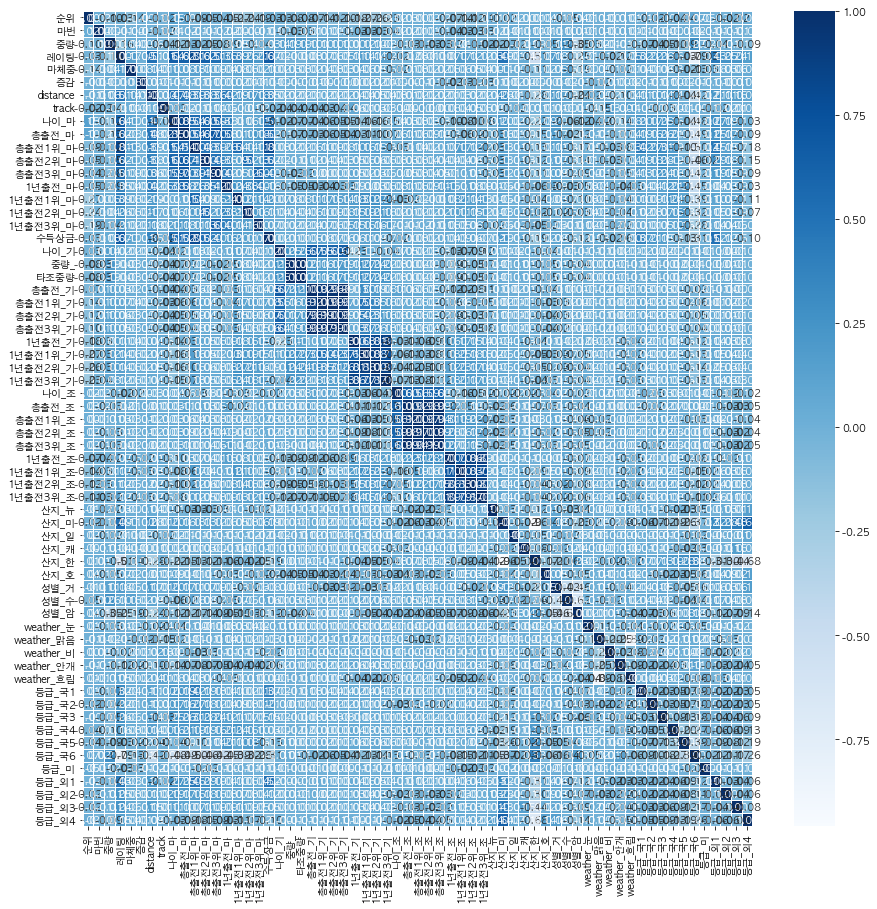

In [129]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = dataset.corr(), annot=True, 
fmt = '.2f', linewidths=0.5, cmap='Blues')